# Exploratory Data Analysis of the Dataset | Part 02

## Master's Dissertation

### Diogo Miguel Alvito | 89576

## Importing Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from matplotlib import image
import matplotlib.image as mpimg
import seaborn as sns
sns.set()

## Import Subrelevant Libraries

In [2]:
import os
import os.path
import json
from pathlib import Path
import string
import nltk
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download("omw-1.4")
from IPython.display import display_html
from scipy import stats
# Gensim
from wordcloud import WordCloud
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
#from gensim.models.wrappers import LdaMallet
from gensim.models.coherencemodel import CoherenceModel
from gensim import similarities

# spacy for lemmatization

import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
from pprint import pprint
import matplotlib.colors as mcolors

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\decomposition\_lda.py:28:

# ___________________________________________________________________________________________________________________

## Trying to correlate points to zones

### Importing Datasets

In [3]:
anomaly_ellipses = pd.read_csv(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_10002428\REFLACX\P300R081391\anomaly_location_ellipses.csv')
fixations = pd.read_csv(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_10002428\REFLACX\P300R081391\fixations.csv')
timestamp_transcriptions = pd.read_csv(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_10002428\REFLACX\P300R081391\timestamps_transcription.csv')

In [4]:
cxr_image = mpimg.imread(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_10002428\CXR-JPG\s59258773\fa771fa1-d9571d07-bff8f655-327734a7-6e10b29d.jpg')

### Importing Image

In [5]:
from PIL import Image

im = Image.open(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_10002428\CXR-JPG\s59258773\fa771fa1-d9571d07-bff8f655-327734a7-6e10b29d.jpg')
width, height = im.size
print(width)
print(height)

2544
3056


In [6]:
data = image.imread(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_10002428\CXR-JPG\s59258773\fa771fa1-d9571d07-bff8f655-327734a7-6e10b29d.jpg')

In [7]:
x_coordinates = fixations['x_position'].tolist()
y_coordinates = fixations['y_position'].tolist()

In [8]:
x1 = anomaly_ellipses['xmin'].tolist()
x2 = anomaly_ellipses['xmax'].tolist()
y1 = anomaly_ellipses['ymin'].tolist()
y2 = anomaly_ellipses['ymax'].tolist()
len(x1)

4

### Plotting CXR

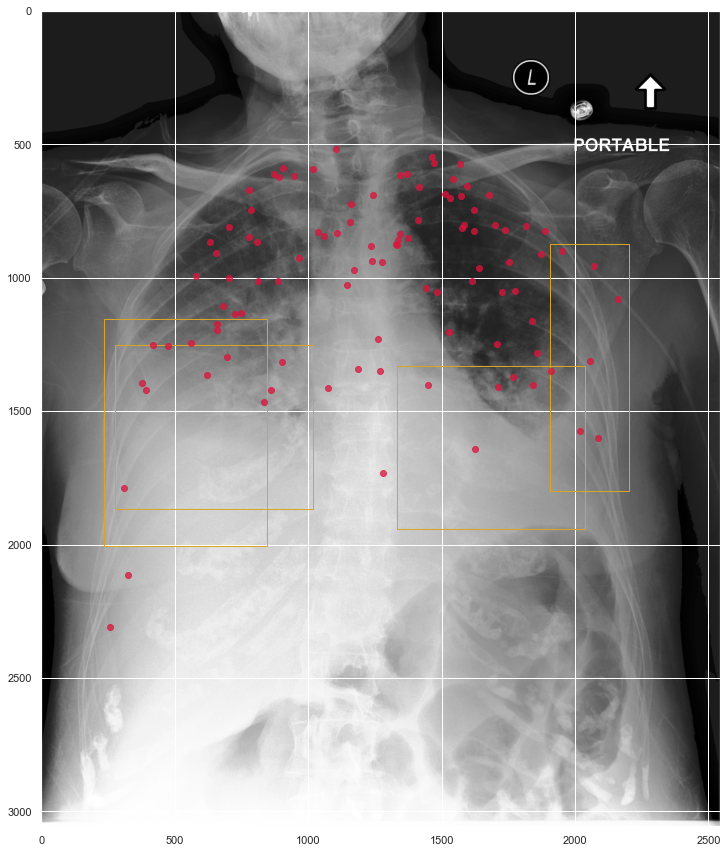

<Figure size 432x288 with 0 Axes>

In [9]:
plt.figure(figsize=(15,15))
cols = ['red', 'blue', 'green', 'purple', 'black', 'white', 'orange', 'yellow', 'brown', 'aqua', 'beige', 'crimson', 'cyan', 'fuchsia', 'goldenrod', 'indigo', 'pink']
cols = ['goldenrod', 'goldenrod', 'goldenrod', 'goldenrod']
for i in range(len(x1)):
    plt.plot([x1[i], x2[i]], [y1[i], y1[i]], color=cols[i], linewidth=1)
    plt.plot([x2[i], x2[i]], [y1[i], y2[i]], color=cols[i], linewidth=1)
    plt.plot([x2[i], x1[i]], [y2[i], y2[i]], color=cols[i], linewidth=1)
    plt.plot([x1[i], x1[i]], [y2[i], y1[i]], color=cols[i], linewidth=1)
    #plt.text(x1[i], y1[i], 'Ellipses', color='white', fontsize=15)
for i in range(len(x_coordinates)):
    plt.plot(x_coordinates[i], y_coordinates[i], marker='o', color='crimson', alpha=0.75)
    #plt.text(x[i]-30, y[i]-30, i, color='white', fontsize=14)
plt.imshow(data, cmap='gray')
plt.show()
plt.savefig('bounding_boxes.png')

## Assigning Bounding Boxes into each fixation point

### Assignment

In [10]:
fixations_df = pd.read_csv(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\speadsheets\EyeGaze\fixations.csv')
bb_df = pd.read_csv(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\speadsheets\EyeGaze\bounding_boxes.csv')

In [11]:
fixations_bb_df = pd.read_csv(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\speadsheets\EyeGaze\fixations.csv')

In [12]:
def sorter(column):
    reorder = ['left lung', 'right lung', 'left upper lung zone', 'right upper lung zone', 'left mid lung zone', 'right mid lung zone', 'left lower lung zone', 'right lower lung zone', 'trachea', 'upper mediastinum', 'right hilar structures', 'left hilar structures', 'right costophrenic angle', 'left costophrenic angle', 'right clavicle', 'left clavicle', 'cardiac silhouette']
    cat = pd.Categorical(column, categories=reorder, ordered=True)
    return pd.Series(cat)

fixations_bb_df['Bounding Box'] = 'Area out of Bounding Boxes'
fixations_bb_df['Fixation Point Number'] = 0

for i in range(len(fixations_bb_df)):
    query_value = fixations_bb_df['DICOM_ID'][i]
    aux_df = bb_df.loc[bb_df['dicom_id'] == query_value]
    aux_df = aux_df.sort_values(by='bbox_name', key=sorter)
    aux_df2 = fixations_bb_df.loc[fixations_bb_df['DICOM_ID'] == query_value]
    aux_df2.reset_index(inplace=True, drop=True)
    for k in range(len(aux_df2)):
        if fixations_bb_df['Time (in secs)'][i] == aux_df2['Time (in secs)'][k]:
            fixations_bb_df['Fixation Point Number'][i] = int(k+1)
    if len(aux_df) > 0:
        for j in range(len(aux_df)):
            if fixations_bb_df.iloc[i,36] >= aux_df.iloc[j, 3]:
                if fixations_bb_df.iloc[i,36] <= aux_df.iloc[j, 4]:
                    if fixations_bb_df.iloc[i,37] >= aux_df.iloc[j, 5]:
                        if fixations_bb_df.iloc[i,37] <= aux_df.iloc[j, 6]:
                            fixations_bb_df['Bounding Box'][i] = aux_df.iloc[j, 2]
    print('Progress -------> ', i+1, '/', len(fixations_bb_df))

writer = pd.ExcelWriter(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Fixations_bb_df.xlsx', engine='xlsxwriter')
fixations_bb_df.to_excel(writer, sheet_name='Fixation Points with bb')
writer.save()

In [13]:
output_fixations_bb_df = pd.read_excel(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Fixations_bb_df.xlsx')

In [14]:
output_fixations_bb_df.head(1)

,Unnamed: 0.1,Unnamed: 0,SESSION_ID,MEDIA_ID,DICOM_ID,CNT,Time (in secs),TIMETICK(f=10000000),FPOGX,FPOGY,FPOGS,FPOGD,FPOGID,FPOGV,BPOGX,BPOGY,BPOGV,LPCX,LPCY,LPD,LPS,LPV,RPCX,RPCY,RPD,RPS,RPV,BKID,BKDUR,BKPMIN,LPMM,LPMMV,RPMM,RPMMV,SACCADE_MAG,SACCADE_DIR,VID_FRAME,X_ORIGINAL,Y_ORIGINAL,Bounding Box,Fixation Point Number
0,0,0,1,0,1a3f39ce-ebe90275-9a66145a-af03360e-ee3b163b,45,0.72363,696216388878,0.45224,0.33879,0.01794,0.70569,2,1,0.46134,0.26619,1,0.37859,0.5943,18.33718,1.05276,1,0.6379,0.59798,18.19434,1.06068,1,0,0.0,20,3.50648,1,3.56681,1,0.0,0.0,0.0,998,1035,upper mediastinum,1


In [15]:
len(output_fixations_bb_df)

48959

### Counting all Fixation Points Bounding Boxes

In [16]:
output_fixations_bb_df['Count'] = 1
Bounding_Boxes_Count = pd.DataFrame(output_fixations_bb_df.groupby('Bounding Box')['Count'].count())
Bounding_Boxes_Count

,Count
Bounding Box,
Area out of Bounding Boxes,3361
cardiac silhouette,8222
left clavicle,2769
left costophrenic angle,330
left hilar structures,2845
left lower lung zone,2795
left lung,354
left mid lung zone,2277
left upper lung zone,2106


#### First 5 fixation points most common locations

In [17]:
aux_fp1_df = output_fixations_bb_df.loc[output_fixations_bb_df['Fixation Point Number'] == 1]
aux_fp1_df_count = pd.DataFrame(aux_fp1_df.groupby('Bounding Box')['Count'].count())
aux_fp1_df_count = aux_fp1_df_count.sort_values(by='Count', ascending=False)

aux_fp2_df = output_fixations_bb_df.loc[output_fixations_bb_df['Fixation Point Number'] == 2]
aux_fp2_df_count = pd.DataFrame(aux_fp2_df.groupby('Bounding Box')['Count'].count())
aux_fp2_df_count = aux_fp2_df_count.sort_values(by='Count', ascending=False)

aux_fp3_df = output_fixations_bb_df.loc[output_fixations_bb_df['Fixation Point Number'] == 3]
aux_fp3_df_count = pd.DataFrame(aux_fp3_df.groupby('Bounding Box')['Count'].count())
aux_fp3_df_count = aux_fp3_df_count.sort_values(by='Count', ascending=False)

aux_fp4_df = output_fixations_bb_df.loc[output_fixations_bb_df['Fixation Point Number'] == 4]
aux_fp4_df_count = pd.DataFrame(aux_fp4_df.groupby('Bounding Box')['Count'].count())
aux_fp4_df_count = aux_fp4_df_count.sort_values(by='Count', ascending=False)

aux_fp5_df = output_fixations_bb_df.loc[output_fixations_bb_df['Fixation Point Number'] == 5]
aux_fp5_df_count = pd.DataFrame(aux_fp5_df.groupby('Bounding Box')['Count'].count())
aux_fp5_df_count = aux_fp5_df_count.sort_values(by='Count', ascending=False)

df1_styler = aux_fp1_df_count.head(5).style.set_table_attributes("style='display:inline'").set_caption('Fixation Point #01')
df2_styler = aux_fp2_df_count.head(5).style.set_table_attributes("style='display:inline'").set_caption('Fixation Point #02')
df3_styler = aux_fp3_df_count.head(5).style.set_table_attributes("style='display:inline'").set_caption('Fixation Point #03')
df4_styler = aux_fp4_df_count.head(5).style.set_table_attributes("style='display:inline'").set_caption('Fixation Point #04')
df5_styler = aux_fp5_df_count.head(5).style.set_table_attributes("style='display:inline'").set_caption('Fixation Point #05')


display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_()+df4_styler._repr_html_()+df5_styler._repr_html_(), raw=True)

,Count
Bounding Box,
Area out of Bounding Boxes,242
upper mediastinum,179
cardiac silhouette,157
right clavicle,96
left clavicle,90
,Count
Bounding Box,
upper mediastinum,338
cardiac silhouette,192


#### Filtering this maps by outputs

In [18]:
outputs_df = pd.read_csv(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\speadsheets\EyeGaze\master_sheet_with_updated_stayId.csv')

In [19]:
normal_df = outputs_df.loc[outputs_df['Normal'] == 1]
chf_df = outputs_df.loc[outputs_df['CHF'] == 1]
pneumonia_df = outputs_df.loc[outputs_df['pneumonia'] == 1]

In [20]:
print('Output                      ||  Number of cases')
print('===============================================')
print('Normal                      ||      ', len(normal_df))
print('Congestive Heart Failure    ||      ', len(chf_df))
print('Pneumonia                   ||      ', len(pneumonia_df))

Output                      ||  Number of cases
Normal                      ||       360
Congestive Heart Failure    ||       363
Pneumonia                   ||       360


##### Getting Dicoms Id's for each output

In [21]:
normal_dicom_ids = normal_df['dicom_id'].tolist()
chf_dicom_ids = chf_df['dicom_id'].tolist()
pneumonia_dicom_ids = pneumonia_df['dicom_id'].tolist()

##### Bounding Boxes in Normal Pathology

In [22]:
for i in range(len(normal_dicom_ids)):
    if i == 0:
        fp_normal = output_fixations_bb_df.loc[output_fixations_bb_df['DICOM_ID'] == normal_dicom_ids[0]]
    else:
        aux_df = output_fixations_bb_df.loc[output_fixations_bb_df['DICOM_ID'] == normal_dicom_ids[i]]
        fp_normal = pd.concat([fp_normal, aux_df], axis=0)

In [23]:
aux_fp1_df = fp_normal.loc[fp_normal['Fixation Point Number'] == 1]
aux_fp1_df_count = pd.DataFrame(aux_fp1_df.groupby('Bounding Box')['Count'].count())
aux_fp1_df_count = aux_fp1_df_count.sort_values(by='Count', ascending=False)

aux_fp2_df = fp_normal.loc[fp_normal['Fixation Point Number'] == 2]
aux_fp2_df_count = pd.DataFrame(aux_fp2_df.groupby('Bounding Box')['Count'].count())
aux_fp2_df_count = aux_fp2_df_count.sort_values(by='Count', ascending=False)

aux_fp3_df = fp_normal.loc[fp_normal['Fixation Point Number'] == 3]
aux_fp3_df_count = pd.DataFrame(aux_fp3_df.groupby('Bounding Box')['Count'].count())
aux_fp3_df_count = aux_fp3_df_count.sort_values(by='Count', ascending=False)

aux_fp4_df = fp_normal.loc[fp_normal['Fixation Point Number'] == 4]
aux_fp4_df_count = pd.DataFrame(aux_fp4_df.groupby('Bounding Box')['Count'].count())
aux_fp4_df_count = aux_fp4_df_count.sort_values(by='Count', ascending=False)

aux_fp5_df = fp_normal.loc[fp_normal['Fixation Point Number'] == 5]
aux_fp5_df_count = pd.DataFrame(aux_fp5_df.groupby('Bounding Box')['Count'].count())
aux_fp5_df_count = aux_fp5_df_count.sort_values(by='Count', ascending=False)

df1_styler = aux_fp1_df_count.head(5).style.set_table_attributes("style='display:inline'").set_caption('Fixation Point #01')
df2_styler = aux_fp2_df_count.head(5).style.set_table_attributes("style='display:inline'").set_caption('Fixation Point #02')
df3_styler = aux_fp3_df_count.head(5).style.set_table_attributes("style='display:inline'").set_caption('Fixation Point #03')
df4_styler = aux_fp4_df_count.head(5).style.set_table_attributes("style='display:inline'").set_caption('Fixation Point #04')
df5_styler = aux_fp5_df_count.head(5).style.set_table_attributes("style='display:inline'").set_caption('Fixation Point #05')


display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_()+df4_styler._repr_html_()+df5_styler._repr_html_(), raw=True)

,Count
Bounding Box,
Area out of Bounding Boxes,58
upper mediastinum,57
cardiac silhouette,44
right clavicle,36
left clavicle,35
,Count
Bounding Box,
upper mediastinum,124
right hilar structures,70


##### Bounding Boxes in Congestive Heart Failure Pathology

In [24]:
for i in range(len(chf_dicom_ids)):
    if i == 0:
        fp_chf = output_fixations_bb_df.loc[output_fixations_bb_df['DICOM_ID'] == chf_dicom_ids[0]]
    else:
        aux_df = output_fixations_bb_df.loc[output_fixations_bb_df['DICOM_ID'] == chf_dicom_ids[i]]
        fp_chf = pd.concat([fp_chf, aux_df], axis=0)

In [25]:
aux_fp1_df = fp_chf.loc[fp_chf['Fixation Point Number'] == 1]
aux_fp1_df_count = pd.DataFrame(aux_fp1_df.groupby('Bounding Box')['Count'].count())
aux_fp1_df_count = aux_fp1_df_count.sort_values(by='Count', ascending=False)

aux_fp2_df = fp_chf.loc[fp_chf['Fixation Point Number'] == 2]
aux_fp2_df_count = pd.DataFrame(aux_fp2_df.groupby('Bounding Box')['Count'].count())
aux_fp2_df_count = aux_fp2_df_count.sort_values(by='Count', ascending=False)

aux_fp3_df = fp_chf.loc[fp_chf['Fixation Point Number'] == 3]
aux_fp3_df_count = pd.DataFrame(aux_fp3_df.groupby('Bounding Box')['Count'].count())
aux_fp3_df_count = aux_fp3_df_count.sort_values(by='Count', ascending=False)

aux_fp4_df = fp_chf.loc[fp_chf['Fixation Point Number'] == 4]
aux_fp4_df_count = pd.DataFrame(aux_fp4_df.groupby('Bounding Box')['Count'].count())
aux_fp4_df_count = aux_fp4_df_count.sort_values(by='Count', ascending=False)

aux_fp5_df = fp_chf.loc[fp_chf['Fixation Point Number'] == 5]
aux_fp5_df_count = pd.DataFrame(aux_fp5_df.groupby('Bounding Box')['Count'].count())
aux_fp5_df_count = aux_fp5_df_count.sort_values(by='Count', ascending=False)

df1_styler = aux_fp1_df_count.head(5).style.set_table_attributes("style='display:inline'").set_caption('Fixation Point #01')
df2_styler = aux_fp2_df_count.head(5).style.set_table_attributes("style='display:inline'").set_caption('Fixation Point #02')
df3_styler = aux_fp3_df_count.head(5).style.set_table_attributes("style='display:inline'").set_caption('Fixation Point #03')
df4_styler = aux_fp4_df_count.head(5).style.set_table_attributes("style='display:inline'").set_caption('Fixation Point #04')
df5_styler = aux_fp5_df_count.head(5).style.set_table_attributes("style='display:inline'").set_caption('Fixation Point #05')


display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_()+df4_styler._repr_html_()+df5_styler._repr_html_(), raw=True)

,Count
Bounding Box,
cardiac silhouette,66
Area out of Bounding Boxes,65
upper mediastinum,62
right clavicle,33
left clavicle,26
,Count
Bounding Box,
upper mediastinum,113
cardiac silhouette,73


##### Bounding Boxes in Pneumonia Pathology

In [26]:
for i in range(len(pneumonia_dicom_ids)):
    if i == 0:
        fp_pneumonia = output_fixations_bb_df.loc[output_fixations_bb_df['DICOM_ID'] == pneumonia_dicom_ids[0]]
    else:
        aux_df = output_fixations_bb_df.loc[output_fixations_bb_df['DICOM_ID'] == pneumonia_dicom_ids[i]]
        fp_pneumonia = pd.concat([fp_pneumonia, aux_df], axis=0)

In [27]:
aux_fp1_df = fp_pneumonia.loc[fp_pneumonia['Fixation Point Number'] == 1]
aux_fp1_df_count = pd.DataFrame(aux_fp1_df.groupby('Bounding Box')['Count'].count())
aux_fp1_df_count = aux_fp1_df_count.sort_values(by='Count', ascending=False)

aux_fp2_df = fp_pneumonia.loc[fp_pneumonia['Fixation Point Number'] == 2]
aux_fp2_df_count = pd.DataFrame(aux_fp2_df.groupby('Bounding Box')['Count'].count())
aux_fp2_df_count = aux_fp2_df_count.sort_values(by='Count', ascending=False)

aux_fp3_df = fp_pneumonia.loc[fp_pneumonia['Fixation Point Number'] == 3]
aux_fp3_df_count = pd.DataFrame(aux_fp3_df.groupby('Bounding Box')['Count'].count())
aux_fp3_df_count = aux_fp3_df_count.sort_values(by='Count', ascending=False)

aux_fp4_df = fp_pneumonia.loc[fp_pneumonia['Fixation Point Number'] == 4]
aux_fp4_df_count = pd.DataFrame(aux_fp4_df.groupby('Bounding Box')['Count'].count())
aux_fp4_df_count = aux_fp4_df_count.sort_values(by='Count', ascending=False)

aux_fp5_df = fp_pneumonia.loc[fp_pneumonia['Fixation Point Number'] == 5]
aux_fp5_df_count = pd.DataFrame(aux_fp5_df.groupby('Bounding Box')['Count'].count())
aux_fp5_df_count = aux_fp5_df_count.sort_values(by='Count', ascending=False)

df1_styler = aux_fp1_df_count.head(5).style.set_table_attributes("style='display:inline'").set_caption('Fixation Point #01')
df2_styler = aux_fp2_df_count.head(5).style.set_table_attributes("style='display:inline'").set_caption('Fixation Point #02')
df3_styler = aux_fp3_df_count.head(5).style.set_table_attributes("style='display:inline'").set_caption('Fixation Point #03')
df4_styler = aux_fp4_df_count.head(5).style.set_table_attributes("style='display:inline'").set_caption('Fixation Point #04')
df5_styler = aux_fp5_df_count.head(5).style.set_table_attributes("style='display:inline'").set_caption('Fixation Point #05')


display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_()+df4_styler._repr_html_()+df5_styler._repr_html_(), raw=True)

,Count
Bounding Box,
Area out of Bounding Boxes,60
upper mediastinum,60
cardiac silhouette,47
left clavicle,29
right clavicle,27
,Count
Bounding Box,
upper mediastinum,101
cardiac silhouette,69


## Lung Zones Ranking by Pathology

In [28]:
Lung_Zones_Normal = pd.DataFrame(fp_normal.groupby('Bounding Box')['Count'].count().sort_values(ascending=False))
Lung_Zones_CHF = pd.DataFrame(fp_chf.groupby('Bounding Box')['Count'].count().sort_values(ascending=False))
Lung_Zones_Pneumonia = pd.DataFrame(fp_pneumonia.groupby('Bounding Box')['Count'].count().sort_values(ascending=False))

df1_styler = Lung_Zones_Normal.style.set_table_attributes("style='display:inline'").set_caption('Normal')
df2_styler = Lung_Zones_CHF.style.set_table_attributes("style='display:inline'").set_caption('Congestive Heart Failure')
df3_styler = Lung_Zones_Pneumonia.style.set_table_attributes("style='display:inline'").set_caption('Pneumonia')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_(), raw=True)

,Count
Bounding Box,
upper mediastinum,1916
cardiac silhouette,1808
Area out of Bounding Boxes,857
right lower lung zone,851
right clavicle,839
left clavicle,834
right hilar structures,833
left lower lung zone,742
left hilar structures,656


## Words by Pathology

### Importing Transcripts

#### Stop Words

In [29]:
stop_words = stopwords.words('english')
stop_words.extend(['.', ',', 'the', 'of', 'a', 'is', 'on', 'are', 'in', 'at', 'or', 'with', 'could', 'there', 'a', 'be'])

#### Normal Transcripts

In [30]:
normal_patients_id = normal_df['patient_id'].tolist()

words_normal = pd.DataFrame()
transcripts_normal = []

for i in range(len(normal_dicom_ids)):
    path = 'F:\DIOGO ALVITO\IST\MECD - Mestrado\\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_'+str(normal_patients_id[i])+'\EyeGaze\\audio_segmentation_transcripts\\'+str(normal_dicom_ids[i])
    os.chdir(path)
    print(path)
    for file in os.listdir():
        if file.endswith("transcript.json"):
            file_path = f"{path}\{file}"
            if os.path.exists(file_path) == True: 
                f = open(file_path)
                data = json.load(f)
                aux_df = pd.DataFrame(data['time_stamped_text'])
                aux_df['patient_id'] = normal_patients_id[i]
                aux_df['dicom_id'] = normal_dicom_ids[i]
                words_normal = pd.concat([words_normal, aux_df], axis=0)
                transcripts_normal.append(data['full_text'][1:])
words_normal.reset_index(inplace=True, drop=True)

F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_10457182\EyeGaze\audio_segmentation_transcripts\16948ae4-b8be1fa1-6b1fa93f-30dcaa87-cb904cd1
F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_13967837\EyeGaze\audio_segmentation_transcripts\b772f053-63468411-84270890-1c3c09b7-ea75dee6
F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_10737228\EyeGaze\audio_segmentation_transcripts\7a55cc24-af056803-8afcb8bc-a571dd98-09be561f
F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_11508844\EyeGaze\audio_segmentation_transcripts\3ab16010-f165cfe3-49ef82c4-454a7a92-8010b03c
F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_12497543\EyeGaze\audio_segmentation_transcripts\27840b57-a464ffbc-d6e7d071-9b5643e7-44a9afe0
F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MI

In [31]:
# initializing punctuations string
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
 
# Removing punctuations in string
# Using loop + punctuation string
for i in range(len(transcripts_normal)):
    for ele in transcripts_normal[i]:
        if ele in punc:
            transcripts_normal[i] = transcripts_normal[i].replace(ele, "")

words_dict = dict()


for line in transcripts_normal:
    line = line.strip()
    line = line.lower()

    words = line.split(" ")
  
    
    for word in words:
        if word in words_dict:
            words_dict[word] = words_dict[word] + 1
        else:
            words_dict[word] = 1

words_count_normal_df = pd.DataFrame(list(words_dict.items()))

##### Tokenization

In [32]:
transcripts_normal_tokens = []

for s in transcripts_normal:
  word_token = word_tokenize(s)
  new_sentence = []
  for word in word_token:
    if (not word in stop_words):
      new_sentence.append(word)
  transcripts_normal_tokens.append(new_sentence)

bigram = gensim.models.Phrases(transcripts_normal_tokens, min_count=2, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

bigrams = make_bigrams(transcripts_normal_tokens)

lemmatizer = WordNetLemmatizer()

lemmatized_normal_bigrams = []
for tokens in  bigrams:
  temp_lemma = []
  for token in tokens:
    temp_lemma.append( lemmatizer.lemmatize(token) )
  temp_lemma.sort()
  lemmatized_normal_bigrams.append(temp_lemma)
  
print(lemmatized_normal_bigrams[0:10])

[['appear', 'clear', 'completely', 'effusion', 'heart', 'included', 'large', 'lung', 'lung', 'mediastinum', 'normal', 'pneumothorax', 'right'], ['bone', 'heart', 'lung', 'mediastinum', 'normal', 'normal', 'normal', 'soft', 'tissue'], ['heart', 'lung', 'mediastinum', 'normal', 'normal'], ['bone', 'clear', 'heart', 'lung', 'mediastinum', 'normal', 'normal', 'soft', 'tissue'], ['atelectastis', 'bilaterally', 'heart', 'lower', 'lung', 'mediastinum', 'normal', 'opacity', 'patchy', 'probably', 'represents', 'slight'], ['heart', 'lung', 'mediastinum', 'normal', 'normal'], ['bone', 'clear', 'heart', 'lung', 'mediastinum', 'normal', 'normal', 'soft', 'tissue'], ['heart', 'lung', 'mediastinum', 'normal', 'normal'], ['clear', 'heart', 'lung', 'mediastinum', 'normal'], ['clear', 'heart', 'lung', 'mediastinum', 'normal']]


In [33]:
id2word_normal = corpora.Dictionary(lemmatized_normal_bigrams)

texts = lemmatized_normal_bigrams
corpus_normal = [id2word_normal.doc2bow(text) for text in texts]

print(corpus_normal[0:10])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1)], [(4, 1), (7, 1), (8, 1), (9, 3), (12, 1), (13, 1), (14, 1)], [(4, 1), (7, 1), (8, 1), (9, 2)], [(1, 1), (4, 1), (7, 1), (8, 1), (9, 2), (12, 1), (13, 1), (14, 1)], [(4, 1), (7, 1), (8, 1), (9, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)], [(4, 1), (7, 1), (8, 1), (9, 2)], [(1, 1), (4, 1), (7, 1), (8, 1), (9, 2), (12, 1), (13, 1), (14, 1)], [(4, 1), (7, 1), (8, 1), (9, 2)], [(1, 1), (4, 1), (7, 1), (8, 1), (9, 1)], [(1, 1), (4, 1), (7, 1), (8, 1), (9, 1)]]


##### N-Grams Analysis

In [34]:
transcripts_normal_ngrams_tokens = words_normal['phrase'].tolist()
normal_transcripts_ngrams = []

for token in transcripts_normal_ngrams_tokens:
    if (not token in stop_words):
        normal_transcripts_ngrams.append(token)

#### CHF Transcripts

In [35]:
chf_patients_id = chf_df['patient_id'].tolist()

words_chf = pd.DataFrame()
transcripts_chf = []

for i in range(len(chf_dicom_ids)):
    path = 'F:\DIOGO ALVITO\IST\MECD - Mestrado\\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_'+str(chf_patients_id[i])+'\EyeGaze\\audio_segmentation_transcripts\\'+str(chf_dicom_ids[i])
    os.chdir(path)
    print(path)
    for file in os.listdir():
        if file.endswith("transcript.json"):
            file_path = f"{path}\{file}"
            if os.path.exists(file_path) == True: 
                f = open(file_path)
                data = json.load(f)
                aux_df = pd.DataFrame(data['time_stamped_text'])
                aux_df['patient_id'] = chf_patients_id[i]
                aux_df['dicom_id'] = chf_dicom_ids[i]
                words_chf = pd.concat([words_chf, aux_df], axis=0)
                transcripts_chf.append(data['full_text'][1:])
words_chf.reset_index(inplace=True, drop=True)

F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_15628804\EyeGaze\audio_segmentation_transcripts\24c7496c-d7635dfe-b8e0b87f-d818affc-78ff7cf4
F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_19462352\EyeGaze\audio_segmentation_transcripts\78711a04-264d5305-d5feec9b-ebef1cec-fdc6db9c
F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_11255143\EyeGaze\audio_segmentation_transcripts\a770d8d6-7b6a62ff-815ab876-c81709a8-9a654a54
F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_10526322\EyeGaze\audio_segmentation_transcripts\8e457921-bc1af8aa-a65073c1-aaac8247-c5ceb780
F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_12055181\EyeGaze\audio_segmentation_transcripts\62fe5d5a-1806ee3c-f4e742fa-f2b036ea-d390057a
F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MI

In [36]:
# initializing punctuations string
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
 
# Removing punctuations in string
# Using loop + punctuation string
for i in range(len(transcripts_chf)):
    for ele in transcripts_chf[i]:
        if ele in punc:
            transcripts_chf[i] = transcripts_chf[i].replace(ele, "")

words_dict = dict()


for line in transcripts_chf:
    line = line.strip()
    line = line.lower()

    words = line.split(" ")
  
    
    for word in words:
        if word in words_dict:
            words_dict[word] = words_dict[word] + 1
        else:
            words_dict[word] = 1

words_count_chf_df = pd.DataFrame(list(words_dict.items()))

##### Tokenization

In [37]:
transcripts_chf_tokens = []

for s in transcripts_chf:
  word_token = word_tokenize(s)
  new_sentence = []
  for word in word_token:
    if (not word in stop_words):
      new_sentence.append(word)
  transcripts_chf_tokens.append(new_sentence)

bigram = gensim.models.Phrases(transcripts_chf_tokens, min_count=2, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

bigrams = make_bigrams(transcripts_chf_tokens)

lemmatizer = WordNetLemmatizer()

lemmatized_chf_bigrams = []
for tokens in  bigrams:
  temp_lemma = []
  for token in tokens:
    temp_lemma.append( lemmatizer.lemmatize(token) )
  temp_lemma.sort()
  lemmatized_chf_bigrams.append(temp_lemma)
  
print(lemmatized_chf_bigrams[0:10])

[['basilar', 'cardiomegaly', 'edema', 'effusion', 'generalized', 'haziness', 'large', 'likely', 'lung', 'mild', 'mild', 'predominance', 'represents'], ['consolidation', 'effusion', 'focal', 'heart', 'interstitial_markings', 'mediastinum', 'nonspecific', 'normal', 'pleural', 'pneumothorax', 'prominent'], ['cardiac', 'cardiac', 'coronary_sinus', 'focal', 'lead', 'leftsided', 'opacity', 'pacer', 'prosthetic', 'pulmomary', 'right', 'sternotomy', 'valve', 'ventricle', 'wire'], ['atrium', 'bone', 'cardiac', 'clear', 'coronary_sinus', 'heart', 'lead', 'left', 'lung', 'normal', 'pacer', 'projecting', 'prominent', 'right', 'sided', 'soft_tissues', 'sternotomy', 'valve_replacement', 'wire'], ['appear', 'cardiac', 'clear', 'defibrillator', 'heart', 'lead', 'leftsided', 'lung', 'prominent', 'right', 'ventricle'], ['cardiomegaly', 'clear', 'lung'], ['also', 'atelectasis', 'base', 'bilaterally', 'cardiomegaly', 'edema', 'effusion', 'haziness', 'large', 'low', 'low', 'lung', 'lung', 'perihilar', 'rel

In [38]:
id2word_chf = corpora.Dictionary(lemmatized_chf_bigrams)

texts = lemmatized_chf_bigrams
corpus_chf = [id2word_chf.doc2bow(text) for text in texts]

print(corpus_chf[0:10])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1)], [(3, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)], [(13, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1)], [(8, 1), (14, 1), (18, 1), (21, 1), (22, 1), (23, 1), (24, 1), (27, 1), (30, 1), (31, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1)], [(8, 1), (14, 1), (21, 1), (22, 1), (24, 1), (25, 1), (30, 1), (33, 1), (37, 1), (43, 1), (44, 1)], [(1, 1), (8, 1), (37, 1)], [(1, 1), (2, 1), (3, 1), (5, 1), (6, 1), (8, 2), (30, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 2), (50, 1), (51, 1), (52, 1), (53, 1), (54, 2)], [(1, 1), (3, 1), (4, 1), (5, 1), (8, 1), (20, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1)], [(1, 1), (3, 1), (5, 1), (12, 1), (13, 1), (19, 1), (20, 1), (21, 1), (50, 1), (55, 1), (59, 1), (61, 1), (62, 1), (63

##### N-Grams Analysis

In [39]:
transcripts_chf_ngrams_tokens = words_chf['phrase'].tolist()
chf_transcripts_ngrams = []

for token in transcripts_chf_ngrams_tokens:
    if (not token in stop_words):
        chf_transcripts_ngrams.append(token)

#### Pneumonia Transcripts

In [40]:
pneumonia_patients_id = pneumonia_df['patient_id'].tolist()

words_pneumonia = pd.DataFrame()
transcripts_pneumonia = []

for i in range(len(pneumonia_dicom_ids)):
    path = 'F:\DIOGO ALVITO\IST\MECD - Mestrado\\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_'+str(pneumonia_patients_id[i])+'\EyeGaze\\audio_segmentation_transcripts\\'+str(pneumonia_dicom_ids[i])
    os.chdir(path)
    print(path)
    for file in os.listdir():
        if file.endswith("transcript.json"):
            file_path = f"{path}\{file}"
            if os.path.exists(file_path) == True: 
                f = open(file_path)
                data = json.load(f)
                aux_df = pd.DataFrame(data['time_stamped_text'])
                aux_df['patient_id'] = pneumonia_patients_id[i]
                aux_df['dicom_id'] = pneumonia_dicom_ids[i]
                words_pneumonia = pd.concat([words_pneumonia, aux_df], axis=0)
                transcripts_pneumonia.append(data['full_text'][1:])
words_pneumonia.reset_index(inplace=True, drop=True)

F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_14523345\EyeGaze\audio_segmentation_transcripts\036000e0-04d69382-0f34cbc2-7b2ed2df-4254b120
F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_15392198\EyeGaze\audio_segmentation_transcripts\88add503-768d401f-dc6cf7ea-a26d9f59-42c41462
F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_10321410\EyeGaze\audio_segmentation_transcripts\d83e4ef7-52979143-dcd7fd5d-8e76b8a4-d3649610
F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_19166723\EyeGaze\audio_segmentation_transcripts\25dc631e-e6ca9eb5-acbe4eda-82070bca-4c679f56
F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_15831991\EyeGaze\audio_segmentation_transcripts\b9709691-b4ef6ad8-7aaef7da-f6290d28-a924fc3d
F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MI

In [41]:
# initializing punctuations string
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''


# Removing punctuations in string
# Using loop + punctuation string
for i in range(len(transcripts_pneumonia)):
    for ele in transcripts_pneumonia[i]:
        if ele in punc:
            transcripts_pneumonia[i] = transcripts_pneumonia[i].replace(ele, "")

words_dict = dict()


for line in transcripts_pneumonia:
    line = line.strip()
    line = line.lower()

    words = line.split(" ")
  
    
    for word in words:
        if word in words_dict:
            words_dict[word] = words_dict[word] + 1
        else:
            words_dict[word] = 1

words_count_pneumonia_df = pd.DataFrame(list(words_dict.items()))

##### Tokenization

In [42]:
transcripts_pneumonia_tokens = []

for s in transcripts_pneumonia:
  word_token = word_tokenize(s)
  new_sentence = []
  for word in word_token:
    if (not word in stop_words):
      new_sentence.append(word)
  transcripts_pneumonia_tokens.append(new_sentence)

bigram = gensim.models.Phrases(transcripts_pneumonia_tokens, min_count=2, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

bigrams = make_bigrams(transcripts_pneumonia_tokens)

lemmatizer = WordNetLemmatizer()

lemmatized_pneumonia_bigrams = []
for tokens in  bigrams:
  temp_lemma = []
  for token in tokens:
    temp_lemma.append( lemmatizer.lemmatize(token) )
  temp_lemma.sort()
  lemmatized_pneumonia_bigrams.append(temp_lemma)
  
print(lemmatized_pneumonia_bigrams[0:10])


[['clear', 'heart', 'lung', 'mediastinum', 'normal'], ['bilateral', 'clear', 'heart', 'lung', 'mediastinum', 'nipple', 'normal', 'piercings'], ['angle', 'appear', 'bone', 'cardiomediastinal_silhouette', 'clear', 'costrophrenic', 'effusion', 'entirely', 'included', 'infection', 'lateral', 'left', 'left', 'lung', 'lung', 'lung', 'mid', 'normal', 'normal', 'opacity', 'pleural', 'represent', 'right', 'right', 'soft_tissues', 'triangular', 'visualized'], ['aspiration', 'base', 'heart', 'left', 'mediastinum', 'normal', 'opacity', 'patchy', 'pneumonia', 'primary_considerations', 'there'], ['atelectasis', 'bilaterally', 'heart', 'infection', 'low', 'lower', 'lung', 'lung', 'mediastinum', 'mid', 'normal', 'patchy', 'probably', 'volume'], ['although', 'clear', 'effusion', 'heart', 'hilum', 'lordotic_positioning', 'lung', 'mediastinum', 'normal', 'pleural', 'pneumothorax', 'prominent', 'related', 'somewhat'], ['atelectasis', 'base', 'clear', 'effusion', 'heart', 'left', 'lung', 'mediastinum', 'no

In [43]:
id2word_pneumonia = corpora.Dictionary(lemmatized_pneumonia_bigrams)

texts = lemmatized_pneumonia_bigrams
corpus_pneumonia = [id2word_pneumonia.doc2bow(text) for text in texts]

print(corpus_pneumonia[0:10])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)], [(0, 1), (2, 3), (4, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1)], [(1, 1), (3, 1), (4, 1), (18, 1), (20, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1)], [(1, 1), (2, 2), (3, 1), (4, 1), (16, 1), (19, 1), (29, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1)], [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (13, 1), (21, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1)], [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (13, 1), (18, 1), (20, 1), (21, 1), (23, 1), (28, 1), (29, 1), (30, 1), (33, 1), (42, 1), (46, 1)], [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(1, 1), (2, 1), (4, 1), (18, 2), (20, 1), (23, 1), (30, 1), (32, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1),

##### N-Grams Analysis

In [44]:
transcripts_pneumonia_ngrams_tokens = words_pneumonia['phrase'].tolist()
pneumonia_transcripts_ngrams = []

for token in transcripts_pneumonia_ngrams_tokens:
    if (not token in stop_words):
        pneumonia_transcripts_ngrams.append(token)

### Words Count by Pathology

#### Filter

In [45]:
words_count_normal_df.drop(words_count_normal_df[words_count_normal_df[0] == 'and'].index, inplace = True)
words_count_normal_df.drop(words_count_normal_df[words_count_normal_df[0] == 'are'].index, inplace = True)
words_count_normal_df.drop(words_count_normal_df[words_count_normal_df[0] == 'the'].index, inplace = True)
words_count_normal_df.drop(words_count_normal_df[words_count_normal_df[0] == 'or'].index, inplace = True)
words_count_normal_df.drop(words_count_normal_df[words_count_normal_df[0] == 'at'].index, inplace = True)
words_count_normal_df.drop(words_count_normal_df[words_count_normal_df[0] == 'in'].index, inplace = True)
words_count_normal_df.drop(words_count_normal_df[words_count_normal_df[0] == 'is'].index, inplace = True)
words_count_normal_df.drop(words_count_normal_df[words_count_normal_df[0] == 'no'].index, inplace = True)
words_count_normal_df.drop(words_count_normal_df[words_count_normal_df[0] == 'not'].index, inplace = True)
words_count_normal_df.drop(words_count_normal_df[words_count_normal_df[0] == 'of'].index, inplace = True)
words_count_normal_df.drop(words_count_normal_df[words_count_normal_df[0] == 'with'].index, inplace = True)
words_count_normal_df.drop(words_count_normal_df[words_count_normal_df[0] == 'could'].index, inplace = True)
words_count_normal_df.drop(words_count_normal_df[words_count_normal_df[0] == 'there'].index, inplace = True)
words_count_normal_df.drop(words_count_normal_df[words_count_normal_df[0] == 'a'].index, inplace = True)
words_count_normal_df.drop(words_count_normal_df[words_count_normal_df[0] == 'be'].index, inplace = True)

words_count_chf_df.drop(words_count_chf_df[words_count_chf_df[0] == 'and'].index, inplace = True)
words_count_chf_df.drop(words_count_chf_df[words_count_chf_df[0] == 'are'].index, inplace = True)
words_count_chf_df.drop(words_count_chf_df[words_count_chf_df[0] == 'the'].index, inplace = True)
words_count_chf_df.drop(words_count_chf_df[words_count_chf_df[0] == 'or'].index, inplace = True)
words_count_chf_df.drop(words_count_chf_df[words_count_chf_df[0] == 'at'].index, inplace = True)
words_count_chf_df.drop(words_count_chf_df[words_count_chf_df[0] == 'in'].index, inplace = True)
words_count_chf_df.drop(words_count_chf_df[words_count_chf_df[0] == 'is'].index, inplace = True)
words_count_chf_df.drop(words_count_chf_df[words_count_chf_df[0] == 'no'].index, inplace = True)
words_count_chf_df.drop(words_count_chf_df[words_count_chf_df[0] == 'not'].index, inplace = True)
words_count_chf_df.drop(words_count_chf_df[words_count_chf_df[0] == 'of'].index, inplace = True)
words_count_chf_df.drop(words_count_chf_df[words_count_chf_df[0] == 'with'].index, inplace = True)
words_count_chf_df.drop(words_count_chf_df[words_count_chf_df[0] == 'could'].index, inplace = True)
words_count_chf_df.drop(words_count_chf_df[words_count_chf_df[0] == 'there'].index, inplace = True)
words_count_chf_df.drop(words_count_chf_df[words_count_chf_df[0] == 'a'].index, inplace = True)
words_count_chf_df.drop(words_count_chf_df[words_count_chf_df[0] == 'be'].index, inplace = True)

words_count_pneumonia_df.drop(words_count_pneumonia_df[words_count_pneumonia_df[0] == 'and'].index, inplace = True)
words_count_pneumonia_df.drop(words_count_pneumonia_df[words_count_pneumonia_df[0] == 'are'].index, inplace = True)
words_count_pneumonia_df.drop(words_count_pneumonia_df[words_count_pneumonia_df[0] == 'the'].index, inplace = True)
words_count_pneumonia_df.drop(words_count_pneumonia_df[words_count_pneumonia_df[0] == 'or'].index, inplace = True)
words_count_pneumonia_df.drop(words_count_pneumonia_df[words_count_pneumonia_df[0] == 'at'].index, inplace = True)
words_count_pneumonia_df.drop(words_count_pneumonia_df[words_count_pneumonia_df[0] == 'in'].index, inplace = True)
words_count_pneumonia_df.drop(words_count_pneumonia_df[words_count_pneumonia_df[0] == 'is'].index, inplace = True)
words_count_pneumonia_df.drop(words_count_pneumonia_df[words_count_pneumonia_df[0] == 'no'].index, inplace = True)
words_count_pneumonia_df.drop(words_count_pneumonia_df[words_count_pneumonia_df[0] == 'not'].index, inplace = True)
words_count_pneumonia_df.drop(words_count_pneumonia_df[words_count_pneumonia_df[0] == 'of'].index, inplace = True)
words_count_pneumonia_df.drop(words_count_pneumonia_df[words_count_pneumonia_df[0] == 'with'].index, inplace = True)
words_count_pneumonia_df.drop(words_count_pneumonia_df[words_count_pneumonia_df[0] == 'could'].index, inplace = True)
words_count_pneumonia_df.drop(words_count_pneumonia_df[words_count_pneumonia_df[0] == 'there'].index, inplace = True)
words_count_pneumonia_df.drop(words_count_pneumonia_df[words_count_pneumonia_df[0] == 'a'].index, inplace = True)
words_count_pneumonia_df.drop(words_count_pneumonia_df[words_count_pneumonia_df[0] == 'be'].index, inplace = True)

#### Plot

In [46]:
df1_styler = words_count_normal_df.sort_values(1, ascending=False).head(20).style.set_table_attributes("style='display:inline'").set_caption('Top 20 Normal Words')
df2_styler = words_count_chf_df.sort_values(1, ascending=False).head(20).style.set_table_attributes("style='display:inline'").set_caption('Top 20 CHF Words')
df3_styler = words_count_pneumonia_df.sort_values(1, ascending=False).head(20).style.set_table_attributes("style='display:inline'").set_caption('Top 20 Pneumonia Words')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_(), raw=True)

,0,1
14,normal,538
15,heart,342
6,lungs,320
17,mediastinum,266
8,clear,203
19,soft,84
18,bones,82
1,lung,80
20,tissues,79
0,right,76


## LDA by Pathology

### LDA Normal Pathology Bigrams

In [47]:
normal_tokens = words_normal['phrase'].tolist()

In [48]:
normal_tokens_cleaned = []

for s in normal_tokens:
  word_token = word_tokenize(s)
  for word in word_token:
    if (not word in stop_words):
      normal_tokens_cleaned.append(word)

bigrams_normal_tokens = []

for i in range(len(normal_tokens_cleaned)-1):
    aux2 = str(normal_tokens_cleaned[i]+'_'+normal_tokens_cleaned[i+1])
    bigrams_normal_tokens.append(aux2)

In [49]:
transcripts_normal_tokens_bi = []

for s in bigrams_normal_tokens:
  word_token = word_tokenize(s)
  new_sentence = []
  for word in word_token:
    if (not word in stop_words):
      new_sentence.append(word)
  transcripts_normal_tokens_bi.append(new_sentence)

bigram = gensim.models.Phrases(transcripts_normal_tokens_bi, min_count=2, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

bigrams = make_bigrams(transcripts_normal_tokens_bi)

lemmatizer = WordNetLemmatizer()

lemmatized_normal_bigrams_bi = []
for tokens in  bigrams:
  temp_lemma = []
  for token in tokens:
    temp_lemma.append( lemmatizer.lemmatize(token) )
  temp_lemma.sort()
  lemmatized_normal_bigrams_bi.append(temp_lemma)
  
print(lemmatized_normal_bigrams_bi[0:10])

[['right_lung'], ['lung_completely'], ['completely_included'], ['included_lungs'], ['lungs_appear'], ['appear_clear'], ['clear_large'], ['large_effusion'], ['effusion_pneumothorax'], ['pneumothorax_normal']]


In [50]:
id2word_normal_bi = corpora.Dictionary(lemmatized_normal_bigrams_bi)

texts = lemmatized_normal_bigrams_bi
corpus_normal_bi = [id2word_normal_bi.doc2bow(text) for text in texts]

print(corpus_normal_bi[0:10])

[[(0, 1)], [(1, 1)], [(2, 1)], [(3, 1)], [(4, 1)], [(5, 1)], [(6, 1)], [(7, 1)], [(8, 1)], [(9, 1)]]


In [51]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus_normal_bi,
                                           id2word=id2word_normal_bi,
                                           num_topics=2, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [52]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus_normal_bi]

[(0,
  '0.096*"normal_heart" + 0.063*"lungs_clear" + 0.043*"normal_lungs" + '
  '0.036*"effusion_pneumothorax" + 0.035*"pleural_effusion" + '
  '0.031*"mediastinum_lungs" + 0.022*"normal_bones" + '
  '0.020*"mediastinum_normal" + 0.018*"completely_included" + '
  '0.016*"lungs_pleural"'),
 (1,
  '0.075*"heart_mediastinum" + 0.036*"soft_tissues" + 0.032*"clear_normal" + '
  '0.031*"bones_soft" + 0.030*"lung_base" + 0.028*"pneumothorax_normal" + '
  '0.022*"aortic_calcifications" + 0.020*"spinal_degeneration" + '
  '0.020*"left_lung" + 0.020*"right_lung"')]


In [53]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus_normal_bi))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=lemmatized_normal_bigrams_bi, dictionary=id2word_normal_bi, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -5.7021973273830335

Coherence Score:  0.8396314766598991


In [54]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_lda.corpus, id2word_normal_bi, mds='mmds')
vis

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0      0.097997 -0.082902       1        1  53.98448
1     -0.097997  0.082902       2        1  46.01552, topic_info=                  Term        Freq       Total Category  logprob  loglift
10        normal_heart  172.000000  172.000000  Default  30.0000  30.0000
11   heart_mediastinum  115.000000  115.000000  Default  29.0000  29.0000
20         lungs_clear  112.000000  112.000000  Default  28.0000  28.0000
13        normal_lungs   78.000000   78.000000  Default  27.0000  27.0000
17        soft_tissues   56.000000   56.000000  Default  26.0000  26.0000
..                 ...         ...         ...      ...      ...      ...
732       tissues_mild   12.663957   28.475829   Topic2  -4.7916  -0.0341
733     mild_scoliosis   12.663921   28.475834   Topic2  -4.7916  -0.0341
79         heart_lungs    6.083442    9.778485   Topic2  -5.5248   0.3016
679      elevated_left   12.414109   31.163267   Topic2  -4.8115  -0.1442
337  slightly_elevated    8.012547   35.023021   Topic2  -5.2493  -0.6988

[106 rows x 6 columns], token_table=      Topic      Freq                   Term
term                                        
64        1  0.923175       angle_completely
64        2  0.184635       angle_completely
111       1  0.056989  aortic_calcifications
111       2  0.940321  aortic_calcifications
158       1  0.195191          appear_normal
...     ...       ...                    ...
732       2  0.456528           tissues_mild
18        1  0.053246         tissues_normal
18        2  0.958420         tissues_normal
66        1  0.971827      visualized_normal
66        2  0.107981      visualized_normal

[140 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

In [55]:
aux_df_lda_normal_bi = pd.DataFrame(vis.topic_info)
aux_df_lda_normal_bi

,Term,Freq,Total,Category,logprob,loglift
10,normal_heart,172.000000,172.000000,Default,30.0000,30.0000
11,heart_mediastinum,115.000000,115.000000,Default,29.0000,29.0000
20,lungs_clear,112.000000,112.000000,Default,28.0000,28.0000
13,normal_lungs,78.000000,78.000000,Default,27.0000,27.0000
17,soft_tissues,56.000000,56.000000,Default,26.0000,26.0000
...,...,...,...,...,...,...
732,tissues_mild,12.663957,28.475829,Topic2,-4.7916,-0.0341
733,mild_scoliosis,12.663921,28.475834,Topic2,-4.7916,-0.0341
79,heart_lungs,6.083442,9.778485,Topic2,-5.5248,0.3016
679,elevated_left,12.414109,31.163267,Topic2,-4.8115,-0.1442


### LDA CHF Pathology Bigram

In [56]:
chf_tokens = words_chf['phrase'].tolist()

In [57]:
chf_tokens_cleaned = []

for s in chf_tokens:
  word_token = word_tokenize(s)
  for word in word_token:
    if (not word in stop_words):
      chf_tokens_cleaned.append(word)

bigrams_chf_tokens = []

for i in range(len(chf_tokens_cleaned)-1):
    aux2 = str(chf_tokens_cleaned[i]+'_'+chf_tokens_cleaned[i+1])
    bigrams_chf_tokens.append(aux2)

In [58]:
transcripts_chf_tokens_bi = []

for s in bigrams_chf_tokens:
  word_token = word_tokenize(s)
  new_sentence = []
  for word in word_token:
    if (not word in stop_words):
      new_sentence.append(word)
  transcripts_chf_tokens_bi.append(new_sentence)

bigram = gensim.models.Phrases(transcripts_chf_tokens_bi, min_count=2, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

bigrams = make_bigrams(transcripts_chf_tokens_bi)

lemmatizer = WordNetLemmatizer()

lemmatized_chf_bigrams_bi = []
for tokens in  bigrams:
  temp_lemma = []
  for token in tokens:
    temp_lemma.append( lemmatizer.lemmatize(token) )
  temp_lemma.sort()
  lemmatized_chf_bigrams_bi.append(temp_lemma)
  
print(lemmatized_chf_bigrams_bi[0:10])

[['mild_cardiomegaly'], ['cardiomegaly_generalized'], ['generalized_haziness'], ['haziness_lungs'], ['lungs_basilar'], ['basilar_predominance'], ['predominance_large'], ['large_effusion'], ['effusion_likely'], ['likely_represents']]


In [59]:
id2word_chf_bi = corpora.Dictionary(lemmatized_chf_bigrams_bi)

texts = lemmatized_chf_bigrams_bi
corpus_chf_bi = [id2word_chf_bi.doc2bow(text) for text in texts]

print(corpus_chf_bi[0:10])

[[(0, 1)], [(1, 1)], [(2, 1)], [(3, 1)], [(4, 1)], [(5, 1)], [(6, 1)], [(7, 1)], [(8, 1)], [(9, 1)]]


In [60]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus_chf_bi,
                                           id2word=id2word_chf_bi,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [61]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus_chf_bi]

[(0,
  '0.034*"pulmonary_edema" + 0.028*"right_minor" + 0.028*"minor_fissure" + '
  '0.027*"fluid_right" + 0.022*"amount_fluid" + 0.018*"cardiomegaly_aortic" + '
  '0.015*"right_effusion" + 0.015*"heart_aortic" + 0.014*"patchy_opacity" + '
  '0.013*"small_right"'),
 (1,
  '0.032*"small_amount" + 0.022*"lung_base" + 0.018*"right_lung" + '
  '0.016*"prominent_pulmonary" + 0.015*"pulmonary_vessels" + '
  '0.015*"large_effusion" + 0.014*"effusion_pneumothorax" + '
  '0.011*"opacity_right" + 0.011*"lungs_small" + 0.010*"probably_represents"'),
 (2,
  '0.052*"aortic_calcifications" + 0.032*"prominent_heart" + '
  '0.030*"sternotomy_wires" + 0.016*"left_lung" + 0.013*"right_base" + '
  '0.012*"completely_included" + 0.011*"small_left" + 0.011*"lungs_small" + '
  '0.011*"cardiac_pacer" + 0.010*"wires_cardiac"')]


In [62]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus_chf_bi))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=lemmatized_chf_bigrams_bi, dictionary=id2word_chf_bi, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.181475572416224

Coherence Score:  0.8257210905699544


In [63]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_lda.corpus, id2word_chf_bi, mds='mmds')
vis

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.058948  0.133900       1        1  34.724240
1      0.062428 -0.107470       2        1  32.661405
2     -0.121376 -0.026431       3        1  32.614354, topic_info=                       Term        Freq       Total Category  logprob  loglift
158   aortic_calcifications  113.000000  113.000000  Default  30.0000  30.0000
427         pulmonary_edema   79.000000   79.000000  Default  29.0000  29.0000
51          prominent_heart   68.000000   68.000000  Default  28.0000  28.0000
36         sternotomy_wires   65.000000   65.000000  Default  27.0000  27.0000
213            small_amount   72.000000   72.000000  Default  26.0000  26.0000
...                     ...         ...         ...      ...      ...      ...
949     generalized_opacity    6.584950    7.572370   Topic3  -5.7936   0.9807
1824            lungs_small   23.597141   65.961460   Topic3  -4.5172   0.0925
1351   consistent_pulmonary   22.166802   63.483671   Topic3  -4.5797   0.0682
1350     fissure_consistent   22.166772   63.483664   Topic3  -4.5797   0.0682
193      effusion_prominent    8.326666   12.803675   Topic3  -5.5589   0.6901

[140 rows x 6 columns], token_table=      Topic      Freq                Term
term                                     
393       1  0.928458                  's
261       1  0.953119       also_possible
588       1  0.823539        amount_fluid
588       2  0.158373        amount_fluid
588       3  0.015837        amount_fluid
...     ...       ...                 ...
412       1  0.951626     thoracic_spinal
41        3  0.946274       wires_cardiac
858       2  0.916838  wires_cardiomegaly
1050      2  0.944065     wires_prominent
1050      3  0.078672     wires_prominent

[152 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [64]:
aux_df_lda_chf_bi = pd.DataFrame(vis.topic_info)
aux_df_lda_chf_bi

,Term,Freq,Total,Category,logprob,loglift
158,aortic_calcifications,113.000000,113.000000,Default,30.0000,30.0000
427,pulmonary_edema,79.000000,79.000000,Default,29.0000,29.0000
51,prominent_heart,68.000000,68.000000,Default,28.0000,28.0000
36,sternotomy_wires,65.000000,65.000000,Default,27.0000,27.0000
213,small_amount,72.000000,72.000000,Default,26.0000,26.0000
...,...,...,...,...,...,...
949,generalized_opacity,6.584950,7.572370,Topic3,-5.7936,0.9807
1824,lungs_small,23.597141,65.961460,Topic3,-4.5172,0.0925
1351,consistent_pulmonary,22.166802,63.483671,Topic3,-4.5797,0.0682
1350,fissure_consistent,22.166772,63.483664,Topic3,-4.5797,0.0682


### LDA Pneumonia Pathology Bigram

In [65]:
pneumonia_tokens = words_pneumonia['phrase'].tolist()

In [66]:
pneumonia_tokens_cleaned = []

for s in pneumonia_tokens:
  word_token = word_tokenize(s)
  for word in word_token:
    if (not word in stop_words):
      pneumonia_tokens_cleaned.append(word)

bigrams_pneumonia_tokens = []

for i in range(len(pneumonia_tokens_cleaned)-1):
    aux2 = str(pneumonia_tokens_cleaned[i]+'_'+pneumonia_tokens_cleaned[i+1])
    bigrams_pneumonia_tokens.append(aux2)

In [67]:
transcripts_pneumonia_tokens_bi = []

for s in bigrams_pneumonia_tokens:
  word_token = word_tokenize(s)
  new_sentence = []
  for word in word_token:
    if (not word in stop_words):
      new_sentence.append(word)
  transcripts_pneumonia_tokens_bi.append(new_sentence)

bigram = gensim.models.Phrases(transcripts_pneumonia_tokens_bi, min_count=2, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

bigrams = make_bigrams(transcripts_pneumonia_tokens_bi)

lemmatizer = WordNetLemmatizer()

lemmatized_pneumonia_bigrams_bi = []
for tokens in  bigrams:
  temp_lemma = []
  for token in tokens:
    temp_lemma.append( lemmatizer.lemmatize(token) )
  temp_lemma.sort()
  lemmatized_pneumonia_bigrams_bi.append(temp_lemma)
  
print(lemmatized_pneumonia_bigrams_bi[0:10])

[['normal_heart'], ['heart_mediastinum'], ['mediastinum_lungs'], ['lungs_clear'], ['clear_bilateral'], ['bilateral_nipple'], ['nipple_piercings'], ['piercings_normal'], ['normal_heart'], ['heart_mediastinum']]


In [68]:
id2word_pneumonia_bi = corpora.Dictionary(lemmatized_pneumonia_bigrams_bi)

texts = lemmatized_pneumonia_bigrams_bi
corpus_pneumonia_bi = [id2word_pneumonia_bi.doc2bow(text) for text in texts]

print(corpus_pneumonia_bi[0:10])

[[(0, 1)], [(1, 1)], [(2, 1)], [(3, 1)], [(4, 1)], [(5, 1)], [(6, 1)], [(7, 1)], [(0, 1)], [(1, 1)]]


In [69]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus_pneumonia_bi,
                                           id2word=id2word_pneumonia_bi,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [70]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus_pneumonia_bi]

[(0,
  '0.033*"aortic_calcifications" + 0.023*"heart_aortic" + 0.019*"left_lung" + '
  '0.019*"thoracic_spinal" + 0.018*"spinal_degeneration" + '
  '0.015*"heart_mediastinum" + 0.012*"lungs_clear" + '
  '0.012*"effusion_pneumothorax" + 0.010*"elevated_right" + '
  '0.008*"represent_atelectasis"'),
 (1,
  '0.032*"right_lung" + 0.023*"patchy_opacity" + 0.023*"large_effusion" + '
  '0.021*"pleural_effusion" + 0.020*"completely_included" + 0.011*"lower_lung" '
  '+ 0.009*"mid_lung" + 0.009*"costophrenic_angle" + 0.008*"lung_volumes" + '
  '0.008*"left_effusion"'),
 (2,
  '0.038*"normal_heart" + 0.036*"prominent_heart" + 0.028*"lung_base" + '
  '0.018*"opacity_right" + 0.009*"lung_clear" + 0.009*"low_lung" + 0.008*"\'s" '
  '+ 0.007*"right_lower" + 0.006*"focal_consolidation" + 0.005*"heart_size"')]


In [71]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus_pneumonia_bi))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=lemmatized_pneumonia_bigrams_bi, dictionary=id2word_pneumonia_bi, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.155252554355203

Coherence Score:  0.8289974830895247


In [72]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_lda.corpus, id2word_pneumonia_bi, mds='mmds')
vis

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.039917  0.104987       1        1  37.464788
1      0.047968 -0.085997       2        1  31.525858
2     -0.087885 -0.018990       3        1  31.009355, topic_info=                          Term       Freq      Total Category  logprob  \
0                 normal_heart  69.000000  69.000000  Default  30.0000   
317            prominent_heart  67.000000  67.000000  Default  29.0000   
516      aortic_calcifications  72.000000  72.000000  Default  28.0000   
79                  right_lung  59.000000  59.000000  Default  27.0000   
200                  lung_base  51.000000  51.000000  Default  26.0000   
...                        ...        ...        ...      ...      ...   
1243     calcifications_patchy   6.221140  14.251387   Topic3  -5.6834   
1381             greater_right   5.268569  13.693002   Topic3  -5.8496   
1380              left_greater   5.268540  13.693001   Topic3  -5.8496   
1540  calcifications_prominent   4.362522  11.539955   Topic3  -6.0383   
1164      retrocardiac_opacity   4.273395  12.204721   Topic3  -6.0589   

      loglift  
0     30.0000  
317   29.0000  
516   28.0000  
79    27.0000  
200   26.0000  
...       ...  
1243   0.3420  
1381   0.2158  
1380   0.2157  
1540   0.1981  
1164   0.1215  

[131 rows x 6 columns], token_table=      Topic      Freq                 Term
term                                      
38        3  0.955609                   's
267       1  0.287783     accentuate_heart
267       2  0.479639     accentuate_heart
267       3  0.191855     accentuate_heart
947       1  0.963202        also_possible
...     ...       ...                  ...
241       1  0.964535          small_right
416       1  0.975355  spinal_degeneration
805       1  0.947800     sternotomy_wires
415       1  0.974259      thoracic_spinal
340       1  0.956243           upper_lung

[131 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [73]:
aux_df_lda_pneumonia_bi = pd.DataFrame(vis.topic_info)
aux_df_lda_pneumonia_bi

,Term,Freq,Total,Category,logprob,loglift
0,normal_heart,69.000000,69.000000,Default,30.0000,30.0000
317,prominent_heart,67.000000,67.000000,Default,29.0000,29.0000
516,aortic_calcifications,72.000000,72.000000,Default,28.0000,28.0000
79,right_lung,59.000000,59.000000,Default,27.0000,27.0000
200,lung_base,51.000000,51.000000,Default,26.0000,26.0000
...,...,...,...,...,...,...
1243,calcifications_patchy,6.221140,14.251387,Topic3,-5.6834,0.3420
1381,greater_right,5.268569,13.693002,Topic3,-5.8496,0.2158
1380,left_greater,5.268540,13.693001,Topic3,-5.8496,0.2157
1540,calcifications_prominent,4.362522,11.539955,Topic3,-6.0383,0.1981


### Normal Pathology

In [115]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
          model =gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word_normal,
                                                num_topics=num_topics, random_state=100,
                                                update_every=1, chunksize=100,
                                                passes=10, alpha='auto',
                                                per_word_topics=True)    
          model_list.append(model)
          coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
          coherence_values.append(coherencemodel.get_coherence())
          
    return model_list, coherence_values

#### Topical Model

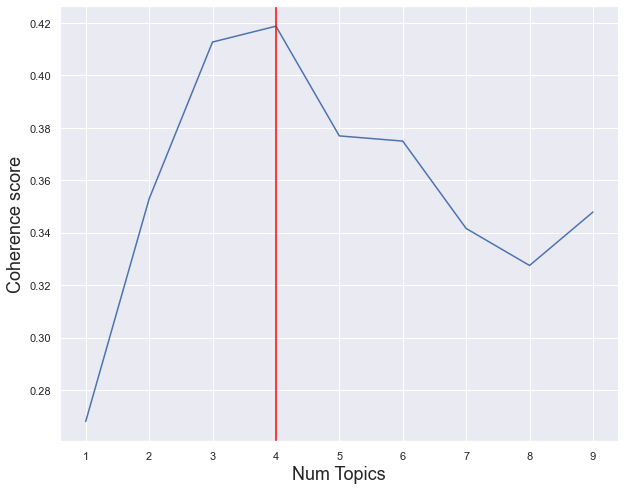

In [116]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word_normal, corpus=corpus_normal, 
                                                        texts=lemmatized_normal_bigrams, start=1, limit=10, step=1)

limit=10
start=1
step=1
x = range(start, limit, step)
plt.figure(figsize=(10,8)) 
plt.plot(x, coherence_values)
plt.axvline(x=4, color='red')
plt.xlabel("Num Topics", fontsize=18)
plt.ylabel("Coherence score", fontsize=18)
plt.show()

In [117]:
# Print the coherence scores
OPTIMAL_TOPICS = 0
max_cv = round( np.max(coherence_values), 4)

for m, cv in zip(x, coherence_values):
  if( round(cv, 4) == max_cv ):
    OPTIMAL_TOPICS = m
  print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

print("\nThe optimum number of topics is %i\n" %OPTIMAL_TOPICS)

Num Topics = 1  has Coherence Value of 0.268
Num Topics = 2  has Coherence Value of 0.3529
Num Topics = 3  has Coherence Value of 0.4127
Num Topics = 4  has Coherence Value of 0.4187
Num Topics = 5  has Coherence Value of 0.3769
Num Topics = 6  has Coherence Value of 0.3749
Num Topics = 7  has Coherence Value of 0.3416
Num Topics = 8  has Coherence Value of 0.3275
Num Topics = 9  has Coherence Value of 0.3478

The optimum number of topics is 4



#### LDA Model

In [118]:
OPTIMAL_TOPICS = 4
#Experimentar valores diferentes

In [119]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus_normal,
                                           id2word=id2word_normal,
                                           num_topics=OPTIMAL_TOPICS, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [120]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus_normal]

[(0,
  '0.133*"calcification" + 0.119*"aortic" + 0.096*"degeneration" + '
  '0.090*"spinal" + 0.085*"thoracic" + 0.068*"prominent" + 0.034*"slightly" + '
  '0.030*"mild" + 0.026*"low" + 0.026*"volume"'),
 (1,
  '0.053*"left" + 0.050*"right" + 0.033*"effusion" + 0.032*"focal" + '
  '0.028*"opacity" + 0.026*"prominent" + 0.025*"sided" + 0.025*"atelectasis" + '
  '0.023*"cardiac" + 0.022*"lead"'),
 (2,
  '0.158*"effusion" + 0.135*"pneumothorax" + 0.097*"pleural" + 0.050*"large" + '
  '0.029*"base" + 0.026*"slight" + 0.025*"lower" + 0.023*"scoliosis" + '
  '0.022*"elevated" + 0.018*"aorta"'),
 (3,
  '0.222*"normal" + 0.174*"lung" + 0.148*"heart" + 0.109*"mediastinum" + '
  '0.092*"clear" + 0.033*"soft" + 0.031*"bone" + 0.030*"tissue" + '
  '0.024*"right" + 0.019*"included"')]


In [121]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus_normal))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=lemmatized_normal_bigrams, dictionary=id2word_normal, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -3.697018126388649

Coherence Score:  0.418715514698462


##### Visualization

In [122]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_lda.corpus, id2word_normal, mds='mmds')
vis

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.345444  0.145242       1        1  68.321407
1      0.057359 -0.236062       2        1  14.202747
2     -0.230647 -0.175897       3        1   8.791048
0     -0.172156  0.266717       4        1   8.684798, topic_info=             Term        Freq       Total Category  logprob  loglift
9          normal  502.000000  502.000000  Default  30.0000  30.0000
3        effusion   61.000000   61.000000  Default  29.0000  29.0000
10   pneumothorax   50.000000   50.000000  Default  28.0000  28.0000
56  calcification   38.000000   38.000000  Default  27.0000  27.0000
54         aortic   34.000000   34.000000  Default  26.0000  26.0000
..            ...         ...         ...      ...      ...      ...
20       probably    2.215723    6.710970   Topic4  -4.8658   1.3354
4           heart    3.383388  344.566390   Topic4  -4.4425  -2.1798
7            lung    2.507382  398.787768   Topic4  -4.7422  -2.6256
1           clear    1.477992  209.977865   Topic4  -5.2707  -2.5127
73        rotated    0.928852    3.338303   Topic4  -5.7352   1.1643

[181 rows x 6 columns], token_table=      Topic      Freq               Term
term                                    
149       4  0.677581         accentuate
130       2  0.732227  acromioclavicular
172       4  0.677777                air
39        1  0.772016              angle
39        2  0.205871              angle
...     ...       ...                ...
34        4  0.723009             vessel
82        1  0.865785               view
41        1  0.993963         visualized
86        4  0.976591             volume
213       3  0.799277              would

[167 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 3, 1])

In [123]:
aux_df_lda_normal = pd.DataFrame(vis.topic_info)
aux_df_lda_normal

,Term,Freq,Total,Category,logprob,loglift
9,normal,502.000000,502.000000,Default,30.0000,30.0000
3,effusion,61.000000,61.000000,Default,29.0000,29.0000
10,pneumothorax,50.000000,50.000000,Default,28.0000,28.0000
56,calcification,38.000000,38.000000,Default,27.0000,27.0000
54,aortic,34.000000,34.000000,Default,26.0000,26.0000
...,...,...,...,...,...,...
20,probably,2.215723,6.710970,Topic4,-4.8658,1.3354
4,heart,3.383388,344.566390,Topic4,-4.4425,-2.1798
7,lung,2.507382,398.787768,Topic4,-4.7422,-2.6256
1,clear,1.477992,209.977865,Topic4,-5.2707,-2.5127


##### Cluster 4 Analysis

In [124]:
aux_df_lda_normal_c2 = aux_df_lda_normal.loc[aux_df_lda_normal['Category'] == 'Topic2']
aux_df_lda_normal_c2

,Term,Freq,Total,Category,logprob,loglift
70,focal,15.157081,15.804754,Topic2,-3.4348,1.9099
110,sided,11.801925,12.425753,Topic2,-3.6850,1.9002
87,atelectasis,11.783396,12.409704,Topic2,-3.6866,1.8999
113,cardiac,10.849256,11.471109,Topic2,-3.7692,1.8960
144,lead,10.371887,10.993794,Topic2,-3.8142,1.8935
146,ventricle,9.515471,10.137341,Topic2,-3.9004,1.8884
78,projecting,9.663743,10.303104,Topic2,-3.8849,1.8877
61,represent,8.731583,9.381134,Topic2,-3.9863,1.8800
162,atrium,8.197639,8.820011,Topic2,-4.0494,1.8786
163,pacer,7.538066,8.161550,Topic2,-4.1333,1.8723


C:\Users\User\AppData\Local\Temp\ipykernel_24832\2198442013.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


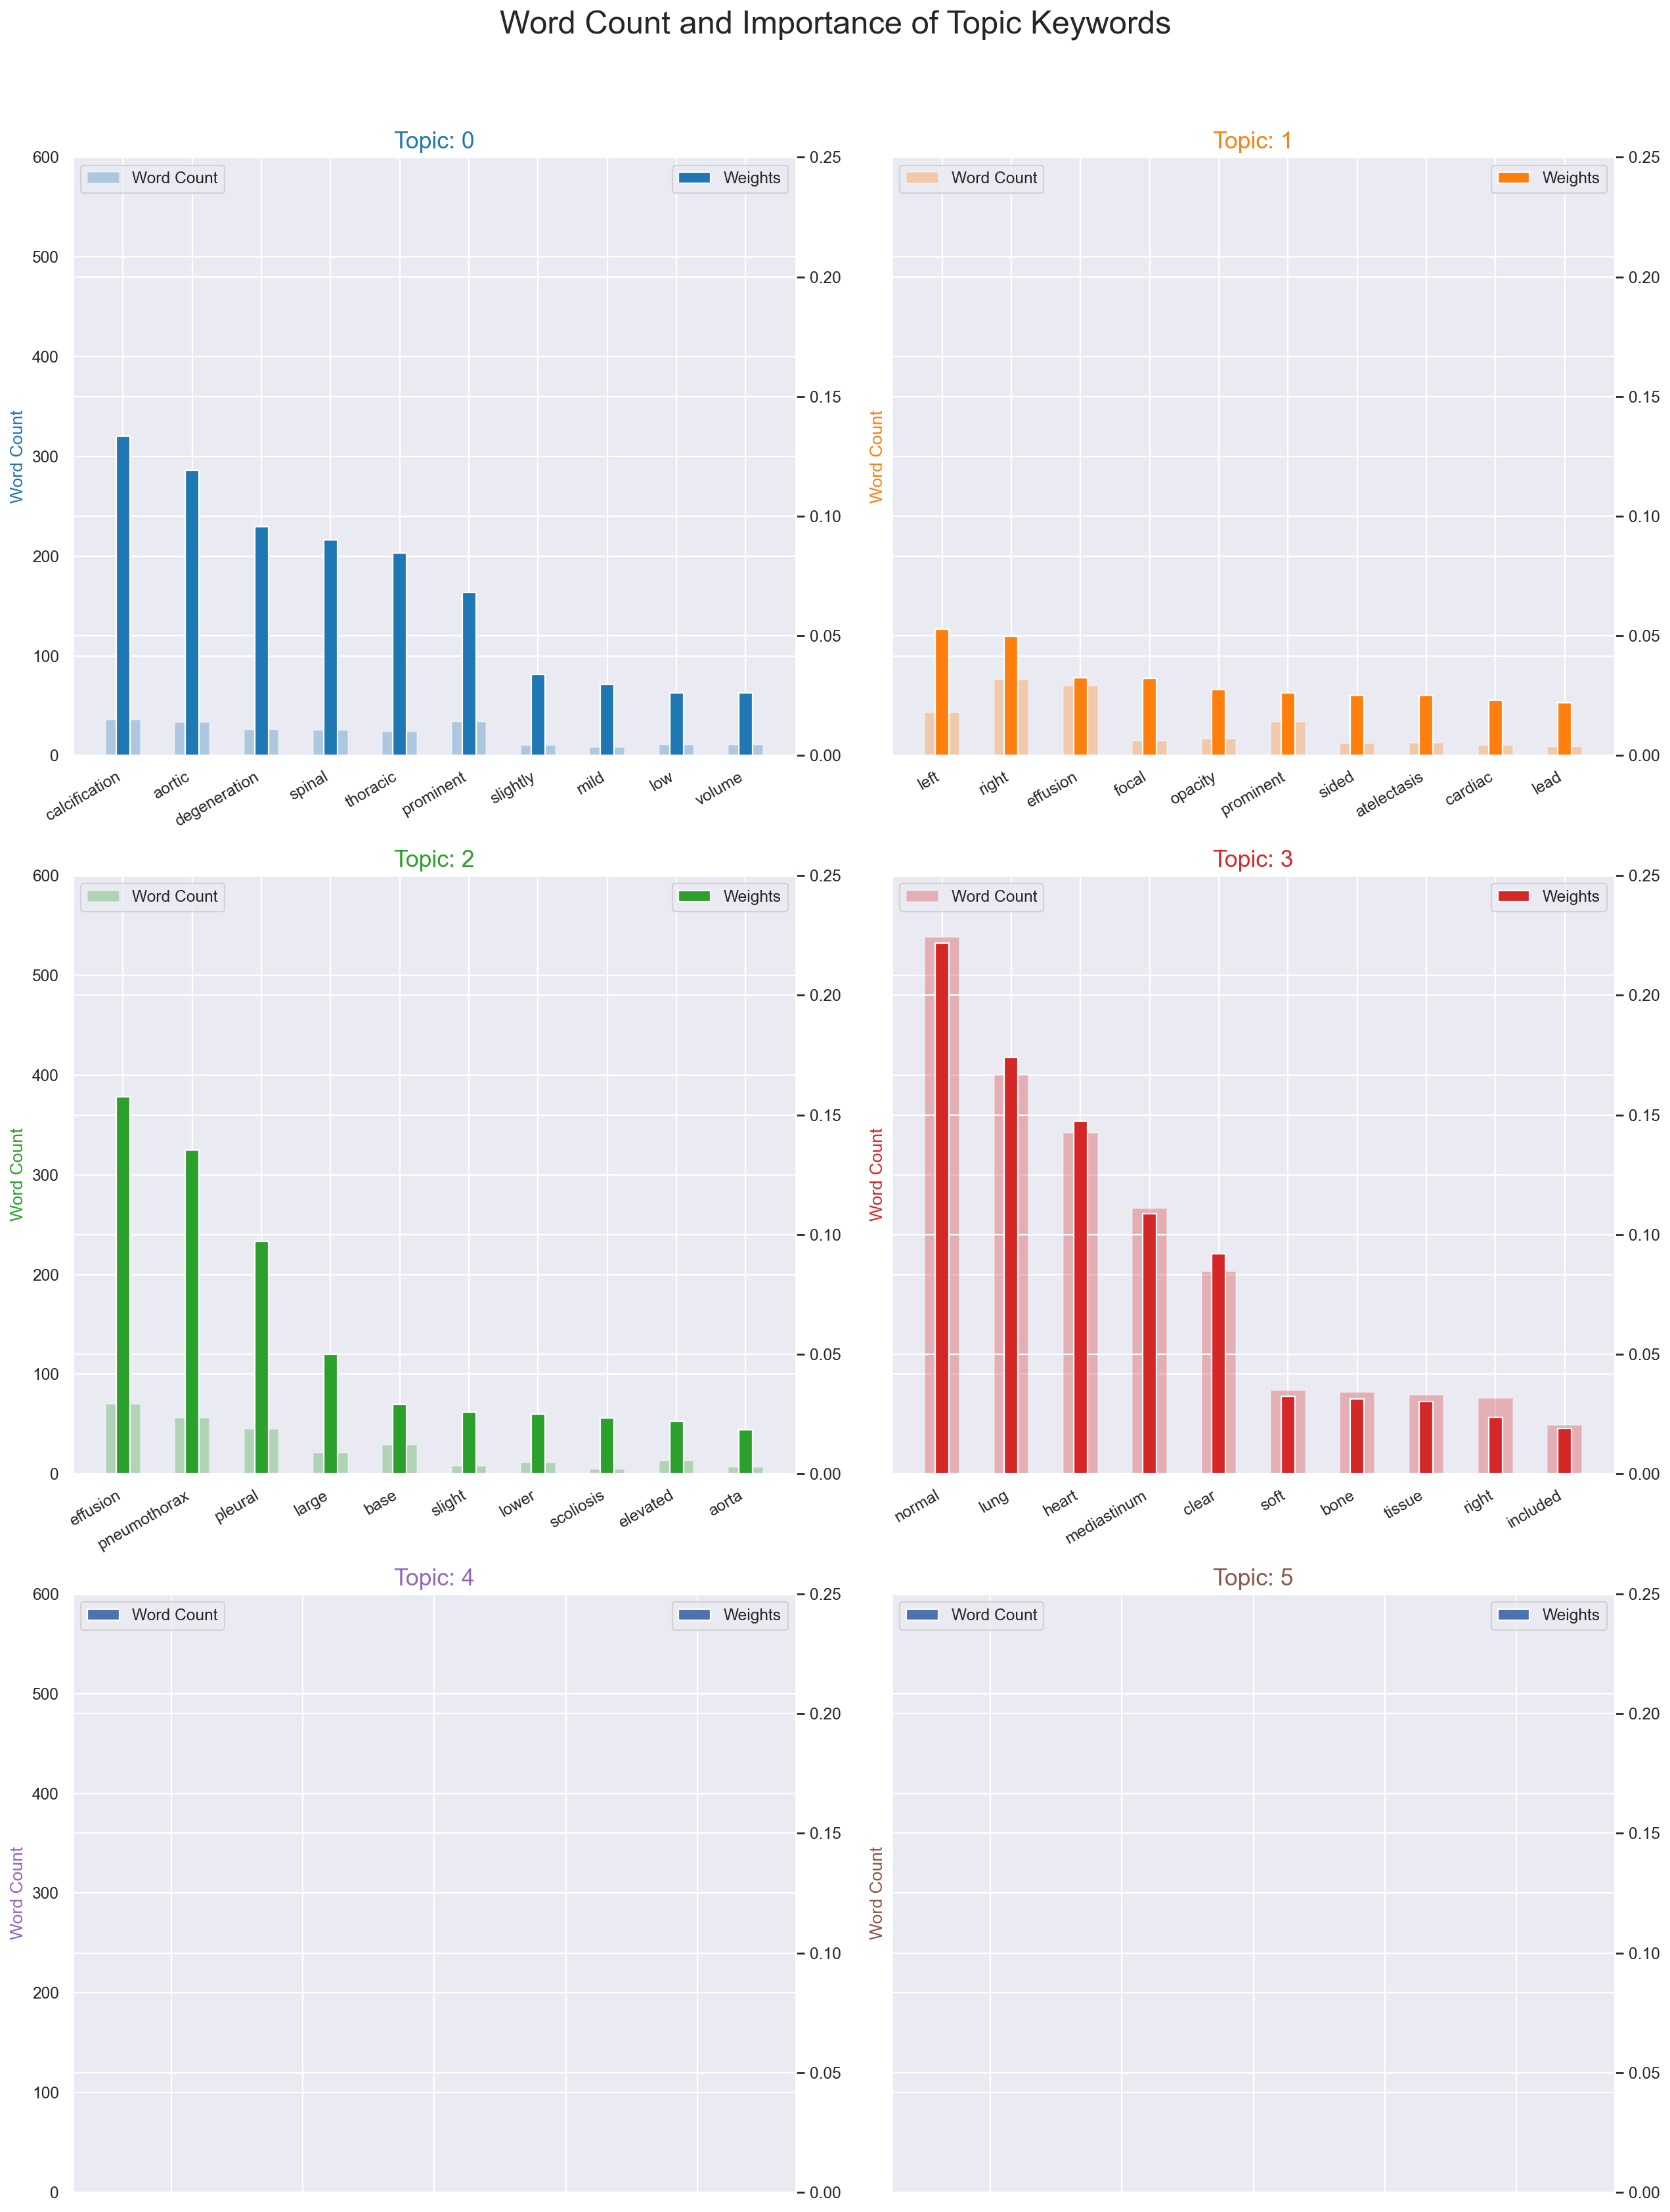

In [131]:
from collections import Counter
topics = lda_model.show_topics(formatted=False, num_topics=OPTIMAL_TOPICS)

data_flat = [w for w_list in lemmatized_normal_bigrams for w in w_list]

counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 2, figsize=(16,20), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.25); ax.set_ylim(0, 600)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)
plt.show()

### CHF

In [132]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
          model =gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word_chf,
                                                num_topics=num_topics, random_state=100,
                                                update_every=1, chunksize=100,
                                                passes=10, alpha='auto',
                                                per_word_topics=True)    
          model_list.append(model)
          coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
          coherence_values.append(coherencemodel.get_coherence())
          
    return model_list, coherence_values

#### Topical Model

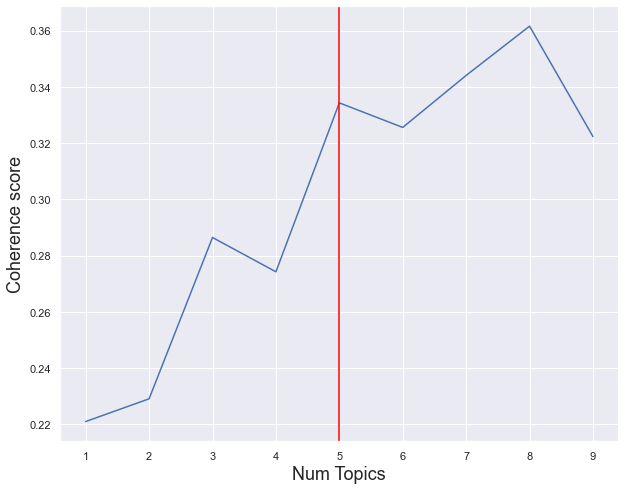

In [133]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word_chf, corpus=corpus_chf, 
                                                        texts=lemmatized_chf_bigrams, start=1, limit=10, step=1)

limit=10
start=1
step=1
x = range(start, limit, step)
plt.figure(figsize=(10,8))
plt.plot(x, coherence_values)
plt.axvline(x=5, color='red')
plt.xlabel("Num Topics", fontsize=18)
plt.ylabel("Coherence score", fontsize=18)
plt.show()

In [134]:
# Print the coherence scores
OPTIMAL_TOPICS = 0
max_cv = round( np.max(coherence_values), 4)

for m, cv in zip(x, coherence_values):
  if( round(cv, 4) == max_cv ):
    OPTIMAL_TOPICS = m
  print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

print("\nThe optimum number of topics is %i\n" %OPTIMAL_TOPICS)

Num Topics = 1  has Coherence Value of 0.2209
Num Topics = 2  has Coherence Value of 0.229
Num Topics = 3  has Coherence Value of 0.2864
Num Topics = 4  has Coherence Value of 0.2742
Num Topics = 5  has Coherence Value of 0.3343
Num Topics = 6  has Coherence Value of 0.3256
Num Topics = 7  has Coherence Value of 0.3441
Num Topics = 8  has Coherence Value of 0.3616
Num Topics = 9  has Coherence Value of 0.3223

The optimum number of topics is 8



#### LDA Model

In [135]:
OPTIMAL_TOPICS = 5
#Experimentar valores diferentes

In [136]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus_chf,
                                           id2word=id2word_chf,
                                           num_topics=OPTIMAL_TOPICS, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

##### Visualization

In [137]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_lda.corpus, id2word_chf, mds='mmds')
vis

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.201249 -0.146077       1        1  56.285256
2      0.021178  0.023616       2        1  14.095891
0     -0.124949 -0.231311       3        1  12.646155
4     -0.195423  0.177391       4        1  11.843934
3      0.097945  0.176381       5        1   5.128764, topic_info=            Term        Freq       Total Category  logprob  loglift
8           lung  151.000000  151.000000  Default  30.0000  30.0000
30         right   95.000000   95.000000  Default  29.0000  29.0000
59     pulmonary  199.000000  199.000000  Default  28.0000  28.0000
14         heart   67.000000   67.000000  Default  27.0000  27.0000
38          left   52.000000   52.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
62           may    1.497643   13.655975   Topic5  -4.7308   0.7600
2          edema    1.907819   83.536828   Topic5  -4.4887  -0.8090
43        appear    1.082354    6.696180   Topic5  -5.0556   1.1479
93     congested    1.039135    7.292014   Topic5  -5.0963   1.0219
20  pneumothorax    1.152255   45.597261   Topic5  -4.9930  -0.7078

[290 rows x 6 columns], token_table=      Topic      Freq                              Term
term                                                   
265       4  0.757046                          ac_joint
87        1  0.965666                        accentuate
133       4  0.716261  acromioclavicular_osteoarthritis
262       1  0.993431                             acute
45        2  0.751944                              also
...     ...       ...                               ...
152       2  0.143964                              well
152       5  0.719819                              well
34        1  0.048107                              wire
34        2  0.240534                              wire
34        4  0.721602                              wire

[317 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 5, 4])

In [138]:
vis.topic_info

,Term,Freq,Total,Category,logprob,loglift
8,lung,151.000000,151.000000,Default,30.0000,30.0000
30,right,95.000000,95.000000,Default,29.0000,29.0000
59,pulmonary,199.000000,199.000000,Default,28.0000,28.0000
14,heart,67.000000,67.000000,Default,27.0000,27.0000
38,left,52.000000,52.000000,Default,26.0000,26.0000
...,...,...,...,...,...,...
62,may,1.497643,13.655975,Topic5,-4.7308,0.7600
2,edema,1.907819,83.536828,Topic5,-4.4887,-0.8090
43,appear,1.082354,6.696180,Topic5,-5.0556,1.1479
93,congested,1.039135,7.292014,Topic5,-5.0963,1.0219


C:\Users\User\AppData\Local\Temp\ipykernel_24832\2065363533.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


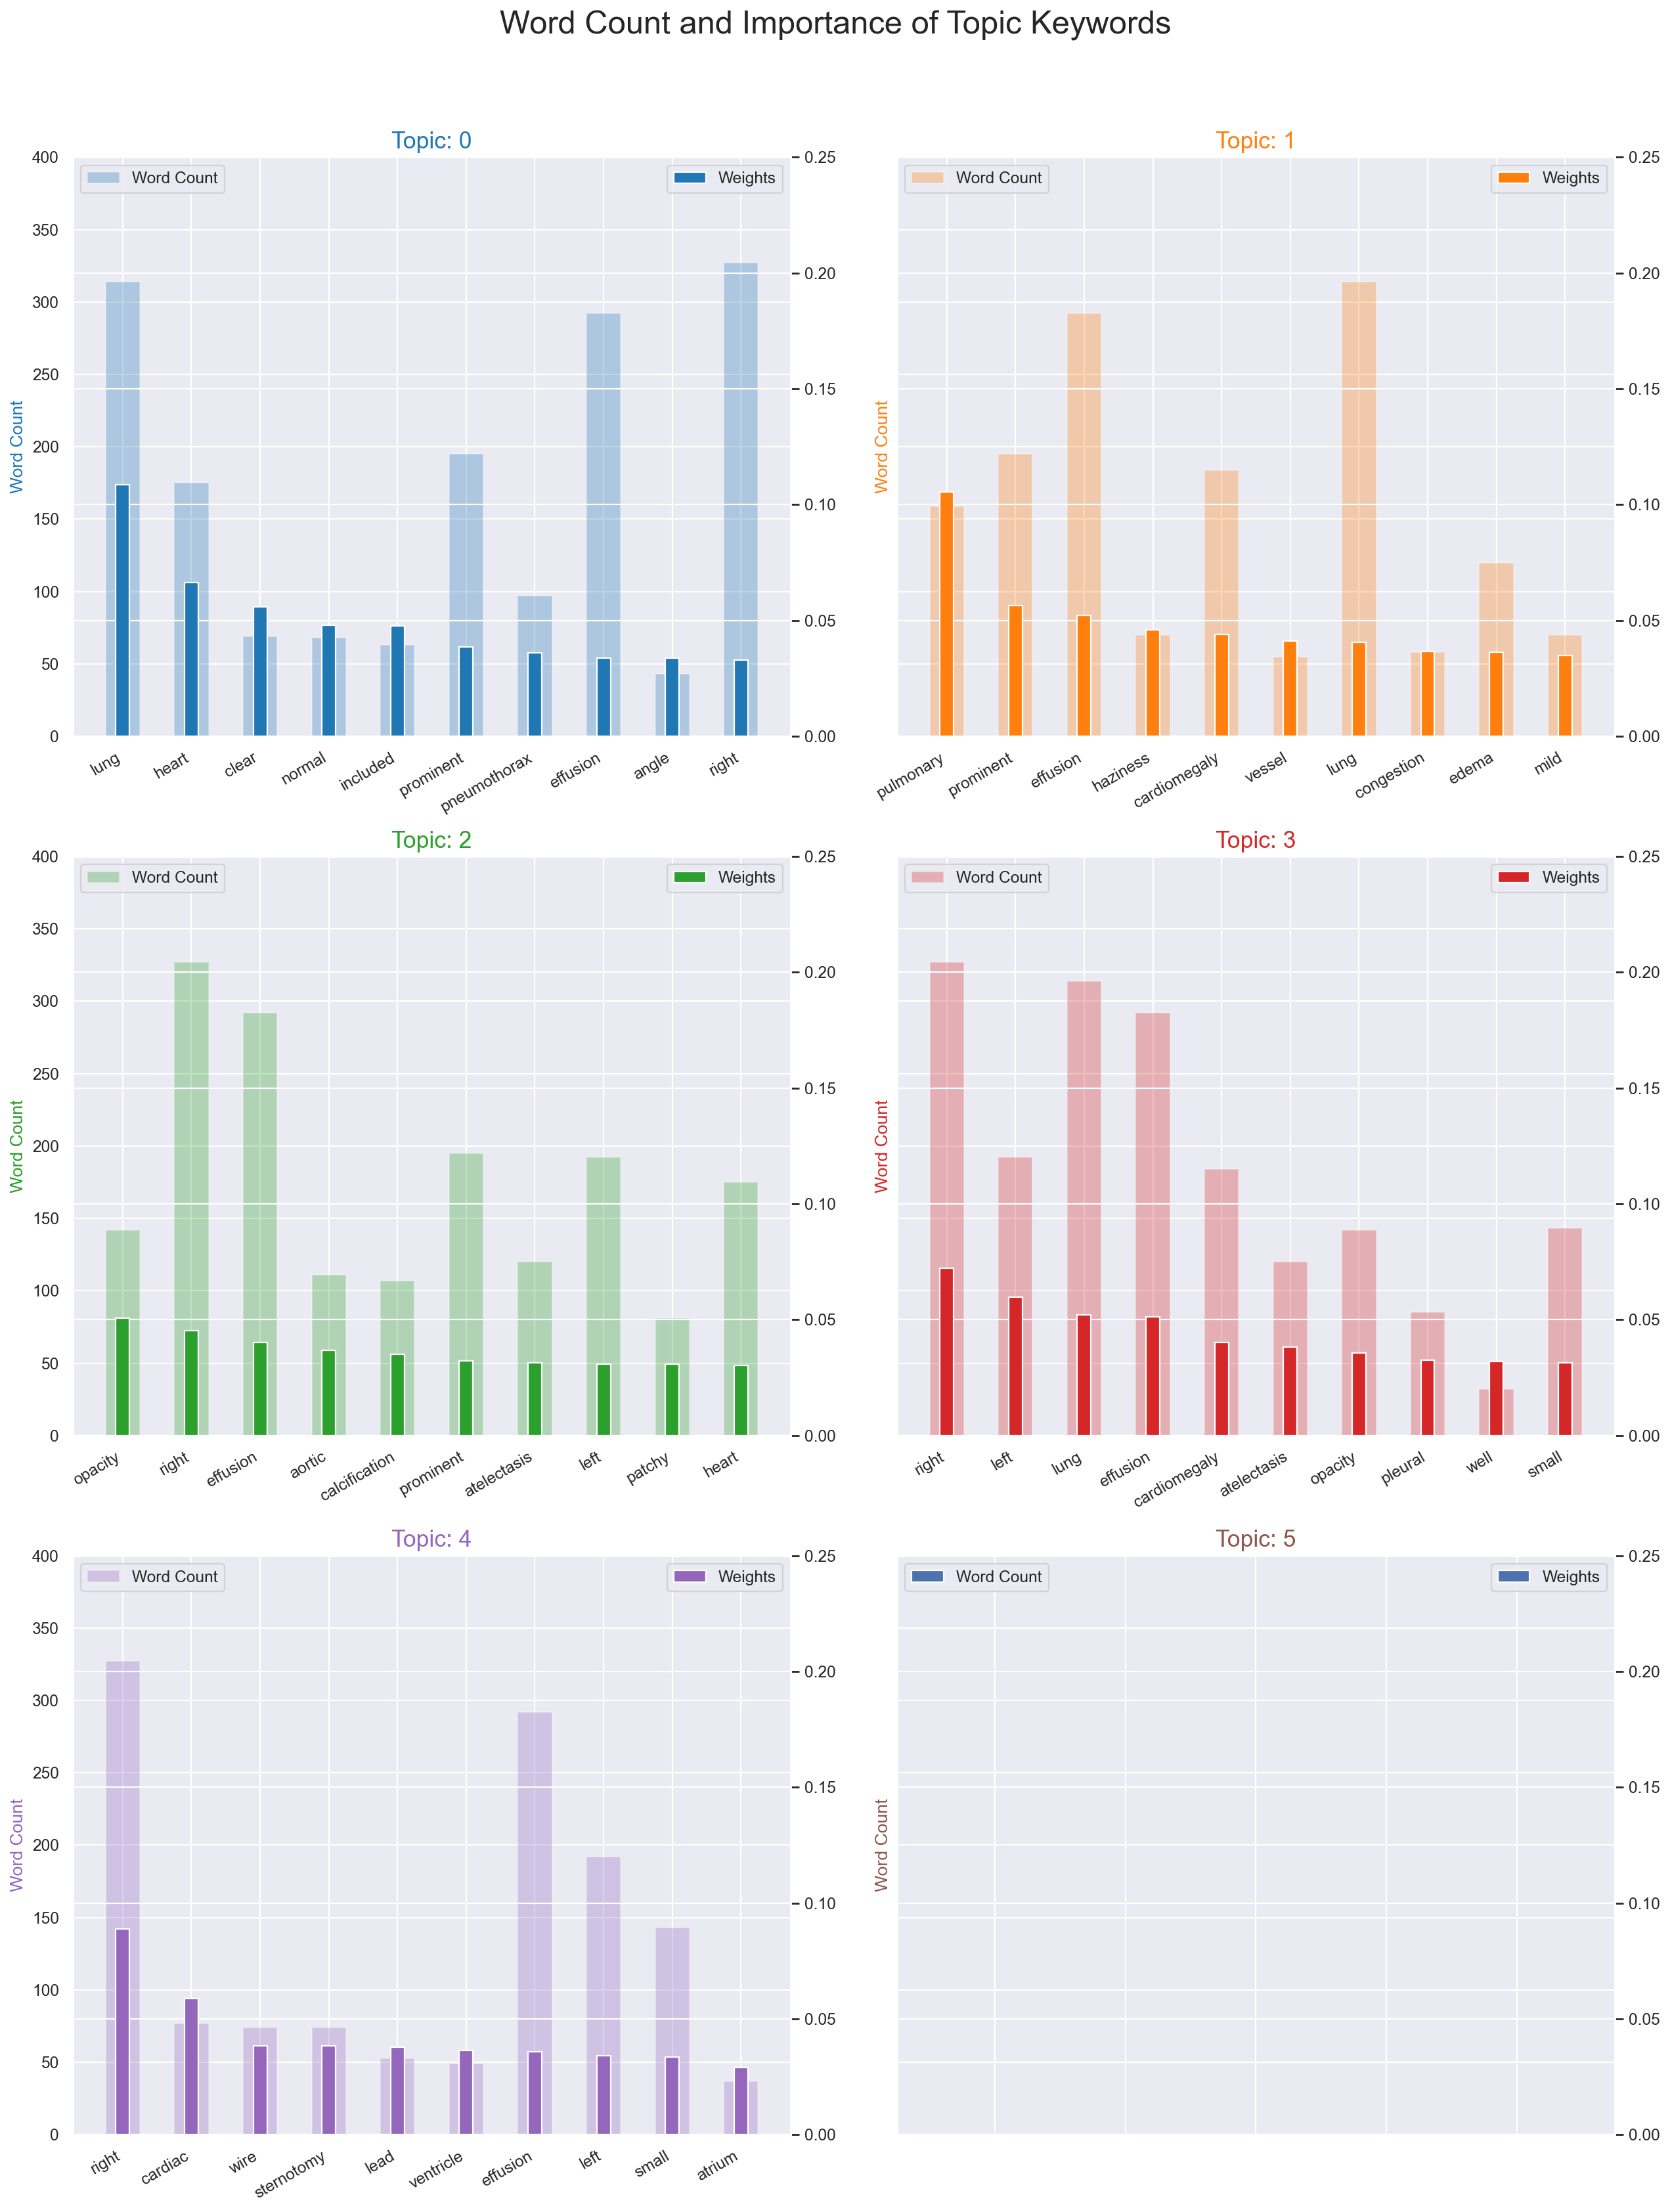

In [141]:
from collections import Counter
topics = lda_model.show_topics(formatted=False, num_topics=OPTIMAL_TOPICS)

data_flat = [w for w_list in lemmatized_chf_bigrams for w in w_list]

counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 2, figsize=(16,20), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.25); ax.set_ylim(0, 400)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)
plt.show()

### Pneumonia

In [142]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
          model =gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word_pneumonia,
                                                num_topics=num_topics, random_state=100,
                                                update_every=1, chunksize=100,
                                                passes=10, alpha='auto',
                                                per_word_topics=True)    
          model_list.append(model)
          coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
          coherence_values.append(coherencemodel.get_coherence())
          
    return model_list, coherence_values

#### Topical Model

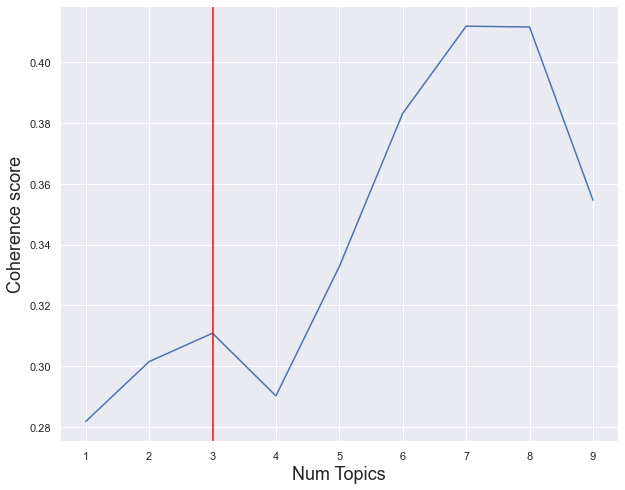

In [143]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word_pneumonia, corpus=corpus_pneumonia, 
                                                        texts=lemmatized_pneumonia_bigrams, start=1, limit=10, step=1)

limit=10
start=1
step=1
x = range(start, limit, step)
plt.figure(figsize=(10,8))
plt.plot(x, coherence_values)
#plt.axvline(x=7, color='red')
plt.axvline(x=3, color='red')
plt.xlabel("Num Topics", fontsize=18)
plt.ylabel("Coherence score", fontsize=18)
plt.show()

In [144]:
# Print the coherence scores
OPTIMAL_TOPICS = 0
max_cv = round( np.max(coherence_values), 4)

for m, cv in zip(x, coherence_values):
  if( round(cv, 4) == max_cv ):
    OPTIMAL_TOPICS = m
  print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

print("\nThe optimum number of topics is %i\n" %OPTIMAL_TOPICS)

Num Topics = 1  has Coherence Value of 0.2818
Num Topics = 2  has Coherence Value of 0.3015
Num Topics = 3  has Coherence Value of 0.3109
Num Topics = 4  has Coherence Value of 0.2902
Num Topics = 5  has Coherence Value of 0.3328
Num Topics = 6  has Coherence Value of 0.3832
Num Topics = 7  has Coherence Value of 0.4119
Num Topics = 8  has Coherence Value of 0.4117
Num Topics = 9  has Coherence Value of 0.3547

The optimum number of topics is 7



#### LDA Model

In [145]:
OPTIMAL_TOPICS = 3
#Experimentar valores diferentes

In [146]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus_pneumonia,
                                           id2word=id2word_pneumonia,
                                           num_topics=OPTIMAL_TOPICS, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [147]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus_pneumonia))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=lemmatized_pneumonia_bigrams, dictionary=id2word_pneumonia, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -4.873351483249498

Coherence Score:  0.3108830234204662


##### Visualization

In [148]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_lda.corpus, id2word_pneumonia, mds='mmds')
vis

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.209995  0.079997       1        1  66.206433
1     -0.010889 -0.197899       2        1  28.915897
2     -0.199105  0.117902       3        1   4.877670, topic_info=              Term        Freq       Total Category  logprob  loglift
4           normal  231.000000  231.000000  Default  30.0000  30.0000
170  calcification   62.000000   62.000000  Default  29.0000  29.0000
23           right  120.000000  120.000000  Default  28.0000  28.0000
20         opacity   64.000000   64.000000  Default  27.0000  27.0000
169         aortic   71.000000   71.000000  Default  26.0000  26.0000
..             ...         ...         ...      ...      ...      ...
18            left    2.977589   87.812783   Topic3  -3.9934  -0.3636
13        effusion    2.808218   90.544465   Topic3  -4.0520  -0.4528
23           right    2.883567  120.237726   Topic3  -4.0255  -0.7099
60           small    1.924402   19.870640   Topic3  -4.4299   0.6859
49          likely    1.619937    9.544090   Topic3  -4.6021   1.2470

[171 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
142       3  0.846099          air
70        2  0.987426         also
8         1  0.886176        angle
8         2  0.136335        angle
169       1  0.942955       aortic
...     ...       ...          ...
26        1  0.994495   visualized
38        2  0.959823       volume
228       2  0.908732  volume_loss
278       3  0.836893         wall
135       2  0.978914         well

[191 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [149]:
vis.topic_info

,Term,Freq,Total,Category,logprob,loglift
4,normal,231.000000,231.000000,Default,30.0000,30.0000
170,calcification,62.000000,62.000000,Default,29.0000,29.0000
23,right,120.000000,120.000000,Default,28.0000,28.0000
20,opacity,64.000000,64.000000,Default,27.0000,27.0000
169,aortic,71.000000,71.000000,Default,26.0000,26.0000
...,...,...,...,...,...,...
18,left,2.977589,87.812783,Topic3,-3.9934,-0.3636
13,effusion,2.808218,90.544465,Topic3,-4.0520,-0.4528
23,right,2.883567,120.237726,Topic3,-4.0255,-0.7099
60,small,1.924402,19.870640,Topic3,-4.4299,0.6859


#### Word Counts of Topic Keywords

C:\Users\User\AppData\Local\Temp\ipykernel_24832\2878358971.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


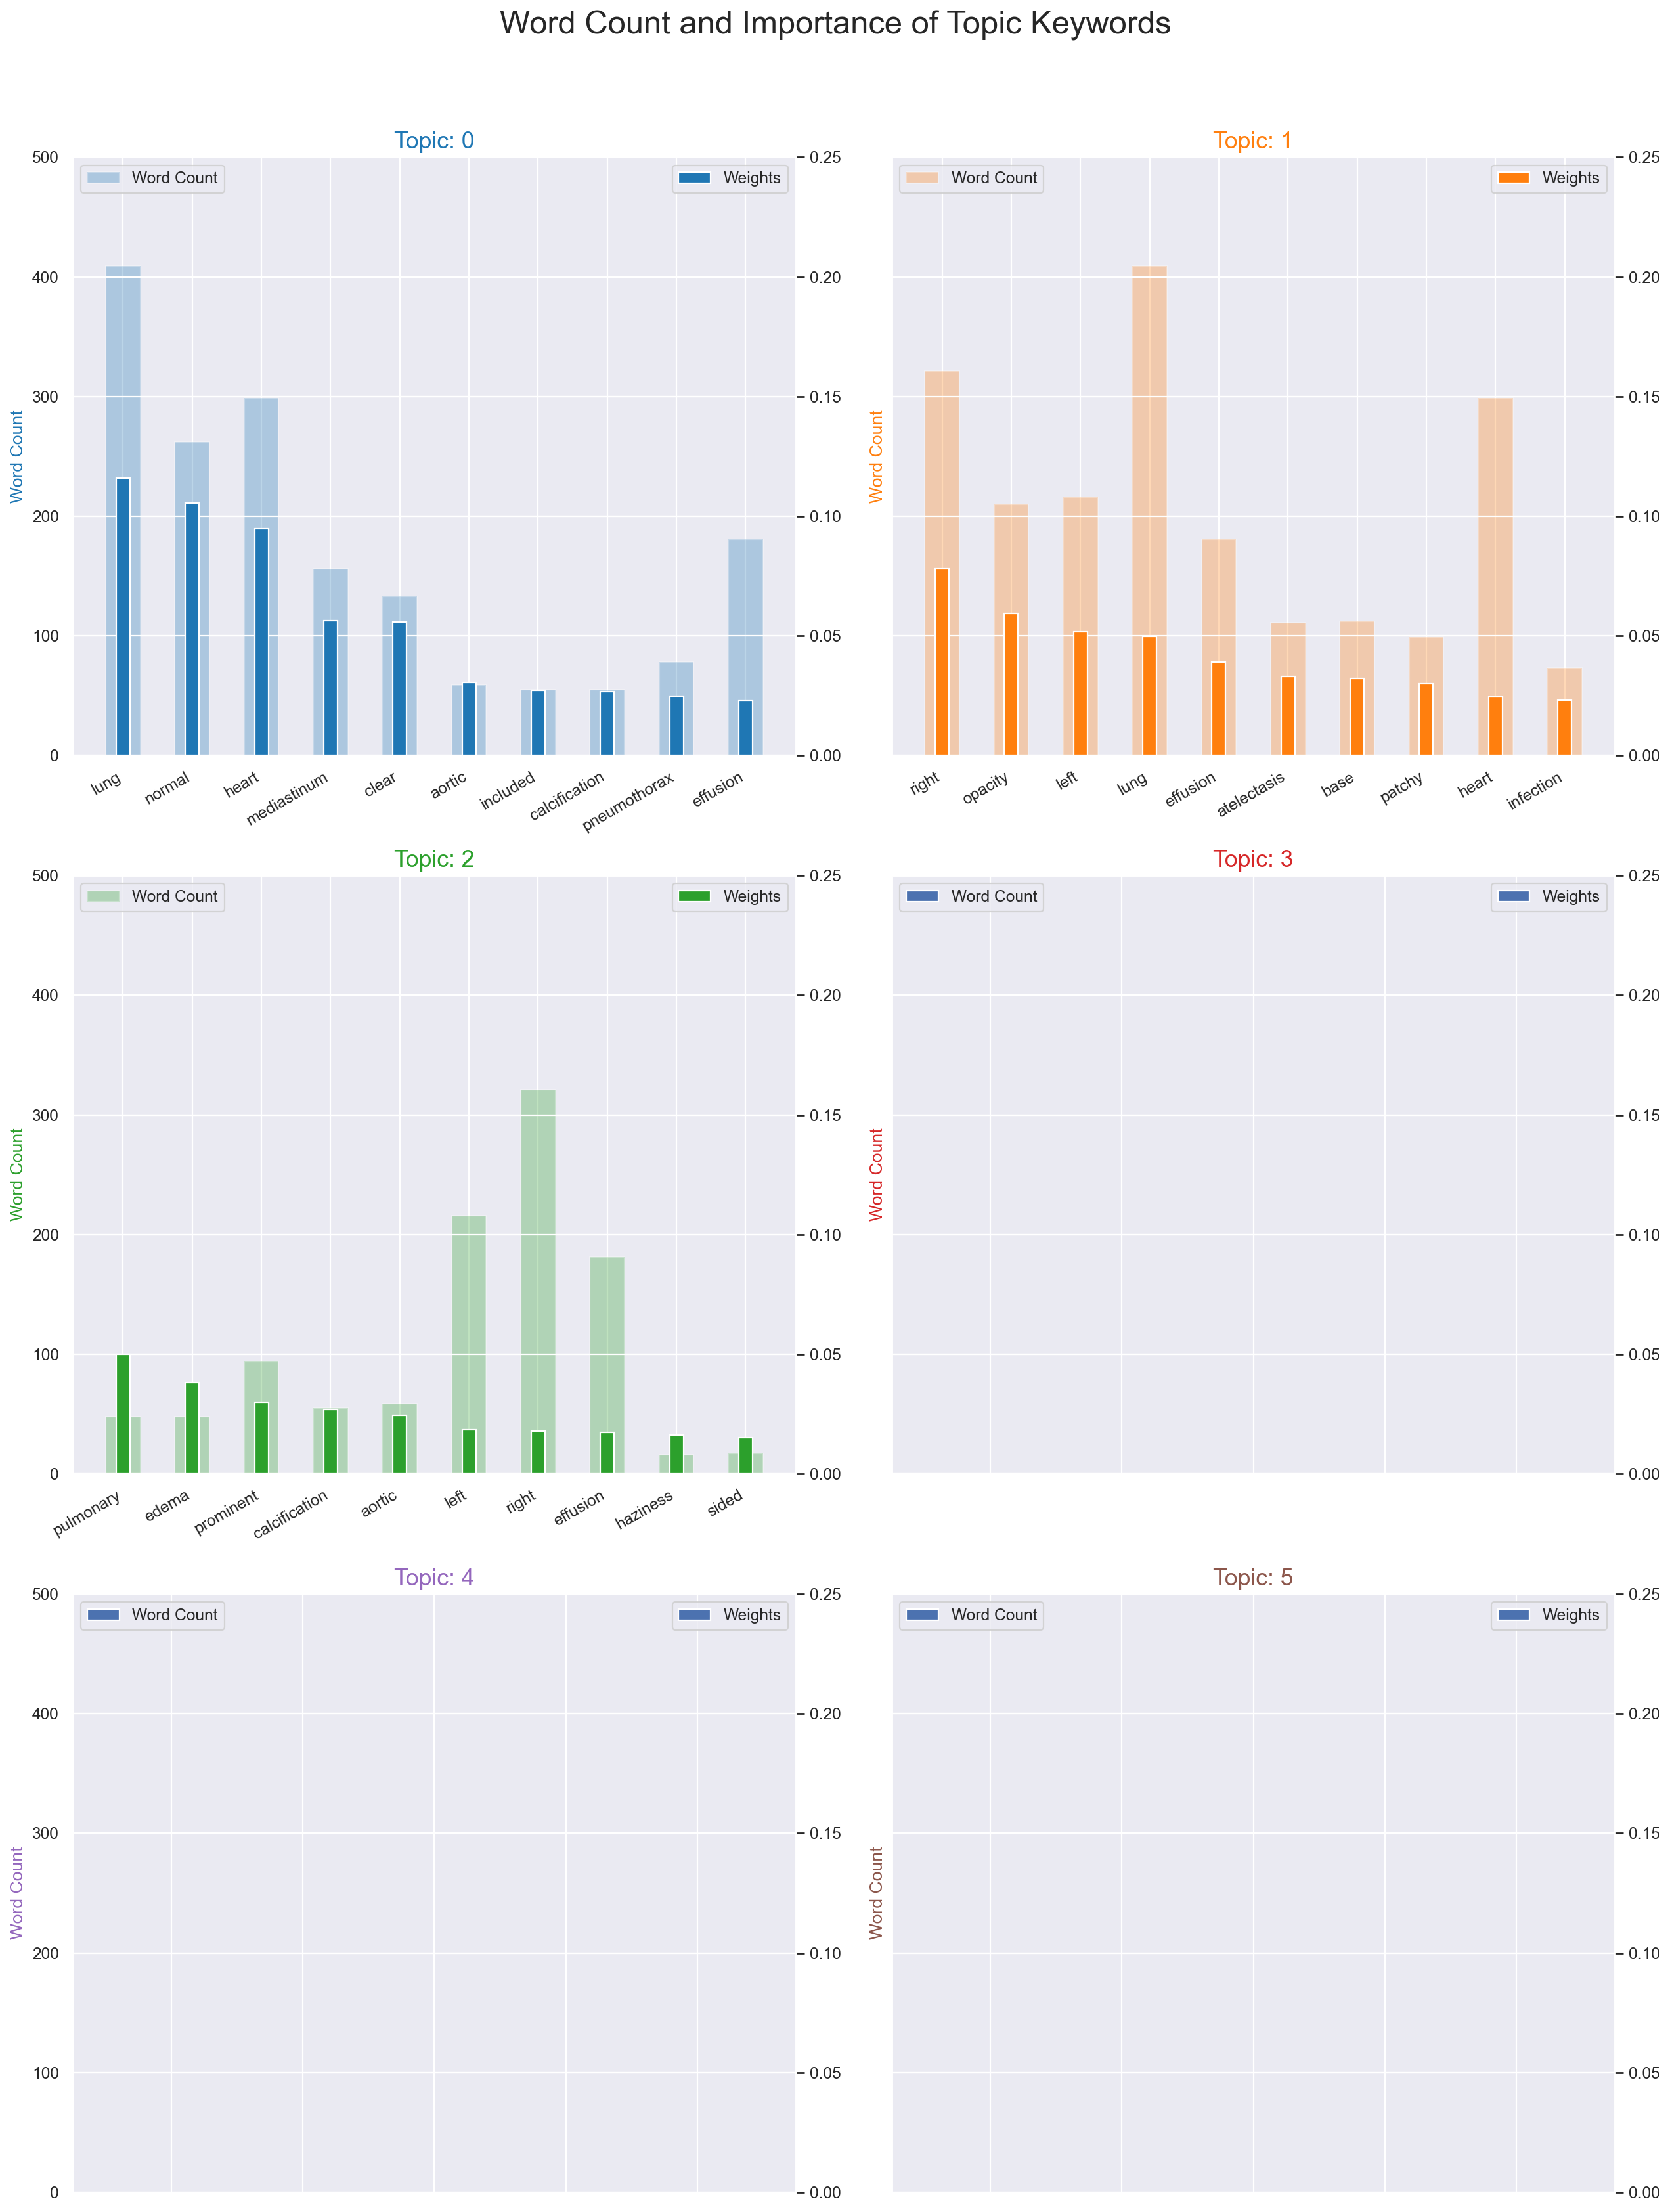

In [151]:
from collections import Counter
topics = lda_model.show_topics(formatted=False, num_topics=OPTIMAL_TOPICS)

data_flat = [w for w_list in lemmatized_pneumonia_bigrams for w in w_list]

counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 2, figsize=(16,20), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.25); ax.set_ylim(0, 500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)
plt.show()

## N-Grams

### N-Grams Initialization

In [102]:
class transcripts2words:
    def __init__(self):
        self.input = None
        self.output = None

    def transcripts_to_words(self, transcripts):
        self.words = []
        for transcript in transcripts:
            splitcomment = nltk.word_tokenize(transcript) 
            for word in splitcomment:
                if word not in stop_words:
                    self.words.append(word)
        return self.words

    def bigram(self, transcripts):
        words = self.transcripts_to_words(transcripts)
        self.finder2 = nltk.collocations.BigramCollocationFinder.from_words(words)
        self.words2_count_df = pd.DataFrame(self.finder2.ngram_fd.most_common())
        return self.words2_count_df

    def trigram(self, transcripts):
        words = self.transcripts_to_words(transcripts)
        self.finder3 = nltk.collocations.TrigramCollocationFinder.from_words(words)
        self.words3_count_df = pd.DataFrame(self.finder3.ngram_fd.most_common())
        return self.words3_count_df

    def quadgram(self, transcripts):
        words = self.transcripts_to_words(transcripts)
        self.finder4 = nltk.collocations.QuadgramCollocationFinder.from_words(words)
        self.words4_count_df = pd.DataFrame(self.finder4.ngram_fd.most_common())
        return self.words4_count_df

### Normal N-Grams

In [103]:
t2w = transcripts2words()
bigram_df = t2w.bigram(normal_transcripts_ngrams)
trigram_df = t2w.trigram(normal_transcripts_ngrams)
quadgram_df = t2w.quadgram(normal_transcripts_ngrams)
print(' The length of the n-grams are: ')
print('Bigram     |    ', len(bigram_df))
print('Trigram    |    ', len(trigram_df))
print('Quadgram   |    ', len(quadgram_df))

 The length of the n-grams are: 
Bigram     |     733
Trigram    |     1154
Quadgram   |     1548


In [104]:
df1_styler = bigram_df.head(10).style.set_table_attributes("style='display:inline'").set_caption('Top 20 Bigrams')
df2_styler = trigram_df.head(10).style.set_table_attributes("style='display:inline'").set_caption('Top 20 Trigrams')
df3_styler = quadgram_df.head(10).style.set_table_attributes("style='display:inline'").set_caption('Top 20 Quadrgrams')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_(), raw=True)

,0,1
0,"('normal', 'heart')",297
1,"('heart', 'mediastinum')",250
2,"('lungs', 'clear')",181
3,"('mediastinum', 'lungs')",126
4,"('normal', 'lungs')",115
5,"('clear', 'normal')",97
6,"('mediastinum', 'normal')",93
7,"('soft', 'tissues')",79
8,"('lungs', 'normal')",72
9,"('bones', 'soft')",66


### CHF N-Grams

In [105]:
t2w = transcripts2words()
bigram_df = t2w.bigram(chf_transcripts_ngrams)
trigram_df = t2w.trigram(chf_transcripts_ngrams)
quadgram_df = t2w.quadgram(chf_transcripts_ngrams)
print(' The length of the n-grams are: ')
print('Bigram     |    ', len(bigram_df))
print('Trigram    |    ', len(trigram_df))
print('Quadgram   |    ', len(quadgram_df))

 The length of the n-grams are: 
Bigram     |     2269
Trigram    |     4061
Quadgram   |     5325


In [106]:
df1_styler = bigram_df.head(10).style.set_table_attributes("style='display:inline'").set_caption('Top 20 Bigrams')
df2_styler = trigram_df.head(10).style.set_table_attributes("style='display:inline'").set_caption('Top 20 Trigrams')
df3_styler = quadgram_df.head(10).style.set_table_attributes("style='display:inline'").set_caption('Top 20 Quadrgrams')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_(), raw=True)

,0,1
0,"('aortic', 'calcifications')",104
1,"('prominent', 'heart')",98
2,"('sternotomy', 'wires')",74
3,"('pleural', 'effusion')",70
4,"('prominent', 'pulmonary')",70
5,"('effusion', 'pneumothorax')",68
6,"('large', 'effusion')",49
7,"('left', 'effusion')",47
8,"('pulmonary', 'edema')",47
9,"('pulmonary', 'vessels')",46


### Pneumonia N-Grams

In [107]:
t2w = transcripts2words()
bigram_df = t2w.bigram(pneumonia_transcripts_ngrams)
trigram_df = t2w.trigram(pneumonia_transcripts_ngrams)
quadgram_df = t2w.quadgram(pneumonia_transcripts_ngrams)
print(' The length of the n-grams are: ')
print('Bigram     |    ', len(bigram_df))
print('Trigram    |    ', len(trigram_df))
print('Quadgram   |    ', len(quadgram_df))

 The length of the n-grams are: 
Bigram     |     2249
Trigram    |     3764
Quadgram   |     4782


In [108]:
df1_styler = bigram_df.head(10).style.set_table_attributes("style='display:inline'").set_caption('Top 20 Bigrams')
df2_styler = trigram_df.head(10).style.set_table_attributes("style='display:inline'").set_caption('Top 20 Trigrams')
df3_styler = quadgram_df.head(10).style.set_table_attributes("style='display:inline'").set_caption('Top 20 Quadrgrams')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_(), raw=True)

,0,1
0,"('normal', 'heart')",191
1,"('heart', 'mediastinum')",140
2,"('right', 'lung')",75
3,"('pleural', 'effusion')",73
4,"('lungs', 'clear')",72
5,"('left', 'lung')",67
6,"('opacity', 'right')",62
7,"('patchy', 'opacity')",59
8,"('prominent', 'heart')",59
9,"('lung', 'base')",58


## Word Cloud

#### Normal

In [109]:
d = {}
for a, x in words_count_normal_df.values:
    d[a] = x

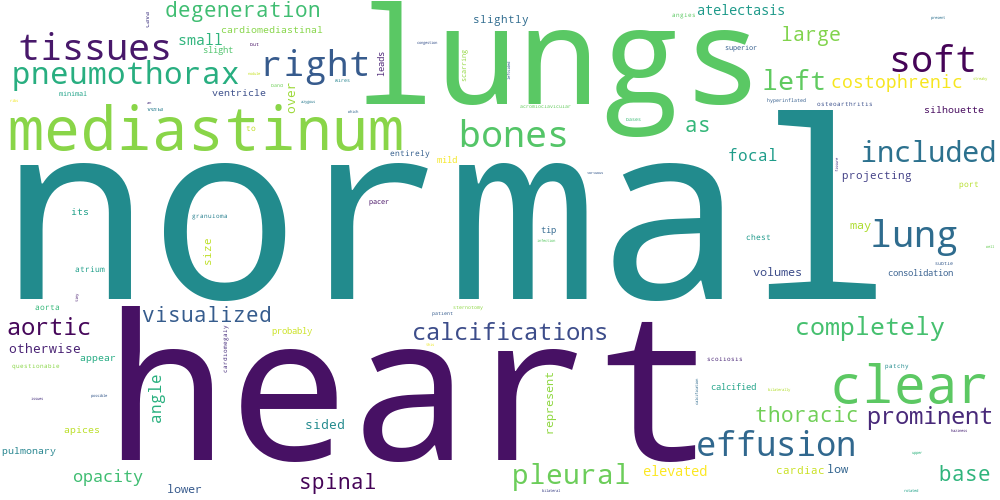

In [110]:
wordcloud = WordCloud(background_color="white", max_words=10000, repeat=False,contour_width=3, contour_color='steelblue', width=1000, height=500)
wordcloud.generate_from_frequencies(frequencies=d)
wordcloud.to_image()

#### CHF

In [111]:
d = {}
for a, x in words_count_chf_df.values:
    d[a] = x

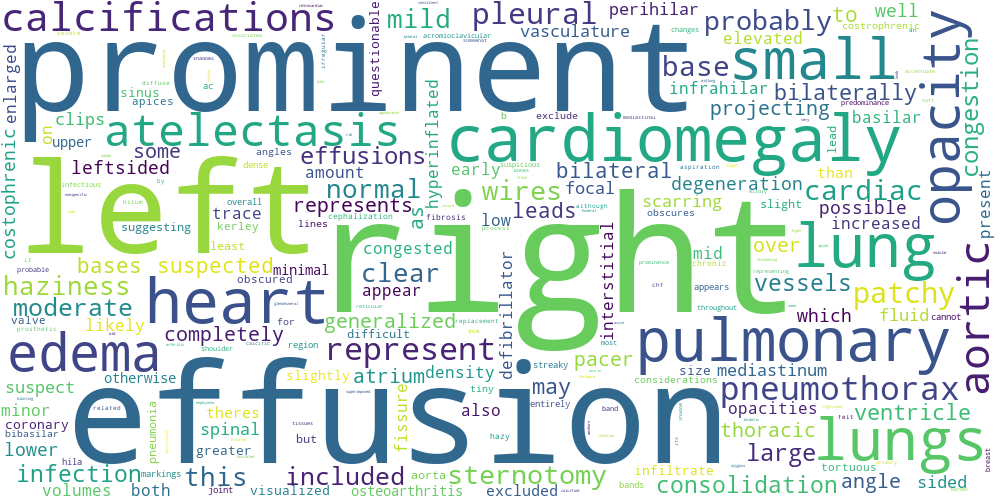

In [112]:
wordcloud = WordCloud(background_color="white", max_words=10000, repeat=False,contour_width=3, contour_color='steelblue', width=1000, height=500)
wordcloud.generate_from_frequencies(frequencies=d)
wordcloud.to_image()

#### Pneumonia

In [113]:
d = {}
for a, x in words_count_pneumonia_df.values:
    d[a] = x

In [114]:
wordcloud = WordCloud(background_color="white", max_words=10000, repeat=False,contour_width=3, contour_color='steelblue', width=1000, height=500)
wordcloud.generate_from_frequencies(frequencies=d)
wordcloud.to_image()

KeyboardInterrupt: 

## Assigning Bounding Boxes to words

### Assignment Code

In [ ]:
words_normal['Bounding Box EyeGaze'] = 'Not defined'

for i in range(len(words_normal)):
    dicom_id = words_normal['dicom_id'].iloc[i]
    aux_df = fp_normal.loc[fp_normal['DICOM_ID'] == dicom_id]
    aux_df2 = aux_df.loc[aux_df['Time (in secs)'] <= words_normal['begin_time'].iloc[i]]
    words_normal['Bounding Box EyeGaze'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-1]

: 

In [ ]:
words_chf['Bounding Box EyeGaze'] = 'Not defined'

for i in range(len(words_chf)):
    dicom_id = words_chf['dicom_id'].iloc[i]
    aux_df = fp_chf.loc[fp_chf['DICOM_ID'] == dicom_id]
    aux_df2 = aux_df.loc[aux_df['Time (in secs)'] <= words_chf['begin_time'].iloc[i]]
    words_chf['Bounding Box EyeGaze'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-1]

: 

In [ ]:
words_pneumonia['Bounding Box EyeGaze'] = 'Not defined'

for i in range(len(words_pneumonia)):
    dicom_id = words_pneumonia['dicom_id'].iloc[i]
    aux_df = fp_pneumonia.loc[fp_pneumonia['DICOM_ID'] == dicom_id]
    aux_df2 = aux_df.loc[aux_df['Time (in secs)'] <= words_pneumonia['begin_time'].iloc[i]]
    words_pneumonia['Bounding Box EyeGaze'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-1]

: 

### Results

#### Normal

In [ ]:
words_normal

: 

In [ ]:
Example_normal = words_normal.loc[words_normal['dicom_id'] == '16948ae4-b8be1fa1-6b1fa93f-30dcaa87-cb904cd1']
Example_normal

: 

#### CHF

In [ ]:
words_chf

: 

In [ ]:
Example_chf = words_chf.loc[words_chf['dicom_id'] == '24c7496c-d7635dfe-b8e0b87f-d818affc-78ff7cf4']
Example_chf

: 

#### Pneumonia

In [ ]:
words_pneumonia

: 

In [ ]:
Example_pneumonia = words_pneumonia.loc[words_pneumonia['dicom_id'] == '036000e0-04d69382-0f34cbc2-7b2ed2df-4254b120']
Example_pneumonia

: 

## Words by Bounding Box

### Normal

In [ ]:
words_normal['Count'] = 1

: 

In [ ]:
normal_words_count_by_bb_df = pd.DataFrame(words_normal.groupby(['Bounding Box EyeGaze'])['Count'].count())
normal_words_count_by_bb_df.sort_values(by='Count', ascending=False)

: 

In [ ]:
words_normal['Count'] = 1
normal_words_by_bb_df = pd.DataFrame(words_normal.groupby(['Bounding Box EyeGaze', 'phrase'])['Count'].count())

: 

In [ ]:
normal_words_by_bb_df

: 

### CHF

In [ ]:
words_chf['Count'] = 1
chf_words_by_bb_df = pd.DataFrame(words_chf.groupby(['Bounding Box EyeGaze', 'phrase'])['Count'].count())

: 

In [ ]:
chf_words_count_by_bb_df = pd.DataFrame(words_chf.groupby(['Bounding Box EyeGaze'])['Count'].count())

: 

### Pneumonia

In [ ]:
words_pneumonia['Count'] = 1
pneumonia_words_by_bb_df = pd.DataFrame(words_pneumonia.groupby(['Bounding Box EyeGaze', 'phrase'])['Count'].count())

: 

In [ ]:
pneumonia_words_count_by_bb_df = pd.DataFrame(words_pneumonia.groupby(['Bounding Box EyeGaze'])['Count'].count())

: 

### Results

In [ ]:
df1_styler = normal_words_by_bb_df.reset_index().sort_values(by='Count', ascending=False).head(20).style.set_table_attributes("style='display:inline'").set_caption('Top 20 Normal')
df2_styler = chf_words_by_bb_df.reset_index().sort_values(by='Count', ascending=False).head(20).style.set_table_attributes("style='display:inline'").set_caption('Top 20 with CHF Words')
df3_styler = pneumonia_words_by_bb_df.reset_index().sort_values(by='Count', ascending=False).head(20).style.set_table_attributes("style='display:inline'").set_caption('Top 20 with Pneumonia')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_(), raw=True)

: 

In [ ]:
df1_styler = normal_words_count_by_bb_df.reset_index().sort_values(by='Count', ascending=False).head(20).style.set_table_attributes("style='display:inline'").set_caption('Top 20 Normal')
df2_styler = chf_words_count_by_bb_df.reset_index().sort_values(by='Count', ascending=False).head(20).style.set_table_attributes("style='display:inline'").set_caption('Top 20 Words')
df3_styler = pneumonia_words_count_by_bb_df.reset_index().sort_values(by='Count', ascending=False).head(20).style.set_table_attributes("style='display:inline'").set_caption('Top 20 Pneumonia')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_(), raw=True)

: 

## Assigning NGrams to Bounding Boxes

### Normal NGrams

In [ ]:
words_normal.drop(words_normal[words_normal['phrase'] == 'and'].index, inplace = True)
words_normal.drop(words_normal[words_normal['phrase'] == 'are'].index, inplace = True)
words_normal.drop(words_normal[words_normal['phrase'] == 'the'].index, inplace = True)
words_normal.drop(words_normal[words_normal['phrase'] == 'or'].index, inplace = True)
words_normal.drop(words_normal[words_normal['phrase'] == 'at'].index, inplace = True)
words_normal.drop(words_normal[words_normal['phrase'] == 'in'].index, inplace = True)
words_normal.drop(words_normal[words_normal['phrase'] == 'is'].index, inplace = True)
words_normal.drop(words_normal[words_normal['phrase'] == 'no'].index, inplace = True)
words_normal.drop(words_normal[words_normal['phrase'] == 'not'].index, inplace = True)
words_normal.drop(words_normal[words_normal['phrase'] == 'of'].index, inplace = True)
words_normal.drop(words_normal[words_normal['phrase'] == 'a'].index, inplace = True)
words_normal.drop(words_normal[words_normal['phrase'] == 'on'].index, inplace = True)

for i in range(len(words_normal)):
    if words_normal['phrase'].iloc[i][-1] == '.':
        words_normal['phrase'] = words_normal['phrase'].replace(words_normal['phrase'].iloc[i], words_normal['phrase'].iloc[i][0:-1])

: 

In [ ]:
a = 'bones'
b = 'soft'

words_normal_ngram_association = pd.DataFrame()

for i in range(len(words_normal)):
    if words_normal['phrase'].iloc[i] == a:
        if words_normal['phrase'].iloc[i+1] == b:
            aux_df = pd.DataFrame(words_normal.iloc[i:i+2]) 
            words_normal_ngram_association = pd.concat([words_normal_ngram_association, aux_df])

words_normal_ngram_association.head(4)

: 

In [ ]:
column_names = ['begin_time', 'end_time', 'phrase_01', 'phrase_02', 'patient_id', 'dicom_id']
ngrams_normal_df = pd.DataFrame(columns = column_names)

for i in range(int(len(words_normal_ngram_association)/2)):
    bt = words_normal_ngram_association['begin_time'].iloc[i+(i*1)]
    et = words_normal_ngram_association['end_time'].iloc[i+1+(i*1)]
    p01 = words_normal_ngram_association['phrase'].iloc[i+(i*1)]
    p02 = words_normal_ngram_association['phrase'].iloc[i+1+(i*1)]
    p_id = words_normal_ngram_association['patient_id'].iloc[i+(i*1)]
    d_id = words_normal_ngram_association['dicom_id'].iloc[i+(i*1)]
    ngrams_normal_df = ngrams_normal_df.append({'begin_time': bt, 'end_time': et, 'phrase_01': p01, 'phrase_02': p02, 'patient_id': p_id, 'dicom_id': d_id}, ignore_index=True)

ngrams_normal_df.head(4)

: 

In [ ]:
ngrams_normal_df['Bounding Box EyeGaze 01'] = 'Not defined'
ngrams_normal_df['Bounding Box EyeGaze 02'] = 'Not defined'
ngrams_normal_df['Bounding Box EyeGaze 03'] = 'Not defined'
ngrams_normal_df['Bounding Box EyeGaze 04'] = 'Not defined'
ngrams_normal_df['Bounding Box EyeGaze 05'] = 'Not defined'

for i in range(len(ngrams_normal_df)):
    dicom_id = ngrams_normal_df['dicom_id'].iloc[i]
    aux_df = fp_normal.loc[fp_normal['DICOM_ID'] == dicom_id]
    aux_df2 = aux_df.loc[aux_df['Time (in secs)'] <= (ngrams_normal_df['begin_time'].iloc[i]+ngrams_normal_df['end_time'].iloc[i])/2]
    if len(aux_df2) >= 5:
        ngrams_normal_df['Bounding Box EyeGaze 01'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-5]
    if len(aux_df2) >= 4:
        ngrams_normal_df['Bounding Box EyeGaze 02'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-4]
    if len(aux_df2) >= 3:
        ngrams_normal_df['Bounding Box EyeGaze 03'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-3]
    if len(aux_df2) >= 2:
        ngrams_normal_df['Bounding Box EyeGaze 04'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-2]
    if len(aux_df2) >= 1:
        ngrams_normal_df['Bounding Box EyeGaze 05'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-1]

ngrams_normal_df['time_delta'] = ngrams_normal_df['end_time'] - ngrams_normal_df['begin_time']

: 

In [ ]:
ngrams_normal_df

: 

In [ ]:
delta_mean = round(ngrams_normal_df['time_delta'].mean(),2)
higher_deltas_df_normal = ngrams_normal_df.loc[ngrams_normal_df['time_delta']>=delta_mean+delta_mean/2]
higher_deltas_df_normal

: 

### CHF NGrams

In [ ]:
words_chf.drop(words_chf[words_chf['phrase'] == 'and'].index, inplace = True)
words_chf.drop(words_chf[words_chf['phrase'] == 'are'].index, inplace = True)
words_chf.drop(words_chf[words_chf['phrase'] == 'the'].index, inplace = True)
words_chf.drop(words_chf[words_chf['phrase'] == 'or'].index, inplace = True)
words_chf.drop(words_chf[words_chf['phrase'] == 'at'].index, inplace = True)
words_chf.drop(words_chf[words_chf['phrase'] == 'in'].index, inplace = True)
words_chf.drop(words_chf[words_chf['phrase'] == 'is'].index, inplace = True)
words_chf.drop(words_chf[words_chf['phrase'] == 'no'].index, inplace = True)
words_chf.drop(words_chf[words_chf['phrase'] == 'not'].index, inplace = True)
words_chf.drop(words_chf[words_chf['phrase'] == 'of'].index, inplace = True)
words_chf.drop(words_chf[words_chf['phrase'] == 'a'].index, inplace = True)
words_chf.drop(words_chf[words_chf['phrase'] == 'on'].index, inplace = True)
words_chf.drop(words_chf[words_chf['phrase'] == ','].index, inplace = True)
words_chf.drop(words_chf[words_chf['phrase'] == '.'].index, inplace = True)

for i in range(len(words_chf)):
    if words_chf['phrase'].iloc[i][-1] == '.':
        words_chf['phrase'] = words_chf['phrase'].replace(words_chf['phrase'].iloc[i], words_chf['phrase'].iloc[i][0:-1])

: 

In [ ]:
a = 'aortic'
b = 'calcifications'

words_chf_ngram_association = pd.DataFrame()

for i in range(len(words_chf)):
    if words_chf['phrase'].iloc[i] == a:
        if words_chf['phrase'].iloc[i+1] == b:
            aux_df = pd.DataFrame(words_chf.iloc[i:i+2]) 
            words_chf_ngram_association = pd.concat([words_chf_ngram_association, aux_df])

words_chf_ngram_association.head(4)

: 

In [ ]:
column_names = ['begin_time', 'end_time', 'phrase_01', 'phrase_02', 'patient_id', 'dicom_id']
ngrams_chf_df = pd.DataFrame(columns = column_names)

for i in range(int(len(words_chf_ngram_association)/2)):
    bt = words_chf_ngram_association['begin_time'].iloc[i+(i*1)]
    et = words_chf_ngram_association['end_time'].iloc[i+1+(i*1)]
    p01 = words_chf_ngram_association['phrase'].iloc[i+(i*1)]
    p02 = words_chf_ngram_association['phrase'].iloc[i+1+(i*1)]
    p_id = words_chf_ngram_association['patient_id'].iloc[i+(i*1)]
    d_id = words_chf_ngram_association['dicom_id'].iloc[i+(i*1)]
    ngrams_chf_df = ngrams_chf_df.append({'begin_time': bt, 'end_time': et, 'phrase_01': p01, 'phrase_02': p02, 'patient_id': p_id, 'dicom_id': d_id}, ignore_index=True)

ngrams_chf_df.head(4)

: 

In [ ]:
ngrams_chf_df['Bounding Box EyeGaze 01'] = 'Not defined'
ngrams_chf_df['Bounding Box EyeGaze 02'] = 'Not defined'
ngrams_chf_df['Bounding Box EyeGaze 03'] = 'Not defined'
ngrams_chf_df['Bounding Box EyeGaze 04'] = 'Not defined'
ngrams_chf_df['Bounding Box EyeGaze 05'] = 'Not defined'

for i in range(len(ngrams_chf_df)):
    dicom_id = ngrams_chf_df['dicom_id'].iloc[i]
    aux_df = fp_chf.loc[fp_chf['DICOM_ID'] == dicom_id]
    aux_df2 = aux_df.loc[aux_df['Time (in secs)'] <= (ngrams_chf_df['begin_time'].iloc[i]+ngrams_chf_df['end_time'].iloc[i])/2]
    if len(aux_df2) >= 5:
        ngrams_chf_df['Bounding Box EyeGaze 01'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-5]
    if len(aux_df2) >= 4:
        ngrams_chf_df['Bounding Box EyeGaze 02'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-4]
    if len(aux_df2) >= 3:
        ngrams_chf_df['Bounding Box EyeGaze 03'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-3]
    if len(aux_df2) >= 2:
        ngrams_chf_df['Bounding Box EyeGaze 04'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-2]
    if len(aux_df2) >= 1:
        ngrams_chf_df['Bounding Box EyeGaze 05'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-1]

ngrams_chf_df['time_delta'] = ngrams_chf_df['end_time'] - ngrams_chf_df['begin_time']

: 

In [ ]:
pd.set_option('display.max_rows', 100)
ngrams_chf_df

: 

In [ ]:
delta_mean = round(ngrams_chf_df['time_delta'].mean(),2)
higher_deltas_df_chf = ngrams_chf_df.loc[ngrams_chf_df['time_delta']>=delta_mean+delta_mean/2]
higher_deltas_df_chf

: 

### Pneumonia NGrams

In [ ]:
words_pneumonia.drop(words_pneumonia[words_pneumonia['phrase'] == 'and'].index, inplace = True)
words_pneumonia.drop(words_pneumonia[words_pneumonia['phrase'] == 'are'].index, inplace = True)
words_pneumonia.drop(words_pneumonia[words_pneumonia['phrase'] == 'the'].index, inplace = True)
words_pneumonia.drop(words_pneumonia[words_pneumonia['phrase'] == 'or'].index, inplace = True)
words_pneumonia.drop(words_pneumonia[words_pneumonia['phrase'] == 'at'].index, inplace = True)
words_pneumonia.drop(words_pneumonia[words_pneumonia['phrase'] == 'in'].index, inplace = True)
words_pneumonia.drop(words_pneumonia[words_pneumonia['phrase'] == 'is'].index, inplace = True)
words_pneumonia.drop(words_pneumonia[words_pneumonia['phrase'] == 'no'].index, inplace = True)
words_pneumonia.drop(words_pneumonia[words_pneumonia['phrase'] == 'not'].index, inplace = True)
words_pneumonia.drop(words_pneumonia[words_pneumonia['phrase'] == 'of'].index, inplace = True)
words_pneumonia.drop(words_pneumonia[words_pneumonia['phrase'] == 'a'].index, inplace = True)
words_pneumonia.drop(words_pneumonia[words_pneumonia['phrase'] == 'on'].index, inplace = True)
words_pneumonia.drop(words_pneumonia[words_pneumonia['phrase'] == ','].index, inplace = True)
words_pneumonia.drop(words_pneumonia[words_pneumonia['phrase'] == '.'].index, inplace = True)

for i in range(len(words_pneumonia)):
    if words_pneumonia['phrase'].iloc[i][-1] == '.':
        words_pneumonia['phrase'] = words_pneumonia['phrase'].replace(words_pneumonia['phrase'].iloc[i], words_pneumonia['phrase'].iloc[i][0:-1])

: 

In [ ]:
a = 'pleural'
b = 'effusion'

words_pneumonia_ngram_association = pd.DataFrame()

for i in range(len(words_pneumonia)):
    if words_pneumonia['phrase'].iloc[i] == a:
        if words_pneumonia['phrase'].iloc[i+1] == b:
            aux_df = pd.DataFrame(words_pneumonia.iloc[i:i+2]) 
            words_pneumonia_ngram_association = pd.concat([words_pneumonia_ngram_association, aux_df])

words_pneumonia_ngram_association.head(4)

: 

In [ ]:
column_names = ['begin_time', 'end_time', 'phrase_01', 'phrase_02', 'patient_id', 'dicom_id']
ngrams_pneumonia_df = pd.DataFrame(columns = column_names)

for i in range(int(len(words_pneumonia_ngram_association)/2)):
    bt = words_pneumonia_ngram_association['begin_time'].iloc[i+(i*1)]
    et = words_pneumonia_ngram_association['end_time'].iloc[i+1+(i*1)]
    p01 = words_pneumonia_ngram_association['phrase'].iloc[i+(i*1)]
    p02 = words_pneumonia_ngram_association['phrase'].iloc[i+1+(i*1)]
    p_id = words_pneumonia_ngram_association['patient_id'].iloc[i+(i*1)]
    d_id = words_pneumonia_ngram_association['dicom_id'].iloc[i+(i*1)]
    ngrams_pneumonia_df = ngrams_pneumonia_df.append({'begin_time': bt, 'end_time': et, 'phrase_01': p01, 'phrase_02': p02, 'patient_id': p_id, 'dicom_id': d_id}, ignore_index=True)

ngrams_pneumonia_df.head(4)

: 

In [ ]:
ngrams_pneumonia_df['Bounding Box EyeGaze 01'] = 'Not defined'
ngrams_pneumonia_df['Bounding Box EyeGaze 02'] = 'Not defined'
ngrams_pneumonia_df['Bounding Box EyeGaze 03'] = 'Not defined'
ngrams_pneumonia_df['Bounding Box EyeGaze 04'] = 'Not defined'
ngrams_pneumonia_df['Bounding Box EyeGaze 05'] = 'Not defined'

for i in range(len(ngrams_pneumonia_df)):
    dicom_id = ngrams_pneumonia_df['dicom_id'].iloc[i]
    aux_df = fp_pneumonia.loc[fp_pneumonia['DICOM_ID'] == dicom_id]
    aux_df2 = aux_df.loc[aux_df['Time (in secs)'] <= (ngrams_pneumonia_df['begin_time'].iloc[i]+ngrams_pneumonia_df['end_time'].iloc[i])/2]
    if len(aux_df2) >= 5:
        ngrams_pneumonia_df['Bounding Box EyeGaze 01'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-5]
    if len(aux_df2) >= 4:
        ngrams_pneumonia_df['Bounding Box EyeGaze 02'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-4]
    if len(aux_df2) >= 3:
        ngrams_pneumonia_df['Bounding Box EyeGaze 03'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-3]
    if len(aux_df2) >= 2:
        ngrams_pneumonia_df['Bounding Box EyeGaze 04'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-2]
    if len(aux_df2) >= 1:
        ngrams_pneumonia_df['Bounding Box EyeGaze 05'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-1]

ngrams_pneumonia_df['time_delta'] = ngrams_pneumonia_df['end_time'] - ngrams_pneumonia_df['begin_time']

: 

In [ ]:
ngrams_pneumonia_df

: 

In [ ]:
delta_mean

: 

In [ ]:
delta_mean = round(ngrams_pneumonia_df['time_delta'].mean(),2)
higher_deltas_df_pneumonia = ngrams_pneumonia_df.loc[ngrams_pneumonia_df['time_delta']>=delta_mean+delta_mean/2]
higher_deltas_df_pneumonia

: 

### "Could Represent" Analysis

In [ ]:
a = 'could'
b = 'represent'

words_chf_ngram_association_extra = pd.DataFrame()

for i in range(len(words_chf)):
    if words_chf['phrase'].iloc[i] == a:
        if words_chf['phrase'].iloc[i+1] == b:
            aux_df = pd.DataFrame(words_chf.iloc[i:i+13]) 
            words_chf_ngram_association_extra = pd.concat([words_chf_ngram_association_extra, aux_df])

words_chf_ngram_association_extra.head(13)

: 

In [ ]:
fixations = pd.read_csv(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_12661994\EyeGaze\fixations.csv')

aux_df = fixations.loc[fixations['Time (in secs)'] <= 20.1]
aux_df = aux_df.loc[aux_df['Time (in secs)'] >= 15.5]

x_coordinates = aux_df['X_ORIGINAL'].tolist()
y_coordinates = aux_df['Y_ORIGINAL'].tolist()

: 

In [ ]:
from PIL import Image

im = Image.open(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_12661994\CXR-JPG\s56611517\748991dc-fb330cd1-fc203d00-b89b5ccb-7995b475.jpg')
width, height = im.size
data = image.imread(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_12661994\CXR-JPG\s56611517\748991dc-fb330cd1-fc203d00-b89b5ccb-7995b475.jpg')

plt.figure(figsize=(15,15))
for i in range(len(x_coordinates)):
    plt.plot(x_coordinates[i], y_coordinates[i], marker='o', color='crimson', alpha=0.75)
plt.imshow(data, cmap='gray')
plt.show()

: 

## Correlation Matrix between common words and Bounding Boxes

### Normal Pathology

In [ ]:
words_normal_cor_df = pd.concat([words_normal.loc[words_normal['phrase'] == 'normal'], words_normal.loc[words_normal['phrase'] == 'clear']])
words_normal_cor_df = pd.concat([words_normal_cor_df, words_normal.loc[words_normal['phrase'] == 'soft']])
words_normal_cor_df = pd.concat([words_normal_cor_df, words_normal.loc[words_normal['phrase'] == 'effusion']])
words_normal_cor_df = pd.concat([words_normal_cor_df, words_normal.loc[words_normal['phrase'] == 'completely']])
words_normal_cor_df = pd.concat([words_normal_cor_df, words_normal.loc[words_normal['phrase'] == 'calcifications']])
words_normal_cor_df = pd.concat([words_normal_cor_df, words_normal.loc[words_normal['phrase'] == 'degeneration']])

aux_df = pd.DataFrame(words_normal_cor_df.groupby(['Bounding Box EyeGaze', 'phrase'])['Count'].sum()).T
aux_df

: 

In [ ]:
aux_dict = aux_df.to_dict()
columns_names = list(aux_dict.keys())
cor_matrix_df_normal = pd.DataFrame(columns=columns_names)
cor_matrix_df_normal

for i in range(len(columns_names)):
    aux_array = np.zeros(len(columns_names), dtype=int)
    aux_array[i] = aux_dict[columns_names[i]]['Count']
    cor_matrix_df_normal.loc[i] = aux_array

cor_matrix_df_normal[''] = columns_names
cor_matrix_df_normal.set_index('', inplace=True)

cor_matrix_df_normal = cor_matrix_df_normal.astype(int)

: 

In [ ]:
cor_matrix_df_normal

: 

In [ ]:
corrM = cor_matrix_df_normal.corr()
corrM

: 

In [ ]:
corr = cor_matrix_df_normal.corr()
f, ax = plt.subplots(figsize=(100, 100))
sns.heatmap(corr, cmap="Blues", annot=True, linewidths=.5)

: 

In [ ]:
cardiac_silhouette_dict = aux_df['cardiac silhouette'].to_dict()
left_clavicle_dict = aux_df['left clavicle'].to_dict()
left_costophrenic_angle_dict = aux_df['left costophrenic angle'].to_dict()
left_hilar_structures_dict = aux_df['left hilar structures'].to_dict()
left_lower_lung_zones_dict = aux_df['left lower lung zone'].to_dict()
left_lung_dict = aux_df['left lung'].to_dict()
left_mid_lung_zone_dict = aux_df['left mid lung zone'].to_dict()
left_upper_zone_dict = aux_df['left upper lung zone'].to_dict()
right_clavicle_dict = aux_df['right clavicle'].to_dict()
right_costophrenic_angle_dict = aux_df['right costophrenic angle'].to_dict()
right_hilar_dict = aux_df['right hilar structures'].to_dict()
right_lower_lung_zone_dict = aux_df['right lower lung zone'].to_dict()
right_lung_dict = aux_df['right lung'].to_dict()
right_mid_lung_zone_dict = aux_df['right mid lung zone'].to_dict()
right_upper_lung_zone_dict = aux_df['right upper lung zone'].to_dict()
trachea_dict = aux_df['trachea'].to_dict()
upper_mediatinum_dict = aux_df['upper mediastinum'].to_dict()
area_out_of_bb_dict = aux_df['Area out of Bounding Boxes'].to_dict()

normal_cor_matrix_df = pd.DataFrame([cardiac_silhouette_dict])
normal_cor_matrix_df = pd.concat([normal_cor_matrix_df, pd.DataFrame([left_clavicle_dict])])
normal_cor_matrix_df = pd.concat([normal_cor_matrix_df, pd.DataFrame([left_costophrenic_angle_dict])])
normal_cor_matrix_df = pd.concat([normal_cor_matrix_df, pd.DataFrame([left_hilar_structures_dict])])
normal_cor_matrix_df = pd.concat([normal_cor_matrix_df, pd.DataFrame([left_lower_lung_zones_dict])])
normal_cor_matrix_df = pd.concat([normal_cor_matrix_df, pd.DataFrame([left_lung_dict])])
normal_cor_matrix_df = pd.concat([normal_cor_matrix_df, pd.DataFrame([left_mid_lung_zone_dict])])
normal_cor_matrix_df = pd.concat([normal_cor_matrix_df, pd.DataFrame([left_upper_zone_dict])])
normal_cor_matrix_df = pd.concat([normal_cor_matrix_df, pd.DataFrame([right_clavicle_dict])])
normal_cor_matrix_df = pd.concat([normal_cor_matrix_df, pd.DataFrame([right_costophrenic_angle_dict])])
normal_cor_matrix_df = pd.concat([normal_cor_matrix_df, pd.DataFrame([right_hilar_dict])])
normal_cor_matrix_df = pd.concat([normal_cor_matrix_df, pd.DataFrame([right_lower_lung_zone_dict])])
normal_cor_matrix_df = pd.concat([normal_cor_matrix_df, pd.DataFrame([right_lung_dict])])
normal_cor_matrix_df = pd.concat([normal_cor_matrix_df, pd.DataFrame([right_mid_lung_zone_dict])])
normal_cor_matrix_df = pd.concat([normal_cor_matrix_df, pd.DataFrame([right_upper_lung_zone_dict])])
normal_cor_matrix_df = pd.concat([normal_cor_matrix_df, pd.DataFrame([trachea_dict])])
normal_cor_matrix_df = pd.concat([normal_cor_matrix_df, pd.DataFrame([upper_mediatinum_dict])])
normal_cor_matrix_df = pd.concat([normal_cor_matrix_df, pd.DataFrame([area_out_of_bb_dict])])
normal_cor_matrix_df.fillna(0, inplace=True)


for i in range(len(normal_cor_matrix_df)):
    for j in range(len(normal_cor_matrix_df.columns)):
        if normal_cor_matrix_df.iloc[i,j] != 0:
            normal_cor_matrix_df.iloc[i,j] = int(normal_cor_matrix_df.iloc[i,j]['Count'])

normal_cor_matrix_df = normal_cor_matrix_df.astype(int)

bounding_boxes = ['Cardiac Silhouette', 'Left Clavicle', 'Left Costophrenic Angle', 'Left Hilar Structures', 'Left Lower Lung Zones', 'Left Lung', 'Left Mid Lung Zone', 'Left Upper Lung Zone', 'Right Clavicle', 'Right Costophrenic Angle', 'Right Hilar Structures', 'Right Lower Lung Zone', 'Right Lung', 'Right Mid Lung Zone', 'Right Upper Lung Zone', 'Trachea', 'Upper Mediastinum', 'Area Out of Boundin Boxes']
normal_cor_matrix_df['Bounding Box'] = bounding_boxes
normal_cor_matrix_df.set_index('Bounding Box', inplace= True)

: 

In [ ]:
normal_cor_matrix_df

: 

In [ ]:
corr = normal_cor_matrix_df.T.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, cmap="Blues", annot=True, linewidths=.5)

: 

In [ ]:
corrM = normal_cor_matrix_df.T.corr()
corrM

: 

### CHF Pathology

In [ ]:
words_chf_cor_df = pd.concat([words_chf.loc[words_chf['phrase'] == 'effusion'], words_chf.loc[words_chf['phrase'] == 'prominent']])
words_chf_cor_df = pd.concat([words_chf_cor_df, words_chf.loc[words_chf['phrase'] == 'cardiomegaly']])
words_chf_cor_df = pd.concat([words_chf_cor_df, words_chf.loc[words_chf['phrase'] == 'small']])
words_chf_cor_df = pd.concat([words_chf_cor_df, words_chf.loc[words_chf['phrase'] == 'opacity']])
words_chf_cor_df = pd.concat([words_chf_cor_df, words_chf.loc[words_chf['phrase'] == 'edema']])
words_chf_cor_df = pd.concat([words_chf_cor_df, words_chf.loc[words_chf['phrase'] == 'atelectasis']])
words_chf_cor_df = pd.concat([words_chf_cor_df, words_chf.loc[words_chf['phrase'] == 'calcifications']])


aux_df = pd.DataFrame(words_chf_cor_df.groupby(['Bounding Box EyeGaze', 'phrase'])['Count'].sum()).T
aux_df

: 

In [ ]:
cardiac_silhouette_dict = aux_df['cardiac silhouette'].to_dict()
left_clavicle_dict = aux_df['left clavicle'].to_dict()
left_costophrenic_angle_dict = aux_df['left costophrenic angle'].to_dict()
left_hilar_structures_dict = aux_df['left hilar structures'].to_dict()
left_lower_lung_zones_dict = aux_df['left lower lung zone'].to_dict()
left_lung_dict = aux_df['left lung'].to_dict()
left_mid_lung_zone_dict = aux_df['left mid lung zone'].to_dict()
left_upper_zone_dict = aux_df['left upper lung zone'].to_dict()
right_clavicle_dict = aux_df['right clavicle'].to_dict()
right_costophrenic_angle_dict = aux_df['right costophrenic angle'].to_dict()
right_hilar_dict = aux_df['right hilar structures'].to_dict()
right_lower_lung_zone_dict = aux_df['right lower lung zone'].to_dict()
right_lung_dict = aux_df['right lung'].to_dict()
right_mid_lung_zone_dict = aux_df['right mid lung zone'].to_dict()
right_upper_lung_zone_dict = aux_df['right upper lung zone'].to_dict()
trachea_dict = aux_df['trachea'].to_dict()
upper_mediatinum_dict = aux_df['upper mediastinum'].to_dict()
area_out_of_bb_dict = aux_df['Area out of Bounding Boxes'].to_dict()

chf_cor_matrix_df = pd.DataFrame([cardiac_silhouette_dict])
chf_cor_matrix_df = pd.concat([chf_cor_matrix_df, pd.DataFrame([left_clavicle_dict])])
chf_cor_matrix_df = pd.concat([chf_cor_matrix_df, pd.DataFrame([left_costophrenic_angle_dict])])
chf_cor_matrix_df = pd.concat([chf_cor_matrix_df, pd.DataFrame([left_hilar_structures_dict])])
chf_cor_matrix_df = pd.concat([chf_cor_matrix_df, pd.DataFrame([left_lower_lung_zones_dict])])
chf_cor_matrix_df = pd.concat([chf_cor_matrix_df, pd.DataFrame([left_lung_dict])])
chf_cor_matrix_df = pd.concat([chf_cor_matrix_df, pd.DataFrame([left_mid_lung_zone_dict])])
chf_cor_matrix_df = pd.concat([chf_cor_matrix_df, pd.DataFrame([left_upper_zone_dict])])
chf_cor_matrix_df = pd.concat([chf_cor_matrix_df, pd.DataFrame([right_clavicle_dict])])
chf_cor_matrix_df = pd.concat([chf_cor_matrix_df, pd.DataFrame([right_costophrenic_angle_dict])])
chf_cor_matrix_df = pd.concat([chf_cor_matrix_df, pd.DataFrame([right_hilar_dict])])
chf_cor_matrix_df = pd.concat([chf_cor_matrix_df, pd.DataFrame([right_lower_lung_zone_dict])])
chf_cor_matrix_df = pd.concat([chf_cor_matrix_df, pd.DataFrame([right_lung_dict])])
chf_cor_matrix_df = pd.concat([chf_cor_matrix_df, pd.DataFrame([right_mid_lung_zone_dict])])
chf_cor_matrix_df = pd.concat([chf_cor_matrix_df, pd.DataFrame([right_upper_lung_zone_dict])])
chf_cor_matrix_df = pd.concat([chf_cor_matrix_df, pd.DataFrame([trachea_dict])])
chf_cor_matrix_df = pd.concat([chf_cor_matrix_df, pd.DataFrame([upper_mediatinum_dict])])
chf_cor_matrix_df = pd.concat([chf_cor_matrix_df, pd.DataFrame([area_out_of_bb_dict])])
chf_cor_matrix_df.fillna(0, inplace=True)


for i in range(len(chf_cor_matrix_df)):
    for j in range(len(chf_cor_matrix_df.columns)):
        if chf_cor_matrix_df.iloc[i,j] != 0:
            chf_cor_matrix_df.iloc[i,j] = int(chf_cor_matrix_df.iloc[i,j]['Count'])

chf_cor_matrix_df = chf_cor_matrix_df.astype(int)

bounding_boxes = ['Cardiac Silhouette', 'Left Clavicle', 'Left Costophrenic Angle', 'Left Hilar Structures', 'Left Lower Lung Zones', 'Left Lung', 'Left Mid Lung Zone', 'Left Upper Lung Zone', 'Right Clavicle', 'Right Costophrenic Angle', 'Right Hilar Structures', 'Right Lower Lung Zone', 'Right Lung', 'Right Mid Lung Zone', 'Right Upper Lung Zone', 'Trachea', 'Upper Mediastinum', 'Area Out of Boundin Boxes']
chf_cor_matrix_df['Bounding Box'] = bounding_boxes
chf_cor_matrix_df.set_index('Bounding Box', inplace= True)

: 

In [ ]:
chf_cor_matrix_df

: 

In [ ]:
corr = chf_cor_matrix_df.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, cmap="Greens", annot=True, linewidths=.5)

: 

In [ ]:
corrM = chf_cor_matrix_df.corr()
corrM

: 

### Pneumonia Patholgoy

In [ ]:
words_pneumonia_cor_df = pd.concat([words_pneumonia.loc[words_pneumonia['phrase'] == 'normal'], words_pneumonia.loc[words_pneumonia['phrase'] == 'opacity']])
words_pneumonia_cor_df = pd.concat([words_pneumonia_cor_df, words_pneumonia.loc[words_pneumonia['phrase'] == 'effusion']])
words_pneumonia_cor_df = pd.concat([words_pneumonia_cor_df, words_pneumonia.loc[words_pneumonia['phrase'] == 'clear']])
words_pneumonia_cor_df = pd.concat([words_pneumonia_cor_df, words_pneumonia.loc[words_pneumonia['phrase'] == 'atelectasis']])
words_pneumonia_cor_df = pd.concat([words_pneumonia_cor_df, words_pneumonia.loc[words_pneumonia['phrase'] == 'patchy']])
words_pneumonia_cor_df = pd.concat([words_pneumonia_cor_df, words_pneumonia.loc[words_pneumonia['phrase'] == 'pneumothorax']])



aux_df = pd.DataFrame(words_pneumonia_cor_df.groupby(['Bounding Box EyeGaze', 'phrase'])['Count'].sum()).T
aux_df

: 

In [ ]:
cardiac_silhouette_dict = aux_df['cardiac silhouette'].to_dict()
left_clavicle_dict = aux_df['left clavicle'].to_dict()
left_costophrenic_angle_dict = aux_df['left costophrenic angle'].to_dict()
left_hilar_structures_dict = aux_df['left hilar structures'].to_dict()
left_lower_lung_zones_dict = aux_df['left lower lung zone'].to_dict()
left_lung_dict = aux_df['left lung'].to_dict()
left_mid_lung_zone_dict = aux_df['left mid lung zone'].to_dict()
left_upper_zone_dict = aux_df['left upper lung zone'].to_dict()
right_clavicle_dict = aux_df['right clavicle'].to_dict()
right_costophrenic_angle_dict = aux_df['right costophrenic angle'].to_dict()
right_hilar_dict = aux_df['right hilar structures'].to_dict()
right_lower_lung_zone_dict = aux_df['right lower lung zone'].to_dict()
right_lung_dict = aux_df['right lung'].to_dict()
right_mid_lung_zone_dict = aux_df['right mid lung zone'].to_dict()
right_upper_lung_zone_dict = aux_df['right upper lung zone'].to_dict()
trachea_dict = aux_df['trachea'].to_dict()
upper_mediatinum_dict = aux_df['upper mediastinum'].to_dict()
area_out_of_bb_dict = aux_df['Area out of Bounding Boxes'].to_dict()

pneumonia_cor_matrix_df = pd.DataFrame([cardiac_silhouette_dict])
pneumonia_cor_matrix_df = pd.concat([pneumonia_cor_matrix_df, pd.DataFrame([left_clavicle_dict])])
pneumonia_cor_matrix_df = pd.concat([pneumonia_cor_matrix_df, pd.DataFrame([left_costophrenic_angle_dict])])
pneumonia_cor_matrix_df = pd.concat([pneumonia_cor_matrix_df, pd.DataFrame([left_hilar_structures_dict])])
pneumonia_cor_matrix_df = pd.concat([pneumonia_cor_matrix_df, pd.DataFrame([left_lower_lung_zones_dict])])
pneumonia_cor_matrix_df = pd.concat([pneumonia_cor_matrix_df, pd.DataFrame([left_lung_dict])])
pneumonia_cor_matrix_df = pd.concat([pneumonia_cor_matrix_df, pd.DataFrame([left_mid_lung_zone_dict])])
pneumonia_cor_matrix_df = pd.concat([pneumonia_cor_matrix_df, pd.DataFrame([left_upper_zone_dict])])
pneumonia_cor_matrix_df = pd.concat([pneumonia_cor_matrix_df, pd.DataFrame([right_clavicle_dict])])
pneumonia_cor_matrix_df = pd.concat([pneumonia_cor_matrix_df, pd.DataFrame([right_costophrenic_angle_dict])])
pneumonia_cor_matrix_df = pd.concat([pneumonia_cor_matrix_df, pd.DataFrame([right_hilar_dict])])
pneumonia_cor_matrix_df = pd.concat([pneumonia_cor_matrix_df, pd.DataFrame([right_lower_lung_zone_dict])])
pneumonia_cor_matrix_df = pd.concat([pneumonia_cor_matrix_df, pd.DataFrame([right_lung_dict])])
pneumonia_cor_matrix_df = pd.concat([pneumonia_cor_matrix_df, pd.DataFrame([right_mid_lung_zone_dict])])
pneumonia_cor_matrix_df = pd.concat([pneumonia_cor_matrix_df, pd.DataFrame([right_upper_lung_zone_dict])])
pneumonia_cor_matrix_df = pd.concat([pneumonia_cor_matrix_df, pd.DataFrame([trachea_dict])])
pneumonia_cor_matrix_df = pd.concat([pneumonia_cor_matrix_df, pd.DataFrame([upper_mediatinum_dict])])
pneumonia_cor_matrix_df = pd.concat([pneumonia_cor_matrix_df, pd.DataFrame([area_out_of_bb_dict])])
pneumonia_cor_matrix_df.fillna(0, inplace=True)


for i in range(len(pneumonia_cor_matrix_df)):
    for j in range(len(pneumonia_cor_matrix_df.columns)):
        if pneumonia_cor_matrix_df.iloc[i,j] != 0:
            pneumonia_cor_matrix_df.iloc[i,j] = int(pneumonia_cor_matrix_df.iloc[i,j]['Count'])

pneumonia_cor_matrix_df = pneumonia_cor_matrix_df.astype(int)

bounding_boxes = ['Cardiac Silhouette', 'Left Clavicle', 'Left Costophrenic Angle', 'Left Hilar Structures', 'Left Lower Lung Zones', 'Left Lung', 'Left Mid Lung Zone', 'Left Upper Lung Zone', 'Right Clavicle', 'Right Costophrenic Angle', 'Right Hilar Structures', 'Right Lower Lung Zone', 'Right Lung', 'Right Mid Lung Zone', 'Right Upper Lung Zone', 'Trachea', 'Upper Mediastinum', 'Area Out of Boundin Boxes']
pneumonia_cor_matrix_df['Bounding Box'] = bounding_boxes
pneumonia_cor_matrix_df.set_index('Bounding Box', inplace= True)

: 

In [ ]:
pneumonia_cor_matrix_df

: 

In [ ]:
corr = pneumonia_cor_matrix_df.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, cmap="Reds", annot=True, linewidths=.5)

: 

In [ ]:
corrM = chf_cor_matrix_df.corr()
corrM

: 

## Transform Bounding Boxes into ABCDEFGHI Map

### Assignin into Fixation Points Dataset

In [ ]:
abcdefghi_dict = {'left lung' : 'B', 
'right lung' : 'B', 
'left upper lung zone' : 'F', 
'right upper lung zone' : 'F', 
'left mid lung zone' : 'F', 
'right mid lung zone' : 'F', 
'left lower lung zone' : 'DF', 
'right lower lung zone' : 'DF', 
'trachea' : 'A', 
'upper mediastinum' : 'H', 
'right hilar structures' : 'H', 
'left hilar structures' : 'H', 
'right costophrenic angle' : 'E', 
'left costophrenic angle' : 'E', 
'right clavicle' : 'AB', 
'left clavicle' : 'AB', 
'cardiac silhouette' : 'CG',
'Area out of Bounding Boxes' : 'A'}

: 

In [ ]:
output_fixations_bb_df['ABCDEFGHI'] = 0

for i in range(len(output_fixations_bb_df)):
    aux = output_fixations_bb_df['Bounding Box'].iloc[i]
    aux_2 = abcdefghi_dict[aux]
    output_fixations_bb_df['ABCDEFGHI'].iloc[i] = aux_2

: 

In [ ]:
for i in range(len(output_fixations_bb_df)):
    aux = output_fixations_bb_df['Bounding Box'].iloc[i]
    if aux == 'right upper lung zone' or aux == 'right mid lung zone' or aux == 'right lower lung zone':
        output_fixations_bb_df['Bounding Box'].iloc[i] = 'right lung'
    if aux == 'left upper lung zone' or aux == 'left mid lung zone' or aux == 'left lower lung zone':
        output_fixations_bb_df['Bounding Box'].iloc[i] = 'left lung'

: 

In [ ]:
output_fixations_bb_df.head(3)

: 

In [ ]:
writer = pd.ExcelWriter(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Output_Fixations_bb_df.xlsx', engine='xlsxwriter')
output_fixations_bb_df.to_excel(writer, sheet_name='Output Fixation Points with bb')
writer.save()

: 

### Assigning ABCEDEFGH into the words Dataset

##### Normal Pathology

In [ ]:
words_normal['ABCDEFGHI'] = 0

for i in range(len(words_normal)):
    aux = words_normal['Bounding Box EyeGaze'].iloc[i]
    aux_2 = abcdefghi_dict[aux]
    words_normal['ABCDEFGHI'].iloc[i] = aux_2

: 

##### CHF

In [ ]:
words_chf['ABCDEFGHI'] = 0

for i in range(len(words_chf)):
    aux = words_chf['Bounding Box EyeGaze'].iloc[i]
    aux_2 = abcdefghi_dict[aux]
    words_chf['ABCDEFGHI'].iloc[i] = aux_2

: 

##### Pneumonia

In [ ]:
words_pneumonia['ABCDEFGHI'] = 0

for i in range(len(words_pneumonia)):
    aux = words_pneumonia['Bounding Box EyeGaze'].iloc[i]
    aux_2 = abcdefghi_dict[aux]
    words_pneumonia['ABCDEFGHI'].iloc[i] = aux_2

: 

## Most talked Zones ABCDEFGHI

In [ ]:
normal_words_abcdefghi_count = pd.DataFrame(words_normal.groupby(['ABCDEFGHI'])['Count'].count())
chf_words_abcdefghi_count = pd.DataFrame(words_chf.groupby(['ABCDEFGHI'])['Count'].count())
pneumonia_words_abcdefghi_count = pd.DataFrame(words_pneumonia.groupby(['ABCDEFGHI'])['Count'].count())

: 

In [ ]:
df1_styler = normal_words_abcdefghi_count.reset_index().sort_values(by='Count', ascending=False).head(20).style.set_table_attributes("style='display:inline'").set_caption('Normal')
df2_styler = chf_words_abcdefghi_count.reset_index().sort_values(by='Count', ascending=False).head(20).style.set_table_attributes("style='display:inline'").set_caption('CHF')
df3_styler = pneumonia_words_abcdefghi_count.reset_index().sort_values(by='Count', ascending=False).head(20).style.set_table_attributes("style='display:inline'").set_caption('Pneumonia')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_(), raw=True)

: 

## New Dataset with silent fixation points

#### Normal Pathology

In [ ]:
silence_normal_df = pd.DataFrame()

for i in range(len(normal_dicom_ids)):
    dicom_id = normal_dicom_ids[i]
    aux_df = words_normal.loc[words_normal['dicom_id'] == dicom_id]
    min_time = aux_df['begin_time'].min()
    aux_df2 = fp_normal.loc[fp_normal['DICOM_ID'] == dicom_id]
    final_aux_df = aux_df2.loc[aux_df2['Time (in secs)'] <= min_time]
    silence_normal_df = pd.concat([silence_normal_df, final_aux_df], axis=0)

: 

#### CHF Pathology

In [ ]:
silence_chf_df = pd.DataFrame()

for i in range(len(chf_dicom_ids)):
    dicom_id = chf_dicom_ids[i]
    aux_df = words_chf.loc[words_chf['dicom_id'] == dicom_id]
    min_time = aux_df['begin_time'].min()
    aux_df2 = fp_chf.loc[fp_chf['DICOM_ID'] == dicom_id]
    final_aux_df = aux_df2.loc[aux_df2['Time (in secs)'] <= min_time]
    silence_chf_df = pd.concat([silence_chf_df, final_aux_df], axis=0)

: 

#### Pneumonia Pathology

In [ ]:
silence_pneumonia_df = pd.DataFrame()

for i in range(len(pneumonia_dicom_ids)):
    dicom_id = pneumonia_dicom_ids[i]
    aux_df = words_pneumonia.loc[words_pneumonia['dicom_id'] == dicom_id]
    min_time = aux_df['begin_time'].min()
    aux_df2 = fp_pneumonia.loc[fp_pneumonia['DICOM_ID'] == dicom_id]
    final_aux_df = aux_df2.loc[aux_df2['Time (in secs)'] <= min_time]
    silence_pneumonia_df = pd.concat([silence_pneumonia_df, final_aux_df], axis=0)

: 

### Datasets Extraction

In [ ]:
silence_pneumonia_df.head(1)

: 

In [ ]:
writer = pd.ExcelWriter(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\disco_silence.xlsx', engine='xlsxwriter')
silence_normal_df.to_excel(writer, sheet_name='Normal')
silence_chf_df.to_excel(writer, sheet_name='CHF')
silence_pneumonia_df.to_excel(writer, sheet_name='Pneumonia')
writer.save()

: 

## New Dataset with reporting fixation points

#### Normal Pathology

In [ ]:
report_normal_df = pd.DataFrame()

for i in range(len(normal_dicom_ids)):
    dicom_id = normal_dicom_ids[i]
    aux_df = words_normal.loc[words_normal['dicom_id'] == dicom_id]
    min_time = aux_df['begin_time'].min()
    aux_df2 = fp_normal.loc[fp_normal['DICOM_ID'] == dicom_id]
    final_aux_df = aux_df2.loc[aux_df2['Time (in secs)'] >= min_time]
    report_normal_df = pd.concat([report_normal_df, final_aux_df], axis=0)

: 

#### CHF Pathology

In [ ]:
report_chf_df = pd.DataFrame()

for i in range(len(chf_dicom_ids)):
    dicom_id = chf_dicom_ids[i]
    aux_df = words_chf.loc[words_chf['dicom_id'] == dicom_id]
    min_time = aux_df['begin_time'].min()
    aux_df2 = fp_chf.loc[fp_chf['DICOM_ID'] == dicom_id]
    final_aux_df = aux_df2.loc[aux_df2['Time (in secs)'] >= min_time]
    report_chf_df = pd.concat([report_chf_df, final_aux_df], axis=0)

: 

#### Pneumonia Pathology

In [ ]:
report_pneumonia_df = pd.DataFrame()

for i in range(len(pneumonia_dicom_ids)):
    dicom_id = pneumonia_dicom_ids[i]
    aux_df = words_pneumonia.loc[words_pneumonia['dicom_id'] == dicom_id]
    min_time = aux_df['begin_time'].min()
    aux_df2 = fp_pneumonia.loc[fp_pneumonia['DICOM_ID'] == dicom_id]
    final_aux_df = aux_df2.loc[aux_df2['Time (in secs)'] >= min_time]
    report_pneumonia_df = pd.concat([report_pneumonia_df, final_aux_df], axis=0)

: 

### Datasets Extraction

In [ ]:
report_pneumonia_df.head(1)

: 

In [ ]:
writer = pd.ExcelWriter(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\disco_report.xlsx', engine='xlsxwriter')
report_normal_df.to_excel(writer, sheet_name='Normal')
report_chf_df.to_excel(writer, sheet_name='CHF')
report_pneumonia_df.to_excel(writer, sheet_name='Pneumonia')
writer.save()

: 

## DISCO Outputs Studies

### Normal Pathology

19fc9e56-b2cd2486-cbfd7926-ae2d4343-2228e959

In [ ]:
id = '47c06bd5-c5bd9b95-c95944eb-7bc01559-a0afeaf4'

aux_words_df_case = words_normal.loc[words_normal['dicom_id'] == id]
aux_fp_df_case = fp_normal.loc[fp_normal['DICOM_ID'] == id]

: 

In [ ]:
aux_fp_df_case['Delta'] = 0.01
aux_fp_df_case['Mean Pupils Diameter'] = 0.01

for i in range(len(aux_fp_df_case)):
    if i==0:
        aux_fp_df_case['Delta'].iloc[i] = aux_fp_df_case['Time (in secs)'].iloc[i]
    if i > 0:
        aux = aux_fp_df_case['Time (in secs)'].iloc[i] - aux_fp_df_case['Time (in secs)'].iloc[i-1]
        aux_fp_df_case['Delta'].iloc[i] = aux

for i in range(len(aux_fp_df_case)):
        aux = (aux_fp_df_case['LPD'].iloc[i] + aux_fp_df_case['RPD'].iloc[i])/2
        aux_fp_df_case['Mean Pupils Diameter'].iloc[i] = aux

: 

In [ ]:
x_coordinates = aux_fp_df_case['X_ORIGINAL'].tolist()
y_coordinates = aux_fp_df_case['Y_ORIGINAL'].tolist()
delta = aux_fp_df_case['Delta'].tolist()
mpd = aux_fp_df_case['Mean Pupils Diameter'].tolist()
mean_mpd = aux_fp_df_case['Mean Pupils Diameter'].mean()
fpn = aux_fp_df_case['Fixation Point Number'].tolist()

cxr_image = mpimg.imread(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\CXR_Images' + '\\' + id + '.jpg')

: 

In [ ]:
plt.figure(figsize=(15,15))
for i in range(len(x_coordinates)):
    if i+1 < len(x_coordinates):
        plt.plot(x_coordinates[i], y_coordinates[i], marker='o', markersize=delta[i]*100, color='crimson', alpha=mpd[i])
        plt.plot([x_coordinates[i], x_coordinates[i+1]], [y_coordinates[i], y_coordinates[i+1]], color='red', linewidth=1, alpha=0.2)
        plt.text(x_coordinates[i], y_coordinates[i], fpn[i], horizontalalignment='center', color='white', fontsize=10)
    else:
        plt.plot(x_coordinates[i], y_coordinates[i], marker='o', markersize=delta[i]*100, color='crimson', alpha=mpd[i])
        plt.text(x_coordinates[i], y_coordinates[i], fpn[i], horizontalalignment='center', color='white', fontsize=10)
plt.imshow(data, cmap='gray')
plt.show()

: 

In [ ]:
aux_words_df_case

: 

### CHF

In [ ]:
id = '4f1cd404-bf4593f7-deb86b7e-f7188c1b-67ed52b7'

aux_words_df_case = words_chf.loc[words_chf['dicom_id'] == id]
aux_fp_df_case = fp_chf.loc[fp_chf['DICOM_ID'] == id]

: 

In [ ]:
aux_fp_df_case['Delta'] = 0.01
aux_fp_df_case['Mean Pupils Diameter'] = 0.01

for i in range(len(aux_fp_df_case)):
    if i==0:
        aux_fp_df_case['Delta'].iloc[i] = aux_fp_df_case['Time (in secs)'].iloc[i]
    if i > 0:
        aux = aux_fp_df_case['Time (in secs)'].iloc[i] - aux_fp_df_case['Time (in secs)'].iloc[i-1]
        aux_fp_df_case['Delta'].iloc[i] = aux

for i in range(len(aux_fp_df_case)):
        aux = (aux_fp_df_case['LPD'].iloc[i] + aux_fp_df_case['RPD'].iloc[i])/2
        aux_fp_df_case['Mean Pupils Diameter'].iloc[i] = aux

: 

In [ ]:
x_coordinates = aux_fp_df_case['X_ORIGINAL'].tolist()
y_coordinates = aux_fp_df_case['Y_ORIGINAL'].tolist()
delta = aux_fp_df_case['Delta'].tolist()
mpd = aux_fp_df_case['Mean Pupils Diameter'].tolist()
mean_mpd = aux_fp_df_case['Mean Pupils Diameter'].mean()
fpn = aux_fp_df_case['Fixation Point Number'].tolist()

cxr_image = mpimg.imread(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\CXR_Images' + '\\' + id + '.jpg')

: 

In [ ]:
plt.figure(figsize=(15,15))
for i in range(len(x_coordinates)):
    if i+1 < len(x_coordinates):
        plt.plot(x_coordinates[i], y_coordinates[i], marker='o', markersize=delta[i]*100, color='crimson', alpha=mpd[i])
        plt.plot([x_coordinates[i], x_coordinates[i+1]], [y_coordinates[i], y_coordinates[i+1]], color='red', linewidth=1, alpha=0.2)
        plt.text(x_coordinates[i], y_coordinates[i], fpn[i], horizontalalignment='center', color='white', fontsize=10)
    else:
        plt.plot(x_coordinates[i], y_coordinates[i], marker='o', markersize=delta[i]*100, color='crimson', alpha=mpd[i])
        plt.text(x_coordinates[i], y_coordinates[i], fpn[i], horizontalalignment='center', color='white', fontsize=10)
plt.imshow(data, cmap='gray')
plt.show()

: 

In [ ]:
aux_words_df_case

: 

### Pneumonia

In [ ]:
id = 'ae569408-62843b41-302c9584-b1d2c34f-641a2a38'

aux_words_df_case = words_pneumonia.loc[words_pneumonia['dicom_id'] == id]
aux_fp_df_case = fp_pneumonia.loc[fp_pneumonia['DICOM_ID'] == id]

: 

In [ ]:
aux_fp_df_case['Delta'] = 0.01
aux_fp_df_case['Mean Pupils Diameter'] = 0.01

for i in range(len(aux_fp_df_case)):
    if i==0:
        aux_fp_df_case['Delta'].iloc[i] = aux_fp_df_case['Time (in secs)'].iloc[i]
    if i > 0:
        aux = aux_fp_df_case['Time (in secs)'].iloc[i] - aux_fp_df_case['Time (in secs)'].iloc[i-1]
        aux_fp_df_case['Delta'].iloc[i] = aux

for i in range(len(aux_fp_df_case)):
        aux = (aux_fp_df_case['LPD'].iloc[i] + aux_fp_df_case['RPD'].iloc[i])/2
        aux_fp_df_case['Mean Pupils Diameter'].iloc[i] = aux

: 

In [ ]:
x_coordinates = aux_fp_df_case['X_ORIGINAL'].tolist()
y_coordinates = aux_fp_df_case['Y_ORIGINAL'].tolist()
delta = aux_fp_df_case['Delta'].tolist()
time = aux_fp_df_case['Time (in secs)'].round(3).tolist()
mpd = aux_fp_df_case['Mean Pupils Diameter'].tolist()
mean_mpd = aux_fp_df_case['Mean Pupils Diameter'].mean()
fpn = aux_fp_df_case['Fixation Point Number'].tolist()

cxr_image = mpimg.imread(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\CXR_Images' + '\\' + id + '.jpg')

: 

In [ ]:
plt.figure(figsize=(15,15))
for i in range(len(x_coordinates)):
    if i+1 < len(x_coordinates):
        plt.plot(x_coordinates[i], y_coordinates[i], marker='o', markersize=delta[i]*100, color='crimson', alpha=0.01)
        plt.plot([x_coordinates[i], x_coordinates[i+1]], [y_coordinates[i], y_coordinates[i+1]], color='red', linewidth=1, alpha=0.2)
        plt.text(x_coordinates[i], y_coordinates[i], fpn[i], horizontalalignment='center', color='white', fontsize=15)
        plt.text(x_coordinates[i], y_coordinates[i]+50, time[i], horizontalalignment='center', color='white', fontsize=12, alpha=0.7)
    else:
        plt.plot(x_coordinates[i], y_coordinates[i], marker='o', markersize=delta[i]*100, color='crimson', alpha=0.01)
        plt.text(x_coordinates[i], y_coordinates[i], fpn[i], horizontalalignment='center', color='white', fontsize=15)
        plt.text(x_coordinates[i], y_coordinates[i]+50, time[i], horizontalalignment='center', color='white', fontsize=12, alpha=0.7)
plt.imshow(data, cmap='gray')
plt.show()

: 

In [ ]:
aux_words_df_case

: 

Casos a analisar:

9a177679-9e809e56-552b0650-230b9dc0-ee2f5a9c (35 fixation points in silence (fps))

679dac0d-77e119c4-8f4116ec-db53ac3a-4e0815fc (23 fps)

f6e7b3c4-188c52e3-18442d6f-f6ba858d-9046339d (18 fps)

3ab16010-f165cfe3-49ef82c4-454a7a92-8010b03c (17 fps)

## Fixation Points Heatmap Experience

In [ ]:
#id = '1f2bde4a-e3d626ca-a283d9bd-be3385bd-404c7753'
id = '9a177679-9e809e56-552b0650-230b9dc0-ee2f5a9c'
cxr_image = mpimg.imread(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\CXR_Images' + '\\' + id + '.jpg')

: 

### Normal

In [ ]:
fp_normal['Delta'] = 0.01
fp_normal['Mean Pupils Diameter'] = 0.01

for i in range(len(fp_normal)):
    if fp_normal['Fixation Point Number'].iloc[i] == 1:
        fp_normal['Delta'].iloc[i] = fp_normal['Time (in secs)'].iloc[i]
    else:
        aux = fp_normal['Time (in secs)'].iloc[i] - fp_normal['Time (in secs)'].iloc[i-1]
        fp_normal['Delta'].iloc[i] = aux

for i in range(len(fp_normal)):
        aux = (fp_normal['LPD'].iloc[i] + fp_normal['RPD'].iloc[i])/2
        fp_normal['Mean Pupils Diameter'].iloc[i] = aux


aux_df_heatmap = pd.DataFrame().assign(X_ORIGINAL=fp_normal['X_ORIGINAL'], Y_ORIGINAL=fp_normal['Y_ORIGINAL'], Delta=fp_normal['Delta'])
aux_df_heatmap.head(3)

: 

#### Heat Map

In [ ]:
plt.figure(figsize=(15,15))

hmax = sns.kdeplot(aux_df_heatmap.X_ORIGINAL, aux_df_heatmap.Y_ORIGINAL, cmap="Reds", shade=True, bw=2.5)
hmax.collections[0].set_alpha(0.1)

plt.imshow(cxr_image, cmap='gray')

plt.show()

: 

#### Density Map

##### All points

In [ ]:
plt.figure(figsize=(15,15))
plt.axis('off')

hmax = sns.kdeplot(fp_normal.X_ORIGINAL, fp_normal.Y_ORIGINAL, cmap="Reds", alpha=1)
hmax.collections[0].set_alpha(0)

plt.imshow(cxr_image, cmap='gray')

plt.show()

: 

##### Silence Points

In [ ]:
plt.figure(figsize=(15,15))
plt.axis('off')

hmax = sns.kdeplot(silence_normal_df.X_ORIGINAL, silence_normal_df.Y_ORIGINAL, cmap="Reds", alpha=1)
hmax.collections[0].set_alpha(0)

plt.imshow(cxr_image, cmap='gray')

plt.show()

: 

##### Report Points

In [ ]:
plt.figure(figsize=(15,15))
plt.axis('off')

hmax = sns.kdeplot(report_normal_df.X_ORIGINAL, report_normal_df.Y_ORIGINAL, cmap="Reds", alpha=1)
hmax.collections[0].set_alpha(0)

plt.imshow(cxr_image, cmap='gray')

plt.show()

: 

### CHF

In [ ]:
fp_chf['Delta'] = 0.01
fp_chf['Mean Pupils Diameter'] = 0.01

for i in range(len(fp_chf)):
    if fp_chf['Fixation Point Number'].iloc[i] == 1:
        fp_chf['Delta'].iloc[i] = fp_chf['Time (in secs)'].iloc[i]
    else:
        aux = fp_chf['Time (in secs)'].iloc[i] - fp_chf['Time (in secs)'].iloc[i-1]
        fp_chf['Delta'].iloc[i] = aux

for i in range(len(fp_chf)):
        aux = (fp_chf['LPD'].iloc[i] + fp_chf['RPD'].iloc[i])/2
        fp_chf['Mean Pupils Diameter'].iloc[i] = aux


aux_df_heatmap = pd.DataFrame().assign(X_ORIGINAL=fp_chf['X_ORIGINAL'], Y_ORIGINAL=fp_chf['Y_ORIGINAL'], Delta=fp_chf['Delta'])
aux_df_heatmap.head(3)

: 

#### Heat Map

In [ ]:
plt.figure(figsize=(15,15))

hmax = sns.kdeplot(aux_df_heatmap.X_ORIGINAL, aux_df_heatmap.Y_ORIGINAL, cmap="Reds", shade=True, bw=2.5)
hmax.collections[0].set_alpha(0.1)

plt.imshow(cxr_image, cmap='gray')

plt.show()

: 

#### Density Map

##### All Points

In [ ]:
plt.figure(figsize=(15,15))
plt.axis('off')

hmax = sns.kdeplot(aux_df_heatmap.X_ORIGINAL, aux_df_heatmap.Y_ORIGINAL, cmap="Reds", alpha=1)
hmax.collections[0].set_alpha(0)

plt.imshow(cxr_image, cmap='gray')

plt.show()

: 

##### Silence Points

In [ ]:
plt.figure(figsize=(15,15))
plt.axis('off')

hmax = sns.kdeplot(silence_chf_df.X_ORIGINAL, silence_chf_df.Y_ORIGINAL, cmap="Reds", alpha=1)
hmax.collections[0].set_alpha(0)

plt.imshow(cxr_image, cmap='gray')

plt.show()

: 

##### Report Points

In [ ]:
plt.figure(figsize=(15,15))
plt.axis('off')

hmax = sns.kdeplot(report_chf_df.X_ORIGINAL, report_chf_df.Y_ORIGINAL, cmap="Reds", alpha=1)
hmax.collections[0].set_alpha(0)

plt.imshow(cxr_image, cmap='gray')

plt.show()

: 

### Pneumonia

In [ ]:
fp_pneumonia['Delta'] = 0.01
fp_pneumonia['Mean Pupils Diameter'] = 0.01

for i in range(len(fp_pneumonia)):
    if fp_pneumonia['Fixation Point Number'].iloc[i] == 1:
        fp_pneumonia['Delta'].iloc[i] = fp_pneumonia['Time (in secs)'].iloc[i]
    else:
        aux = fp_pneumonia['Time (in secs)'].iloc[i] - fp_pneumonia['Time (in secs)'].iloc[i-1]
        fp_pneumonia['Delta'].iloc[i] = aux

for i in range(len(fp_pneumonia)):
        aux = (fp_pneumonia['LPD'].iloc[i] + fp_pneumonia['RPD'].iloc[i])/2
        fp_pneumonia['Mean Pupils Diameter'].iloc[i] = aux


aux_df_heatmap = pd.DataFrame().assign(X_ORIGINAL=fp_pneumonia['X_ORIGINAL'], Y_ORIGINAL=fp_pneumonia['Y_ORIGINAL'], Delta=fp_pneumonia['Delta'])
aux_df_heatmap.head(3)

: 

#### Heat Map

In [ ]:
plt.figure(figsize=(15,15))

hmax = sns.kdeplot(aux_df_heatmap.X_ORIGINAL, aux_df_heatmap.Y_ORIGINAL, cmap="Reds", shade=True, bw=2.5)
hmax.collections[0].set_alpha(0.1)

plt.imshow(cxr_image, cmap='gray')

plt.show()

: 

#### Density Map

##### All points

In [ ]:
plt.figure(figsize=(15,15))
plt.axis('off')

hmax = sns.kdeplot(aux_df_heatmap.X_ORIGINAL, aux_df_heatmap.Y_ORIGINAL, cmap="Reds", alpha=1)
hmax.collections[0].set_alpha(0)

plt.imshow(cxr_image, cmap='gray')

plt.show()

: 

##### Silence Points

In [ ]:
plt.figure(figsize=(15,15))
plt.axis('off')

hmax = sns.kdeplot(silence_pneumonia_df.X_ORIGINAL, silence_pneumonia_df.Y_ORIGINAL, cmap="Reds", alpha=1)
hmax.collections[0].set_alpha(0)

plt.imshow(cxr_image, cmap='gray')

plt.show()

: 

##### Report Points

In [ ]:
plt.figure(figsize=(15,15))
plt.axis('off')

hmax = sns.kdeplot(report_pneumonia_df.X_ORIGINAL, report_pneumonia_df.Y_ORIGINAL, cmap="Reds", alpha=1)
hmax.collections[0].set_alpha(0)

plt.imshow(cxr_image, cmap='gray')

plt.show()

: 

## State Probabilities | Markov Chain

In [ ]:
%load_ext autoreload
%autoreload 2

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.mn2graph as m2g

: 

### Pneumonia Report Moment

#### Building Markov Network

In [ ]:
gum.config.reset() # back to default
mn=gum.fastMN("Cardiac Silhouette--Cardiac Silhouette;Cardiac Silhouette--Clavicle;Cardiac Silhouette--Costophrenic Angle;Cardiac Silhouette--Hilar Structures;Cardiac Silhouette--Lung;Cardiac Silhouette--Mediastinum;Cardiac Silhouette--Trachea;Cardiac Silhouette--AOBB;Clavicle--Clavicle; Clavicle--Hilar Structures;Clavicle--Lung;Clavicle--Mediastinum;Clavicle--Trachea;Clavicle--AOBB;Costophrenic Angle--Costophrenic Angle;Costophrenic Angle--Hilar Structures;Costophrenic Angle--Lung;Costophrenic Angle--AOBB;Hilar Structures--Hilar Structures;Hilar Structures--Lung;Hilar Structures--Mediastinum;Hilar Structures--Trachea;Hilar Structures--AOBB;Lung--Lung;Lung--Mediastinum;Lung--Trachea;Lung--AOBB;Mediastinum--Mediastinum;Mediastinum--Trachea;Mediastinum--AOBB;Trachea--Trachea;Trachea--AOBB;AOBB--AOBB")
mn

: 

In [ ]:
gum.config.reset() # back to default
gum.config['factorgraph','edge_length']='0.4'
gnb.showMN(mn)

: 

In [ ]:
gum.config.reset() # back to default
print("Default view for Markov network: "+gum.config['notebook','default_markovnetwork_view'])
gum.config['notebook','default_markovnetwork_view']='graph'
print("modified to: "+gum.config['notebook','default_markovnetwork_view'])
mn

: 

In [ ]:
gnb.sideBySide(gnb.getMN(mn,view="graph",size="5"),
               gnb.getMN(mn,view="factorgraph",size="5"))

: 

In [ ]:
gnb.showMN(mn)
print(mn)

: 

#### Accessors for Markov Network

In [ ]:
print(f"nodes       : {mn.nodes()}")
print(f"node names  : {mn.names()}")
print(f"edges       : {mn.edges()}")
print(f"components  : {mn.connectedComponents()}")
print(f"factors     : {mn.factors()}")
print(f"factor() : {mn.factor({4})}")
print(f"factor() : {mn.factor({1,4})}")

: 

## New Markov Chain Experience

### Normal

#### Initialization

In [ ]:
# The statespace
states = ["Cardiac Silhouette", "Clavicle", "Costophrenic Angle", "Hilar Structures", "Lung", "Mediastinum", "Trachea", "AOBB"]

# Possible sequences of events
transitionName = [["CSCS","CSC","CSCA","CSHS", "CSL", "CSM", "CST", "CSAOBB"],["CCS","CC","CCA","CHS", "CL", "CM", "CT", "CAOBB"],["CACS","CAC","CACA","CAHS", "CAL", "CAM", "CAT", "CAAOBB"],["HSCS","HSC","HSCA","HSHS", "HSL", "HSM", "HST", "HSAOBB"],["LCS","LC","LCA","LHS", "LL", "LM", "LT", "LAOBB"],["MCS","MSC","MCA","MHS", "ML", "MM", "MT", "MAOBB"],["TCS","TC","TCA","THS", "TL", "TM", "TT", "TAOBB"],["AOBBCS","AOBBC","AOBBCA","AOBBHS", "AOBBL", "AOBBM", "AOBBT", "AOBBAOBB"]]

# Probabilities matrix (transition matrix)
transitionMatrix = [[0.344,0.045,0.001,0.141,0.221,0.171,0.007,0.030],[0.05,0.394,0,0.044,0.229,0.05,0.066,0.118],[0.087,0.109,0.065,0.022,0.5,0,0,0.152],[0.171,0.045,0,0.223,0.318,0.198,0.011,0.006],[0.082,0.139,0.009,0.069,0.581,0.032,0.013,0.056],[0.128,0.064,0,0.169,0.116,0.441,0.042,0.003],[0.077,0.259,0,0.045,0.166,0.134,0.157,0.099],[0.063,0.173,0.013,0.021,0.216,0.022,0.041,0.383]]

: 

In [ ]:
state = {
    0 : "Cardiac Silhouette",
    1 : "Clavicle",
    2 : "Costophrenic Angle",
    3 : "Hilar Structures",
    4 : "Lung",
    5 : "Mediastinum",
    6 : "Trachea",
    7 : "AOBB",
}

state

: 

A = np.array([
    [0.344,0.045,0.001,0.141,0.221,0.171,0.007,0.030,0.040],
    [0.050,0.394,0.000,0.044,0.229,0.050,0.066,0.118,0.049],
    [0.087,0.109,0.065,0.022,0.500,0.000,0.000,0.152,0.065],
    [0.171,0.045,0.000,0.223,0.318,0.198,0.011,0.006,0.028],
    [0.082,0.139,0.009,0.069,0.581,0.032,0.013,0.055,0.020],
    [0.128,0.064,0.000,0.169,0.116,0.441,0.042,0.003,0.037],
    [0.077,0.259,0.000,0.045,0.166,0.134,0.156,0.099,0.064],
    [0.063,0.174,0.013,0.021,0.216,0.022,0.041,0.383,0.067],
    [0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000]])

A

In [ ]:
A = np.array([
    [0.358, 0.047, 0.002, 0.147, 0.230, 0.178, 0.008, 0.030],
    [0.052, 0.415, 0.000, 0.047, 0.241, 0.052, 0.069, 0.124],
    [0.093, 0.116, 0.070, 0.023, 0.535,	0.000, 0.000, 0.163],
    [0.176, 0.046, 0.000, 0.231, 0.327, 0.203, 0.011, 0.006],
    [0.084,	0.142, 0.009, 0.069, 0.593,	0.033, 0.013, 0.057],
    [0.133, 0.067, 0.000, 0.176, 0.120,	0.458, 0.043, 0.003],
    [0.082, 0.277, 0.000, 0.048, 0.177, 0.143, 0.167, 0.106],
    [0.068,	0.186, 0.014, 0.022, 0.232,	0.024, 0.044, 0.410]
])

: 

#### Random Path

In [ ]:
n = 45
start_state = 5
print(state[start_state], "--->", end=" ")
prev_state = start_state

while n-1:
    curr_state = np.random.choice([0, 1, 2, 3, 4, 5, 6, 7], p=A[prev_state])
    print(state[curr_state], "--->", end= " ")
    prev_state = curr_state
    n-=1
print('STOP')

: 

#### Monte Carlo

In [ ]:
steps = 10**6
start_state = 0
curr_state = start_state
pi = np.array([0, 0, 0, 0, 0, 0, 0, 0])
pi[start_state] = 1

i = 0
while i<steps:
    curr_state = np.random.choice([0,1,2,3,4,5,6,7], p=A[curr_state])
    pi[curr_state]+=1
    i +=1

print("π = ", pi/steps)

: 

#### Repeated Matrix Multiplication

In [ ]:
steps = 10**3
A_n = A

i=0
while i<steps:
    A_n =  np.matmul(A_n, A)
    i+=1

print("A^n = \n", A_n, "\n")
print("π = ", A_n[0])

: 

#### Finding Left Eigen Vectors

In [ ]:
import scipy.linalg
values, left = scipy.linalg.eig(A, right = False, left = True)

print("left eigen vectors = \n", left, "\n")
print("eigen values = \n", values)

: 

In [ ]:
pi = left[:,0]
pi_normalized = [(x/np.sum(pi)).real for x in pi]
pi_normalized

: 

#### Probability of a Specific Path

###### Lung --> Cardiac Silhouette

In [ ]:
def find_prob(seq, A, pi):
    start_state = seq[0]
    prob = pi[start_state]
    prev_state, curr_state = start_state, start_state
    for i in range(1, len(seq)):
        curr_state = seq[i]
        prob *= A[prev_state][curr_state]
        prev_state = curr_state
    return prob

print(find_prob([4, 0], A, pi_normalized))

: 

### CHF

#### Initialization

In [ ]:
state = {
    0 : "Cardiac Silhouette",
    1 : "Clavicle",
    2 : "Costophrenic Angle",
    3 : "Hilar Structures",
    4 : "Lung",
    5 : "Mediastinum",
    6 : "Trachea",
    7 : "AOBB",
}

A = np.array([
    [0.442, 0.018, 0.019, 0.138, 0.269, 0.080, 0.003, 0.031],
    [0.052, 0.481, 0.001, 0.051, 0.192, 0.069, 0.061, 0.093],
    [0.190, 0.014, 0.289, 0.031, 0.381, 0.000, 0.000, 0.095],
    [0.150, 0.032, 0.002, 0.334, 0.320, 0.145, 0.011, 0.006],
    [0.119, 0.083, 0.019, 0.112, 0.571, 0.049, 0.006, 0.041],
    [0.130, 0.095, 0.000, 0.215, 0.212, 0.324, 0.013, 0.011],
    [0.112, 0.398, 0.000, 0.073, 0.133, 0.112, 0.099, 0.073],
    [0.069, 0.142, 0.031, 0.024, 0.222, 0.027, 0.023, 0.462]
])

: 

#### Random Path

In [ ]:
n = 45
start_state = 5
print(state[start_state], "--->", end=" ")
prev_state = start_state

while n-1:
    curr_state = np.random.choice([0, 1, 2, 3, 4, 5, 6, 7], p=A[prev_state])
    print(state[curr_state], "--->", end= " ")
    prev_state = curr_state
    n-=1
print('STOP')

: 

#### Monte Carlo

In [ ]:
steps = 10**6
start_state = 0
curr_state = start_state
pi = np.array([0, 0, 0, 0, 0, 0, 0, 0])
pi[start_state] = 1

i = 0
while i<steps:
    curr_state = np.random.choice([0,1,2,3,4,5,6,7], p=A[curr_state])
    pi[curr_state]+=1
    i +=1

print("π = ", pi/steps)

: 

#### Repeated Matrix Multiplication

In [ ]:
steps = 10**3
A_n = A

i=0
while i<steps:
    A_n =  np.matmul(A_n, A)
    i+=1

print("A^n = \n", A_n, "\n")
print("π = ", A_n[0])

: 

#### Finding Left Eigen Vectors

In [ ]:
import scipy.linalg
values, left = scipy.linalg.eig(A, right = False, left = True)

print("left eigen vectors = \n", left, "\n")
print("eigen values = \n", values)
pi = left[:,0]
pi_normalized = [(x/np.sum(pi)).real for x in pi]
pi_normalized

: 

#### Probability of a Specific Path

###### Lung --> Cardiac Silhouette

In [ ]:
def find_prob(seq, A, pi):
    start_state = seq[0]
    prob = pi[start_state]
    prev_state, curr_state = start_state, start_state
    for i in range(1, len(seq)):
        curr_state = seq[i]
        prob *= A[prev_state][curr_state]
        prev_state = curr_state
    return prob

print(find_prob([4, 0], A, pi_normalized))

: 

### Pneumonia

#### Initialization

In [ ]:
state = {
    0 : "Cardiac Silhouette",
    1 : "Clavicle",
    2 : "Costophrenic Angle",
    3 : "Hilar Structures",
    4 : "Lung",
    5 : "Mediastinum",
    6 : "Trachea",
    7 : "AOBB",
}

A = np.array([
    [0.397, 0.028, 0.011, 0.144, 0.284, 0.099, 0.006, 0.031],
    [0.029, 0.458, 0.002, 0.047, 0.228, 0.070, 0.062, 0.104],
    [0.127, 0.024, 0.274, 0.014, 0.448, 0.019, 0.000, 0.094],
    [0.136, 0.044, 0.002, 0.312, 0.354, 0.136, 0.004, 0.012],
    [0.092, 0.082, 0.015, 0.086, 0.636, 0.042, 0.006, 0.041],
    [0.128, 0.086, 0.001, 0.194, 0.174, 0.374, 0.032, 0.011],
    [0.081, 0.301, 0.000, 0.074, 0.184, 0.125, 0.103, 0.132],
    [0.078, 0.158, 0.022, 0.028, 0.241, 0.023, 0.028, 0.422]
])

: 

#### Random Path

In [ ]:
n = 45
start_state = 5
print(state[start_state], "--->", end=" ")
prev_state = start_state

while n-1:
    curr_state = np.random.choice([0, 1, 2, 3, 4, 5, 6, 7], p=A[prev_state])
    print(state[curr_state], "--->", end= " ")
    prev_state = curr_state
    n-=1
print('STOP')

: 

#### Monte Carlo

In [ ]:
steps = 10**6
start_state = 0
curr_state = start_state
pi = np.array([0, 0, 0, 0, 0, 0, 0, 0])
pi[start_state] = 1

i = 0
while i<steps:
    curr_state = np.random.choice([0,1,2,3,4,5,6,7], p=A[curr_state])
    pi[curr_state]+=1
    i +=1

print("π = ", pi/steps)

: 

#### Repeated Matrix Multiplication

In [ ]:
steps = 10**3
A_n = A

i=0
while i<steps:
    A_n =  np.matmul(A_n, A)
    i+=1

print("A^n = \n", A_n, "\n")
print("π = ", A_n[0])

: 

#### Finding Left Eigen Vectors

In [ ]:
import scipy.linalg
values, left = scipy.linalg.eig(A, right = False, left = True)

print("left eigen vectors = \n", left, "\n")
print("eigen values = \n", values)
pi = left[:,0]
pi_normalized = [(x/np.sum(pi)).real for x in pi]
pi_normalized

: 

#### Probability of a Specific Path

###### Lung --> Cardiac Silhouette

In [ ]:
def find_prob(seq, A, pi):
    start_state = seq[0]
    prob = pi[start_state]
    prev_state, curr_state = start_state, start_state
    for i in range(1, len(seq)):
        curr_state = seq[i]
        prob *= A[prev_state][curr_state]
        prev_state = curr_state
    return prob

print(find_prob([4, 4], A, pi_normalized))

: 

## String Map

In [ ]:
string_map_dict = {'left lung' : 'L', 
'right lung' : 'L', 
'left upper lung zone' : 'L', 
'right upper lung zone' : 'L', 
'left mid lung zone' : 'L', 
'right mid lung zone' : 'L', 
'left lower lung zone' : 'L', 
'right lower lung zone' : 'L', 
'trachea' : 'T', 
'upper mediastinum' : 'M', 
'right hilar structures' : 'H', 
'left hilar structures' : 'H', 
'right costophrenic angle' : 'A', 
'left costophrenic angle' : 'A', 
'right clavicle' : 'C', 
'left clavicle' : 'C', 
'cardiac silhouette' : 'S',
'Area out of Bounding Boxes' : 'O'}

: 

### Normal

#### Silence

In [ ]:
silence_normal_df['Map'] = 0

for i in range(len(silence_normal_df)):
    aux = silence_normal_df['Bounding Box'].iloc[i]
    aux_2 = string_map_dict[aux]
    silence_normal_df['Map'].iloc[i] = aux_2

: 

In [ ]:
data = []
string = str('')

for i in range(len(silence_normal_df)):
    if i == 0:
        string = silence_normal_df['Map'].iloc[i]
    else:
        if silence_normal_df['DICOM_ID'].iloc[i] != silence_normal_df['DICOM_ID'].iloc[i-1]:
            data.append(string)
            string = silence_normal_df['Map'].iloc[i]
        else:
            string = string + str(silence_normal_df['Map'].iloc[i])

: 

In [ ]:
data

: 

In [ ]:
string_dict = {'Test' : 1}

for i in range(len(data)):
    string_exam = data[i]
    for j in range(len(string_exam)):
        for k in range(len(string_exam)-1):
            aux_string = data[i][j:k+1]
            if aux_string in string_dict:
                string_dict[aux_string] +=1
            else:
                string_dict.update({aux_string: 1})

: 

In [ ]:
df = pd.DataFrame(string_dict.items(), columns=['String', 'Count'])
df = df.loc[df['Count'] >= 20]
df = df.loc[df['String'].str.len() >= 3]
df.sort_values(by="Count", inplace=True, ascending=False)
df.reset_index(inplace=True, drop=True)
df

: 

#### Report

In [ ]:
report_normal_df['Map'] = 0

for i in range(len(report_normal_df)):
    aux = report_normal_df['Bounding Box'].iloc[i]
    aux_2 = string_map_dict[aux]
    report_normal_df['Map'].iloc[i] = aux_2

: 

In [ ]:
data = []
string = str('')

for i in range(len(report_normal_df)):
    if i == 0:
        string = report_normal_df['Map'].iloc[i]
    else:
        if report_normal_df['DICOM_ID'].iloc[i] != report_normal_df['DICOM_ID'].iloc[i-1]:
            data.append(string)
            string = report_normal_df['Map'].iloc[i]
        else:
            string = string + str(report_normal_df['Map'].iloc[i])

: 

In [ ]:
string_dict = {'Test' : 1}

for i in range(len(data)):
    string_exam = data[i]
    for j in range(len(string_exam)):
        for k in range(len(string_exam)-1):
            aux_string = data[i][j:k+1]
            if aux_string in string_dict:
                string_dict[aux_string] +=1
            else:
                string_dict.update({aux_string: 1})

: 

In [ ]:
df = pd.DataFrame(string_dict.items(), columns=['String', 'Count'])
df = df.loc[df['Count'] >= 20]
df = df.loc[df['String'].str.len() >= 6]
df.sort_values(by="Count", inplace=True, ascending=False)
df.reset_index(inplace=True, drop=True)
df

: 

### CHF

#### Silence

In [ ]:
silence_chf_df['Map'] = 0

for i in range(len(silence_chf_df)):
    aux = silence_chf_df['Bounding Box'].iloc[i]
    aux_2 = string_map_dict[aux]
    silence_chf_df['Map'].iloc[i] = aux_2

: 

In [ ]:
data = []
string = str('')

for i in range(len(silence_chf_df)):
    if i == 0:
        string = silence_chf_df['Map'].iloc[i]
    else:
        if silence_chf_df['DICOM_ID'].iloc[i] != silence_chf_df['DICOM_ID'].iloc[i-1]:
            data.append(string)
            string = silence_chf_df['Map'].iloc[i]
        else:
            string = string + str(silence_chf_df['Map'].iloc[i])

: 

In [ ]:
string_dict = {'Test' : 1}

for i in range(len(data)):
    string_exam = data[i]
    for j in range(len(string_exam)):
        for k in range(len(string_exam)-1):
            aux_string = data[i][j:k+1]
            if aux_string in string_dict:
                string_dict[aux_string] +=1
            else:
                string_dict.update({aux_string: 1})

: 

In [ ]:
df = pd.DataFrame(string_dict.items(), columns=['String', 'Count'])
df = df.loc[df['Count'] >= 20]
df = df.loc[df['String'].str.len() >= 3]
df.sort_values(by="Count", inplace=True, ascending=False)
df.reset_index(inplace=True, drop=True)
df

: 

#### Report

In [ ]:
report_chf_df['Map'] = 0

for i in range(len(report_chf_df)):
    aux = report_chf_df['Bounding Box'].iloc[i]
    aux_2 = string_map_dict[aux]
    report_chf_df['Map'].iloc[i] = aux_2

: 

In [ ]:
data = []
string = str('')

for i in range(len(report_chf_df)):
    if i == 0:
        string = report_chf_df['Map'].iloc[i]
    else:
        if report_chf_df['DICOM_ID'].iloc[i] != report_chf_df['DICOM_ID'].iloc[i-1]:
            data.append(string)
            string = report_chf_df['Map'].iloc[i]
        else:
            string = string + str(report_chf_df['Map'].iloc[i])

: 

In [ ]:
string_dict = {'Test' : 1}

for i in range(len(data)):
    string_exam = data[i]
    for j in range(len(string_exam)):
        for k in range(len(string_exam)-1):
            aux_string = data[i][j:k+1]
            if aux_string in string_dict:
                string_dict[aux_string] +=1
            else:
                string_dict.update({aux_string: 1})

: 

In [ ]:
df = pd.DataFrame(string_dict.items(), columns=['String', 'Count'])
df = df.loc[df['Count'] >= 20]
df = df.loc[df['String'].str.len() >= 4]
df.sort_values(by="Count", inplace=True, ascending=False)
df.reset_index(inplace=True, drop=True)
pd.set_option('display.max_rows', 20)
df

: 

### Pneumonia

#### Silence

In [ ]:
silence_pneumonia_df['Map'] = 0

for i in range(len(silence_pneumonia_df)):
    aux = silence_pneumonia_df['Bounding Box'].iloc[i]
    aux_2 = string_map_dict[aux]
    silence_pneumonia_df['Map'].iloc[i] = aux_2

: 

In [ ]:
data = []
string = str('')

for i in range(len(silence_pneumonia_df)):
    if i == 0:
        string = silence_pneumonia_df['Map'].iloc[i]
    else:
        if silence_pneumonia_df['DICOM_ID'].iloc[i] != silence_pneumonia_df['DICOM_ID'].iloc[i-1]:
            data.append(string)
            string = silence_pneumonia_df['Map'].iloc[i]
        else:
            string = string + str(silence_pneumonia_df['Map'].iloc[i])

: 

In [ ]:
string_dict = {'Test' : 1}

for i in range(len(data)):
    string_exam = data[i]
    for j in range(len(string_exam)):
        for k in range(len(string_exam)-1):
            aux_string = data[i][j:k+1]
            if aux_string in string_dict:
                string_dict[aux_string] +=1
            else:
                string_dict.update({aux_string: 1})

: 

In [ ]:
df = pd.DataFrame(string_dict.items(), columns=['String', 'Count'])
df = df.loc[df['Count'] >= 20]
df = df.loc[df['String'].str.len() >= 3]
df.sort_values(by="Count", inplace=True, ascending=False)
df.reset_index(inplace=True, drop=True)
df

: 

#### Report

In [ ]:
report_pneumonia_df['Map'] = 0

for i in range(len(report_pneumonia_df)):
    aux = report_pneumonia_df['Bounding Box'].iloc[i]
    aux_2 = string_map_dict[aux]
    report_pneumonia_df['Map'].iloc[i] = aux_2

: 

In [ ]:
data = []
string = str('')

for i in range(len(report_pneumonia_df)):
    if i == 0:
        string = report_pneumonia_df['Map'].iloc[i]
    else:
        if report_pneumonia_df['DICOM_ID'].iloc[i] != report_pneumonia_df['DICOM_ID'].iloc[i-1]:
            data.append(string)
            string = report_pneumonia_df['Map'].iloc[i]
        else:
            string = string + str(report_pneumonia_df['Map'].iloc[i])

: 

In [ ]:
string_dict = {'Test' : 1}

for i in range(len(data)):
    string_exam = data[i]
    for j in range(len(string_exam)):
        for k in range(len(string_exam)-1):
            aux_string = data[i][j:k+1]
            if aux_string in string_dict:
                string_dict[aux_string] +=1
            else:
                string_dict.update({aux_string: 1})

: 

In [ ]:
df = pd.DataFrame(string_dict.items(), columns=['String', 'Count'])
df = df.loc[df['Count'] >= 50]
df = df.loc[df['String'].str.len() >= 3]
df.sort_values(by="Count", inplace=True, ascending=False)
df.reset_index(inplace=True, drop=True)
pd.set_option('display.max_rows', 20)
df

: 

In [ ]:
words_normal['phrase'].tolist()

: 

In [ ]:
words_normal['Delta'] = 0

for i in range(len(words_normal)):
    words_normal['Delta'].iloc[i] = words_normal['end_time'].iloc[i] - words_normal['begin_time'].iloc[i]

: 

In [ ]:
normal_uncertainty = pd.DataFrame(words_normal.groupby('phrase')['Delta'].mean())
normal_uncertainty.reset_index(inplace=True)
normal_uncertainty = normal_uncertainty.loc[normal_uncertainty['phrase'].str.len() <= 10]
normal_uncertainty.sort_values(by='Delta', ascending=False).head(20)

: 

: 

## Extra

### Normal

In [ ]:
silence_normal_df['Delta'] = 0

for i in range(len(silence_normal_df)):
    if i == 0:
        silence_normal_df['Delta'].iloc[i] = silence_normal_df['Time (in secs)'].iloc[i]
    else:
        if silence_normal_df['DICOM_ID'].iloc[i] == silence_normal_df['DICOM_ID'].iloc[i-1]:
            silence_normal_df['Delta'].iloc[i] = silence_normal_df['Time (in secs)'].iloc[i] - silence_normal_df['Time (in secs)'].iloc[i-1]
        else:
            silence_normal_df['Delta'].iloc[i] = silence_normal_df['Time (in secs)'].iloc[i]

: 

In [ ]:
report_normal_df['Delta'] = 0

for i in range(len(report_normal_df)):
    if i == 0:
        report_normal_df['Delta'].iloc[i] = report_normal_df['Time (in secs)'].iloc[i]
    else:
        if report_normal_df['DICOM_ID'].iloc[i] == report_normal_df['DICOM_ID'].iloc[i-1]:
            report_normal_df['Delta'].iloc[i] = report_normal_df['Time (in secs)'].iloc[i] - report_normal_df['Time (in secs)'].iloc[i-1]
        else:
            report_normal_df['Delta'].iloc[i] = report_normal_df['Time (in secs)'].iloc[i]

: 

In [ ]:
silence_normal_df.groupby(by='Map')['Delta'].mean()

: 

In [ ]:
report_normal_df.groupby(by='Map')['Delta'].mean()

: 

### CHF

In [ ]:
silence_chf_df['Delta'] = 0

for i in range(len(silence_chf_df)):
    if i == 0:
        silence_chf_df['Delta'].iloc[i] = silence_chf_df['Time (in secs)'].iloc[i]
    else:
        if silence_chf_df['DICOM_ID'].iloc[i] == silence_chf_df['DICOM_ID'].iloc[i-1]:
            silence_chf_df['Delta'].iloc[i] = silence_chf_df['Time (in secs)'].iloc[i] - silence_chf_df['Time (in secs)'].iloc[i-1]
        else:
            silence_chf_df['Delta'].iloc[i] = silence_chf_df['Time (in secs)'].iloc[i]

: 

In [ ]:
report_chf_df['Delta'] = 0

for i in range(len(report_chf_df)):
    if i == 0:
        report_chf_df['Delta'].iloc[i] = report_chf_df['Time (in secs)'].iloc[i]
    else:
        if report_chf_df['DICOM_ID'].iloc[i] == report_chf_df['DICOM_ID'].iloc[i-1]:
            report_chf_df['Delta'].iloc[i] = report_chf_df['Time (in secs)'].iloc[i] - report_chf_df['Time (in secs)'].iloc[i-1]
        else:
            report_chf_df['Delta'].iloc[i] = report_chf_df['Time (in secs)'].iloc[i]

: 

In [ ]:
silence_chf_df.groupby(by='Map')['Delta'].mean()

: 

In [ ]:
report_chf_df.groupby(by='Map')['Delta'].mean()

: 

### Pneumonia

In [ ]:
silence_pneumonia_df['Delta'] = 0

for i in range(len(silence_pneumonia_df)):
    if i == 0:
        silence_pneumonia_df['Delta'].iloc[i] = silence_pneumonia_df['Time (in secs)'].iloc[i]
    else:
        if silence_pneumonia_df['DICOM_ID'].iloc[i] == silence_pneumonia_df['DICOM_ID'].iloc[i-1]:
            silence_pneumonia_df['Delta'].iloc[i] = silence_pneumonia_df['Time (in secs)'].iloc[i] - silence_pneumonia_df['Time (in secs)'].iloc[i-1]
        else:
            silence_pneumonia_df['Delta'].iloc[i] = silence_pneumonia_df['Time (in secs)'].iloc[i]

: 

In [ ]:
report_pneumonia_df['Delta'] = 0

for i in range(len(report_pneumonia_df)):
    if i == 0:
        report_pneumonia_df['Delta'].iloc[i] = report_pneumonia_df['Time (in secs)'].iloc[i]
    else:
        if report_pneumonia_df['DICOM_ID'].iloc[i] == report_pneumonia_df['DICOM_ID'].iloc[i-1]:
            report_pneumonia_df['Delta'].iloc[i] = report_pneumonia_df['Time (in secs)'].iloc[i] - report_pneumonia_df['Time (in secs)'].iloc[i-1]
        else:
            report_pneumonia_df['Delta'].iloc[i] = report_pneumonia_df['Time (in secs)'].iloc[i]

: 

In [ ]:
silence_pneumonia_df.groupby(by='Map')['Delta'].mean()

: 

In [ ]:
report_pneumonia_df.groupby(by='Map')['Delta'].mean()

: 